### Imports for Analysis

In [ ]:
!pip install ktrain

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

import ktrain
from ktrain import text

## DataFrame read from .csv file - Tweets from the selected theme

In [5]:
twitter_dataframe = pd.read_csv("result.csv")

twitter_dataframe.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count
0,2021-09-02 23:59:59,Solomon_Grundys,So to help with the pandemic they refuse a COV...,[],66
1,2021-09-02 23:59:59,LittleLobbyists,“Children's hospitals and their dedicated staf...,"['WearAMask', 'GetVaccinated']",15897
2,2021-09-02 23:59:59,shmcconnell,_14 _Alberta So why couldn't they say there wa...,[],144
3,2021-09-02 23:59:59,jamez2024,It’s a scary thing I know from personally havi...,[],93
4,2021-09-02 23:59:58,tanyaphillips18,the only perk i can see to having had covid i ...,[],108


In [6]:
twitter_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Time             500 non-null    object
 1   UserName         500 non-null    object
 2   Tweet_text       500 non-null    object
 3   All_Hashtags     500 non-null    object
 4   Followers_count  500 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


## Sentiment Analysis with Different Tools

### TextBlob Sentiment Analysis

In [7]:
twitter_dataframe_TextBlob = twitter_dataframe.copy()

In [8]:
def textblob_analysis(news_headline):
  analysis = TextBlob(news_headline)
  return analysis.sentiment.polarity

In [9]:
# Sentiment 'polarity' calculation for tweets
twitter_dataframe_TextBlob['Compound'] = twitter_dataframe_TextBlob['Tweet_text'].apply(lambda tweet: textblob_analysis(tweet))

In [10]:
twitter_dataframe_TextBlob.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound
0,2021-09-02 23:59:59,Solomon_Grundys,So to help with the pandemic they refuse a COV...,[],66,0.334286
1,2021-09-02 23:59:59,LittleLobbyists,“Children's hospitals and their dedicated staf...,"['WearAMask', 'GetVaccinated']",15897,0.000000
2,2021-09-02 23:59:59,shmcconnell,_14 _Alberta So why couldn't they say there wa...,[],144,0.000000
3,2021-09-02 23:59:59,jamez2024,It’s a scary thing I know from personally havi...,[],93,-0.235714
4,2021-09-02 23:59:58,tanyaphillips18,the only perk i can see to having had covid i ...,[],108,0.300000


In [11]:
# Label the tweets by the 'Compound' - by Sentiment Polarity values
# ( In TextBlob the scale moves between -1 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0:
      return 'neutral'
  elif 0 < sentiment_value <= 0.3:
      return 'weakly_positive'
  elif 0.3 < sentiment_value <= 0.6:
      return 'positive'
  elif 0.6 < sentiment_value <= 1:
      return 'strongly_positive'
  elif -0.3 < sentiment_value <= 0:
      return 'weakly_negative'
  elif -0.6 < sentiment_value <= -0.3:
      return 'negative'
  elif -1 < sentiment_value <= -0.6:
      return 'strongly_negative'

In [12]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_TextBlob['Sentiment'] = twitter_dataframe_TextBlob['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_TextBlob['Tool'] = 'TextBlob'

In [13]:
twitter_dataframe_TextBlob.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-09-02 23:59:59,Solomon_Grundys,So to help with the pandemic they refuse a COV...,[],66,0.334286,positive,TextBlob
1,2021-09-02 23:59:59,LittleLobbyists,“Children's hospitals and their dedicated staf...,"['WearAMask', 'GetVaccinated']",15897,0.000000,neutral,TextBlob
2,2021-09-02 23:59:59,shmcconnell,_14 _Alberta So why couldn't they say there wa...,[],144,0.000000,neutral,TextBlob
3,2021-09-02 23:59:59,jamez2024,It’s a scary thing I know from personally havi...,[],93,-0.235714,weakly_negative,TextBlob
4,2021-09-02 23:59:58,tanyaphillips18,the only perk i can see to having had covid i ...,[],108,0.300000,weakly_positive,TextBlob


In [14]:
# Sentiment informations with TextBlob
twitter_dataframe_TextBlob['Sentiment'].value_counts()

weakly_positive      159
neutral              142
weakly_negative      105
positive              35
negative              31
strongly_positive     17
strongly_negative     10
Name: Sentiment, dtype: int64

### NLTK Sentiment Analysis

In [15]:
twitter_dataframe_NLTK = twitter_dataframe.copy()

In [16]:
sia=SentimentIntensityAnalyzer()

# Sentiment 'polarity' calculation for tweets
twitter_dataframe_NLTK['Compound'] = twitter_dataframe_NLTK['Tweet_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

In [17]:
# Label the tweets by the 'Compound' - by Sentiment Polarity values
# ( In NLTK the scale moves between -1 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0:
      return 'neutral'
  elif 0 < sentiment_value <= 0.3:
      return 'weakly_positive'
  elif 0.3 < sentiment_value <= 0.6:
      return 'positive'
  elif 0.6 < sentiment_value <= 1:
      return 'strongly_positive'
  elif -0.3 < sentiment_value <= 0:
      return 'weakly_negative'
  elif -0.6 < sentiment_value <= -0.3:
      return 'negative'
  elif -1 < sentiment_value <= -0.6:
      return 'strongly_negative'

In [18]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_NLTK['Sentiment'] = twitter_dataframe_NLTK['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_NLTK['Tool'] = 'NLTK'

In [19]:
twitter_dataframe_NLTK.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-09-02 23:59:59,Solomon_Grundys,So to help with the pandemic they refuse a COV...,[],66,0.8457,strongly_positive,NLTK
1,2021-09-02 23:59:59,LittleLobbyists,“Children's hospitals and their dedicated staf...,"['WearAMask', 'GetVaccinated']",15897,0.8020,strongly_positive,NLTK
2,2021-09-02 23:59:59,shmcconnell,_14 _Alberta So why couldn't they say there wa...,[],144,0.2732,weakly_positive,NLTK
3,2021-09-02 23:59:59,jamez2024,It’s a scary thing I know from personally havi...,[],93,-0.8720,strongly_negative,NLTK
4,2021-09-02 23:59:58,tanyaphillips18,the only perk i can see to having had covid i ...,[],108,0.4404,positive,NLTK


In [20]:
# Sentiment informations with NLTK - vader lexicon
twitter_dataframe_NLTK['Sentiment'].value_counts()

neutral              96
negative             87
positive             85
strongly_negative    77
strongly_positive    54
weakly_positive      52
weakly_negative      49
Name: Sentiment, dtype: int64

### RNN (Recurrent neural network) Sentiment Analysis

In [21]:
twitter_dataframe_RNN = twitter_dataframe.copy()

In [22]:
# LOAD previous model
model = keras.models.load_model("RNN_2020-04-17.h5")

In [23]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [24]:
# Test and tran datasets using the tensorflow datasets possibility
dataSet, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataSet, test_dataSet = dataSet['train'], dataSet['test']
encoder = info.features['text'].encoder

INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: imdb_reviews/subwords8k/1.0.0
INFO:absl:Load dataset info from /tmp/tmp7zjbk5jetfds
INFO:absl:Field info.config_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.config_description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.citation from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset imdb_reviews (/root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

INFO:absl:Downloading http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz into /root/tensorflow_datasets/downloads/ai.stanfor.edu_amaas_sentime_aclImdb_v1PaujRp-TxjBWz59jHXsMDm5WiexbxzaFQkEnXc3Tvo8.tar.gz.tmp.56a8107f0a6148efb39478aaa239938e...
INFO:absl:Generating split train


0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJL1QFS/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

INFO:absl:Done writing /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJL1QFS/imdb_reviews-train.tfrecord. Shard lengths: [25000]
INFO:absl:Generating split test


0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJL1QFS/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

INFO:absl:Done writing /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJL1QFS/imdb_reviews-test.tfrecord. Shard lengths: [25000]
INFO:absl:Generating split unsupervised


0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJL1QFS/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

INFO:absl:Done writing /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJL1QFS/imdb_reviews-unsupervised.tfrecord. Shard lengths: [50000]
INFO:absl:Skipping computing stats for mode ComputeStatsMode.SKIP.
INFO:absl:Constructing tf.data.Dataset for split None, from /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [25]:
# Set the test and train datasets with the batch size and suffle
padded_shapes = ([None], ())
train_dataSet = train_dataSet.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, padded_shapes=padded_shapes)
test_dataSet = test_dataSet.padded_batch(BATCH_SIZE, padded_shapes=padded_shapes)

In [ ]:
# RNN model
model = tf.keras.Sequential([tf.keras.layers.Embedding(encoder.vocab_size, 64),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# To configure the training process
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# Model Train
fit_model = model.fit(train_dataSet, epochs=10, 
                      validation_data=test_dataSet, 
                      validation_steps=30)

Epoch 1/10
391/391 [==============================] - 81s 193ms/step - loss: 0.6551 - accuracy: 0.5831 - val_loss: 0.4737 - val_accuracy: 0.7891
Epoch 2/10
391/391 [==============================] - 75s 191ms/step - loss: 0.3658 - accuracy: 0.8559 - val_loss: 0.3462 - val_accuracy: 0.8661
Epoch 3/10
391/391 [==============================] - 76s 192ms/step - loss: 0.2647 - accuracy: 0.9058 - val_loss: 0.3690 - val_accuracy: 0.8599
Epoch 4/10
391/391 [==============================] - 76s 192ms/step - loss: 0.2181 - accuracy: 0.9291 - val_loss: 0.3650 - val_accuracy: 0.8661
Epoch 5/10
391/391 [==============================] - 76s 194ms/step - loss: 0.1921 - accuracy: 0.9382 - val_loss: 0.3897 - val_accuracy: 0.8599
Epoch 6/10
391/391 [==============================] - 77s 196ms/step - loss: 0.1687 - accuracy: 0.9488 - val_loss: 0.4191 - val_accuracy: 0.8547
Epoch 7/10
391/391 [==============================] - 76s 193ms/step - loss: 0.1476 - accuracy: 0.9568 - val_loss: 0.4688 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataSet)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 35s 89ms/step - loss: 0.5300 - accuracy: 0.8473
Test Loss: 0.5299970507621765
Test Accuracy: 0.8472800254821777


In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(fit_model, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(fit_model, 'loss')

In [ ]:
# Save the trained model
today = date.today()
model.save('RNN_' + str(today) + '.h5')

In [26]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [27]:
# Predict the 'Compound' - Sentiment values
def predict(post, pad):
  encoded_sample_pred_text = encoder.encode(post)
  if pad:
      encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return predictions

In [28]:
sample_text = ('This movie was awesome. The acting was incredible.')
prediction_ex = predict(sample_text, pad=True)
prediction_ex

array([[0.91235095]], dtype=float32)

In [29]:
sample_text_2 = ('This movie was so so. The acting was medicore.')
prediction_ex_2 = predict(sample_text_2, pad=True)
prediction_ex_2

array([[0.51526785]], dtype=float32)

In [30]:
sample_text_3 = ('This movie was wierd. The acting was annoying.')
prediction_ex_3 = predict(sample_text_3, pad=True)
prediction_ex_3

array([[0.33125496]], dtype=float32)

In [31]:
# Predict the tweets 'Compound' - Sentiment values
twitter_dataframe_RNN['Compound'] = twitter_dataframe_RNN['Tweet_text'].apply(lambda tweet: float(predict(tweet, pad=True)))

In [32]:
# Label the tweets by the 'Compound' - by Sentiment prediction values
# ( In RNN the scale moves between 0 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0.5:
      return 'neutral'
  elif 0.5 < sentiment_value <= 0.7:
      return 'weakly_positive'
  elif 0.7 < sentiment_value <= 0.9:
      return 'positive'
  elif 0.9 < sentiment_value <= 1:
      return 'strongly_positive'
  elif 0.3 < sentiment_value < 0.5:
      return 'weakly_negative'
  elif 0.1 < sentiment_value <= 0.3:
      return 'negative'
  elif 0 < sentiment_value <= 0.1:
      return 'strongly_negative'

In [33]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_RNN['Sentiment'] = twitter_dataframe_RNN['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_RNN['Tool'] = 'RNN'

In [34]:
twitter_dataframe_RNN.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-09-02 23:59:59,Solomon_Grundys,So to help with the pandemic they refuse a COV...,[],66,0.634838,weakly_positive,RNN
1,2021-09-02 23:59:59,LittleLobbyists,“Children's hospitals and their dedicated staf...,"['WearAMask', 'GetVaccinated']",15897,0.688339,weakly_positive,RNN
2,2021-09-02 23:59:59,shmcconnell,_14 _Alberta So why couldn't they say there wa...,[],144,0.302320,weakly_negative,RNN
3,2021-09-02 23:59:59,jamez2024,It’s a scary thing I know from personally havi...,[],93,0.923786,strongly_positive,RNN
4,2021-09-02 23:59:58,tanyaphillips18,the only perk i can see to having had covid i ...,[],108,0.664265,weakly_positive,RNN


In [35]:
# Sentiment informations with RNN
twitter_dataframe_RNN['Sentiment'].value_counts()

negative             125
weakly_positive      101
positive              98
weakly_negative       91
strongly_negative     51
strongly_positive     34
Name: Sentiment, dtype: int64

In [ ]:
print(twitter_dataframe_RNN)

In [ ]:
twitter_dataframe_RNN.isnull().sum(axis = 0)

### BERT Sentiment Analysis

In [38]:
twitter_dataframe_BERT = twitter_dataframe.copy()

In [39]:
data_train = pd.read_excel('train.xlsx', dtype=str)
data_train.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [40]:
data_test = pd.read_excel('test.xlsx', dtype=str)
data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [41]:
# Test and Train datesets
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=data_train, 
                   text_column='Reviews', label_columns='Sentiment', 
                   val_df=data_test, 
                   maxlen=400, 
                   preprocess_mode='bert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [42]:
X_train[0].shape

(25000, 400)

In [43]:
# BERT model
model = text.text_classifier(name='bert', train_data=(X_train, y_train), 
                             preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [44]:
# Configure the training process
learner = ktrain.get_learner(model=model, 
                             train_data=(X_train, y_train), 
                             val_data=(X_test, y_test), 
                             batch_size=6)

In [ ]:
# BERT train
learner.fit_onecycle(lr=2e-5, epochs=1)

In [46]:
learner

In [47]:
# Set the BERT predictor to predict the sentiment values
predictor = ktrain.get_predictor(model=learner.model, preproc=preprocess)

In [48]:
testing_data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
                'The film really sucked. I want my money back.',
                'The plot had too many holes.',
                'What a beautiful romantic comedy. 10/10 would see again!',
                ]

In [49]:
predictor.predict(texts=testing_data)

['neg', 'neg', 'neg', 'pos']

In [50]:
predictor.predict(texts=testing_data, return_proba=True)

array([[0.99108666, 0.00891333],
       [0.99309325, 0.0069068 ],
       [0.9779189 , 0.02208107],
       [0.00405456, 0.9959454 ]], dtype=float32)

In [51]:
# Sentiment 'polarity' calculation for tweets - The BERT model instant labels the tweets with the sentiment tag
twitter_dataframe_BERT['Sentiment'] = twitter_dataframe_BERT['Tweet_text'].apply(lambda tweet: predictor.predict(texts=tweet))

In [52]:
# Set the Sentiment analysis tool name
twitter_dataframe_BERT['Tool'] = 'BERT'

In [53]:
twitter_dataframe_BERT.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Sentiment,Tool
0,2021-09-02 23:59:59,Solomon_Grundys,So to help with the pandemic they refuse a COV...,[],66,neg,BERT
1,2021-09-02 23:59:59,LittleLobbyists,“Children's hospitals and their dedicated staf...,"['WearAMask', 'GetVaccinated']",15897,pos,BERT
2,2021-09-02 23:59:59,shmcconnell,_14 _Alberta So why couldn't they say there wa...,[],144,neg,BERT
3,2021-09-02 23:59:59,jamez2024,It’s a scary thing I know from personally havi...,[],93,neg,BERT
4,2021-09-02 23:59:58,tanyaphillips18,the only perk i can see to having had covid i ...,[],108,neg,BERT


In [54]:
# Sentiment informations with BERT
twitter_dataframe_BERT['Sentiment'].value_counts()

neg    293
pos    207
Name: Sentiment, dtype: int64

### Sentiment Analysis Visualisation Helper Methods

In [55]:
# Calculate the percentage of the different sentiment categories/labels ( - for example 30% weakly_positive with this tool )
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [56]:
# Visualize the sentiment percentages on a chart 
def visualization(positive, wpositive, spositive, negative, wnegative, snegative, neutral, keyword, limit, tool):
    labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
              'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
              'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]',
              'Strongly Negative [' + str(snegative) + '%]']
    sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
    colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('How people are reacting on ' + keyword + ' by analyzing ' + str(limit) + ' Tweets with ' + tool)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [57]:
def visualization_for_BERT(positive, neutral, negative, keyword, limit):
  labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]',
            'Negative [' + str(negative) + '%]']
  sizes = [positive, neutral, negative]
  colors = ['lightgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.title('How people are reacting on ' + keyword + ' by analyzing ' + str(limit) + ' Tweets with BERT')
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [58]:
# Return with a Dictionary with the selected dataframe sentiment labels count
# Note: The None sentiment labels also goes to the neutral section
def tool_sentiment_results(dataframe_sentiment_column):
  sentiment_result = {'neutral': 0, 
                      'strongly_negative': 0,  
                      'negative': 0,
                      'weakly_negative': 0,
                      'weakly_positive': 0,
                      'positive': 0,
                      'strongly_positive': 0 }

  for value in dataframe_sentiment_column:
    if value in sentiment_result:
      if value == 'strongly_negative':
        sentiment_result['strongly_negative'] += 1
      elif value == 'negative':
        sentiment_result['negative'] += 1
      elif value == 'weakly_negative':
        sentiment_result['weakly_negative'] += 1
      elif value == 'neutral':
        sentiment_result['neutral'] += 1
      elif value == 'weakly_positive':
        sentiment_result['weakly_positive'] += 1
      elif value == 'positive':
        sentiment_result['positive'] += 1
      elif value == 'strongly_positive':
        sentiment_result['strongly_positive'] += 1

  # Add the None values to the neutral as well
  sentiment_result['neutral'] += dataframe_sentiment_column.isna().sum()

  return sentiment_result

In [59]:
# Visualize the sentiment percentages of the selected tool and keyword information using the sentiment labels from the tools dataframe
def sentiment_result_label_category_counts_visualisazion(dataframe, tool_name, keyword):
  datraframe_size = len(dataframe)
  dataframe_sentiment_labels_result = tool_sentiment_results(dataframe_sentiment_column=dataframe['Sentiment'])

  pos_percent       = percentage(part=dataframe_sentiment_labels_result['positive'], whole=datraframe_size)
  wpositive_percent = percentage(part=dataframe_sentiment_labels_result['weakly_positive'], whole=datraframe_size)
  spositive_percent = percentage(part=dataframe_sentiment_labels_result['strongly_positive'], whole=datraframe_size)
  negative_percent  = percentage(part=dataframe_sentiment_labels_result['negative'], whole=datraframe_size)
  wnegative_percent = percentage(part=dataframe_sentiment_labels_result['weakly_negative'], whole=datraframe_size)
  snegative_percent = percentage(part=dataframe_sentiment_labels_result['strongly_negative'], whole=datraframe_size)
  neutral_percent   = percentage(part=dataframe_sentiment_labels_result['neutral'], whole=datraframe_size)

  visualization(positive=pos_percent, wpositive=wpositive_percent, spositive=spositive_percent, negative=negative_percent, 
                wnegative=wnegative_percent, snegative=snegative_percent, neutral=neutral_percent, keyword=keyword, limit=datraframe_size, tool=tool_name)


### Sentiment Analysis Visualisations for the Different Tools

#### TextBlob

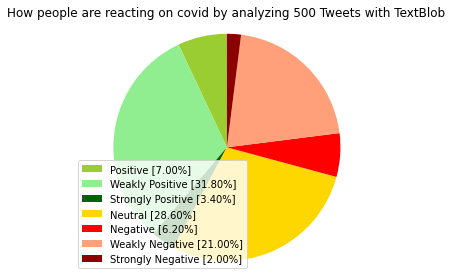

In [60]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_TextBlob, tool_name='TextBlob', keyword='covid')

#### NLTK - Vader Lexicon

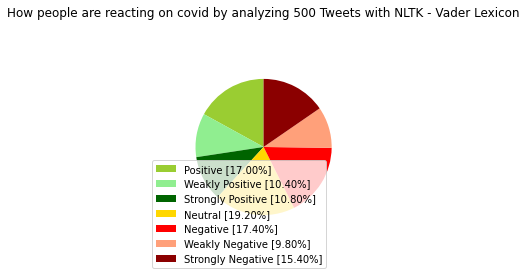

In [67]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_NLTK, tool_name='NLTK - Vader Lexicon', keyword='covid')

#### RNN

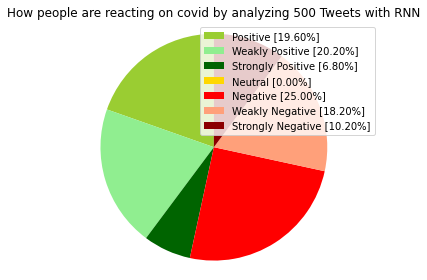

In [62]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_RNN, tool_name='RNN', keyword='covid')

# Neutral section can appears in some cases because of the 'None' values

#### BERT

In [63]:
dataframe_size=len(twitter_dataframe_BERT)
print(dataframe_size)

500


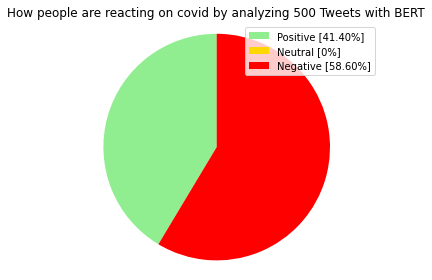

In [64]:
dataframe_sentiment_labels=list(twitter_dataframe_BERT["Sentiment"])
pos_num = ["pos" == label for label in dataframe_sentiment_labels].count(True)
neg_num = ["neg" == label for label in dataframe_sentiment_labels].count(True)

pos_percent = percentage(part=pos_num, whole=dataframe_size)
neg_percent = percentage(part=neg_num, whole=dataframe_size)

visualization_for_BERT(positive=pos_percent, neutral=0, negative=neg_percent, keyword='covid', limit=dataframe_size)

## Information Extraction

### Imports

In [ ]:
!pip install -U yellowbrick

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

In [70]:
from yellowbrick.text import PosTagVisualizer

import regex as re
import seaborn as sns
from collections import  Counter

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy import displacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [71]:
nlp = spacy.load('en_core_web_sm')
nlp

### Helper Methods

In [72]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

In [73]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

### TextBlob

In [85]:
# Dataframes only about the negative and positive tweets separately

positives_df_TextBlob = twitter_dataframe_TextBlob.loc[(twitter_dataframe_TextBlob['Sentiment'].str.contains("Positive", case=False))]

negativies_df_textblob = twitter_dataframe_TextBlob.loc[(twitter_dataframe_TextBlob['Sentiment'].str.contains("Negative", case=False))]

In [86]:
# Initializing a new dataframe with only the 'Tweet_text' column for faster operation

positive_tweet_text_df_TextBlob = positives_df_TextBlob['Tweet_text']
positive_tweet_text_df_TextBlob = positive_tweet_text_df_TextBlob.to_frame()

negative_tweet_text_df_TextBlob = negativies_df_textblob['Tweet_text']
negative_tweet_text_df_TextBlob = negative_tweet_text_df_TextBlob.to_frame()

In [87]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
46,So far Texas leads in COVID-19 aspiring back a...
118,_ek Elem schls Replaced HVAC systems prior to ...
275,COVID patient hospitalized after overdosing on...
116,PLEASE REMEMBER TO CHECK IN! As part of Gavila...
60,_Kaliban https://t.co/nprRIa1qkC it’s actually...
484,The vaccines (Mnra are a recipe that stimulate...
240,Covid is the tool The great reset will come by...
63,I know 2 people who died this summer from non ...
13,_Hagues __Heller _vicki _ryan _TMF _1 _hammer ...
376,Joe Rogan Positive for COVID Taking Ivermectin...


In [88]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
429,These liberals are something else We should ca...
410,_Thanks_777 _q So.. can you explain how all th...
299,The past couple years have been one fucked up ...
168,It’s insane I saw people at Superstore not wea...
386,Gladys has single handedly infected the rest o...
211,i think flash mobs are going to make a serious...
10,The article shows that covid deniers can also ...
237,i’m getting worse but it’s not covid so that’s...
82,you realize COVID is crashing our health care ...
301,I’m tired of my friends having covid I just wa...


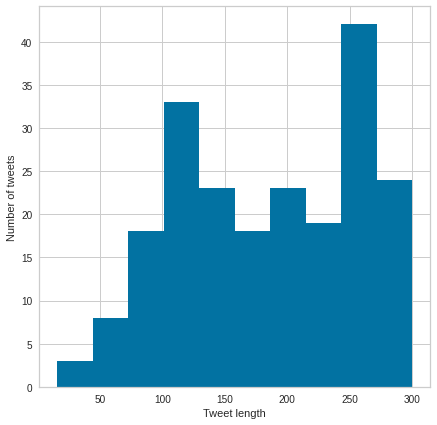

In [89]:
# Visualization of the 'Tweet_text' legth - positive

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

positive_tweet_text_df_TextBlob['Tweet_text'].str.len().hist()

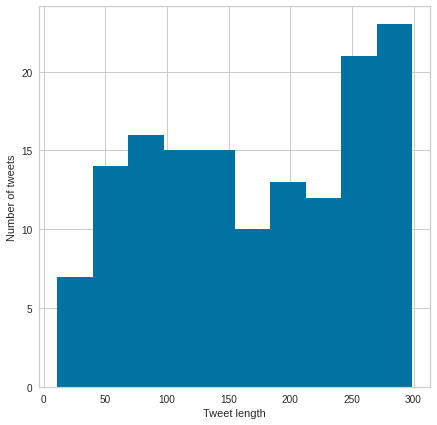

In [90]:
# Visualization of the 'Tweet_text' legth - negative

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

negative_tweet_text_df_TextBlob['Tweet_text'].str.len().hist()

#### Part of Speech Tagging


Regex explanation:

- [^] matches everything but everything inside the blockquotes
- \w matches any word character (equal to [a-zA-Z0-9_])
- \d matches a digit (equal to [0-9])
- \s matches any whitespace character (equal to [\r\n\t\f\v ])
- \' matches the character ' literally (case sensitive)
- '+' matches between one and unlimited times, as many times as possible, giving back as needed

In [91]:
# Noise Cleaning - spacing, special characters, lowercasing

positive_tweet_text_df_TextBlob['Tweet_text'] = positive_tweet_text_df_TextBlob['Tweet_text'].str.lower()
positive_tweet_text_df_TextBlob['Tweet_text'] = positive_tweet_text_df_TextBlob['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

negative_tweet_text_df_TextBlob['Tweet_text'] = negative_tweet_text_df_TextBlob['Tweet_text'].str.lower()
negative_tweet_text_df_TextBlob['Tweet_text'] = negative_tweet_text_df_TextBlob['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))


In [92]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
46,so far texas leads in covid19 aspiring back al...
118,_ek elem schls replaced hvac systems prior to ...
275,covid patient hospitalized after overdosing on...
116,please remember to check in as part of gavilan...
60,_kaliban httpstconprria1qkc its actually not a...
484,the vaccines mnra are a recipe that stimulates...
240,covid is the tool the great reset will come by...
63,i know 2 people who died this summer from non ...
13,_hagues __heller _vicki _ryan _tmf _1 _hammer ...
376,joe rogan positive for covid taking ivermectin...


In [93]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
429,these liberals are something else we should ca...
410,_thanks_777 _q so can you explain how all thes...
299,the past couple years have been one fucked up ...
168,its insane i saw people at superstore not wear...
386,gladys has single handedly infected the rest o...
211,i think flash mobs are going to make a serious...
10,the article shows that covid deniers can also ...
237,im getting worse but its not covid so thats go...
82,you realize covid is crashing our health care ...
301,im tired of my friends having covid i just wan...


In [94]:
# NLTK tokenization

positive_tweet_text_df_TextBlob['tokenized_Tweet_text'] = positive_tweet_text_df_TextBlob['Tweet_text'].apply(word_tokenize)

negative_tweet_text_df_TextBlob['tokenized_Tweet_text'] = negative_tweet_text_df_TextBlob['Tweet_text'].apply(word_tokenize)

In [95]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
46,so far texas leads in covid19 aspiring back al...,"[so, far, texas, leads, in, covid19, aspiring,..."
118,_ek elem schls replaced hvac systems prior to ...,"[_ek, elem, schls, replaced, hvac, systems, pr..."
275,covid patient hospitalized after overdosing on...,"[covid, patient, hospitalized, after, overdosi..."
116,please remember to check in as part of gavilan...,"[please, remember, to, check, in, as, part, of..."
60,_kaliban httpstconprria1qkc its actually not a...,"[_kaliban, httpstconprria1qkc, its, actually, ..."
484,the vaccines mnra are a recipe that stimulates...,"[the, vaccines, mnra, are, a, recipe, that, st..."
240,covid is the tool the great reset will come by...,"[covid, is, the, tool, the, great, reset, will..."
63,i know 2 people who died this summer from non ...,"[i, know, 2, people, who, died, this, summer, ..."
13,_hagues __heller _vicki _ryan _tmf _1 _hammer ...,"[_hagues, __heller, _vicki, _ryan, _tmf, _1, _..."
376,joe rogan positive for covid taking ivermectin...,"[joe, rogan, positive, for, covid, taking, ive..."


In [96]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
429,these liberals are something else we should ca...,"[these, liberals, are, something, else, we, sh..."
410,_thanks_777 _q so can you explain how all thes...,"[_thanks_777, _q, so, can, you, explain, how, ..."
299,the past couple years have been one fucked up ...,"[the, past, couple, years, have, been, one, fu..."
168,its insane i saw people at superstore not wear...,"[its, insane, i, saw, people, at, superstore, ..."
386,gladys has single handedly infected the rest o...,"[gladys, has, single, handedly, infected, the,..."
211,i think flash mobs are going to make a serious...,"[i, think, flash, mobs, are, going, to, make, ..."
10,the article shows that covid deniers can also ...,"[the, article, shows, that, covid, deniers, ca..."
237,im getting worse but its not covid so thats go...,"[im, getting, worse, but, its, not, covid, so,..."
82,you realize covid is crashing our health care ...,"[you, realize, covid, is, crashing, our, healt..."
301,im tired of my friends having covid i just wan...,"[im, tired, of, my, friends, having, covid, i,..."


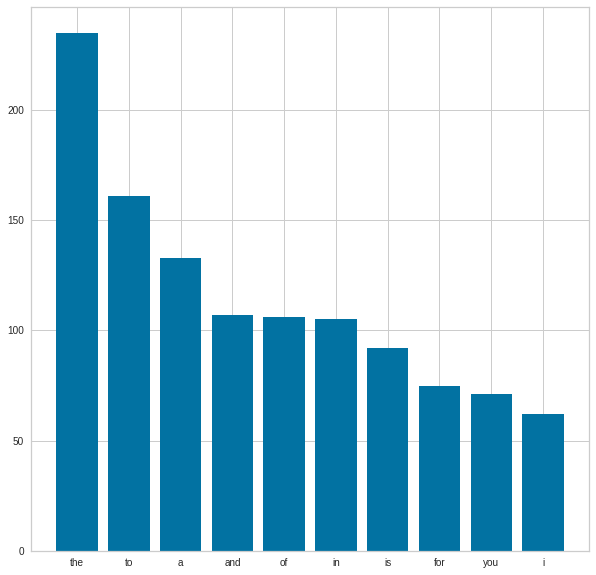

In [97]:
# Top Stopwords - Positive tweets

plot_top_stopwords_barchart(positive_tweet_text_df_TextBlob['Tweet_text'])

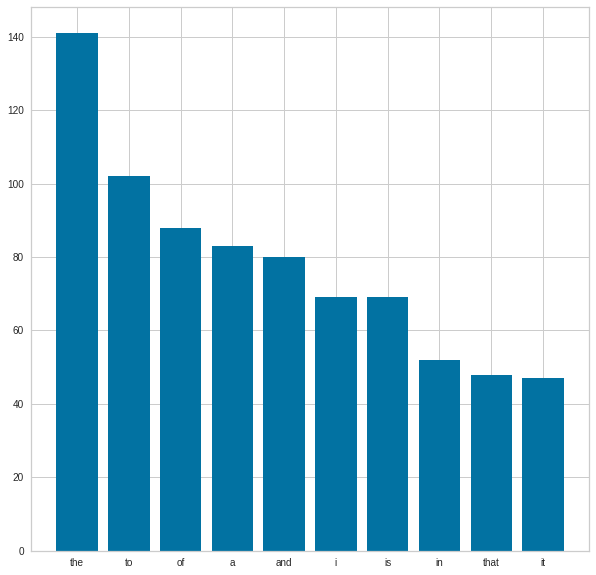

In [98]:
# Top Stopwords - Nagative tweets

plot_top_stopwords_barchart(negative_tweet_text_df_TextBlob['Tweet_text'])

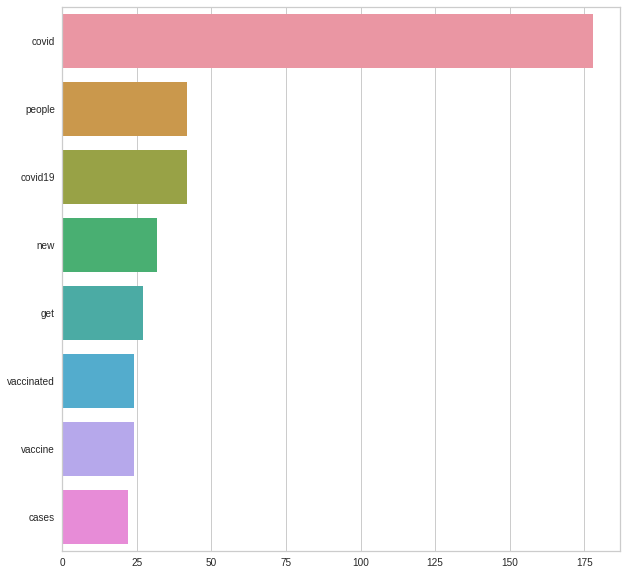

In [99]:
# Top NON Stopwords - Positive tweets

plot_top_non_stopwords_barchart(positive_tweet_text_df_TextBlob['Tweet_text'])

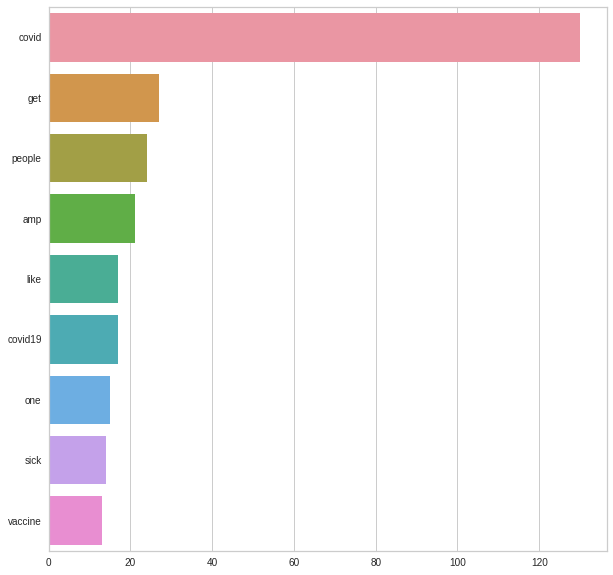

In [100]:
# Top NON Stopwords - Negative tweets

plot_top_non_stopwords_barchart(negative_tweet_text_df_TextBlob['Tweet_text'])

In [101]:
# Removing stopwords

positive_tweet_text_df_TextBlob['tokenized_Tweet_text'] = positive_tweet_text_df_TextBlob['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
positive_tweet_text_df_TextBlob['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in positive_tweet_text_df_TextBlob['tokenized_Tweet_text']]

negative_tweet_text_df_TextBlob['tokenized_Tweet_text'] = negative_tweet_text_df_TextBlob['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
negative_tweet_text_df_TextBlob['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in negative_tweet_text_df_TextBlob['tokenized_Tweet_text']]

In [102]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
46,so far texas leads in covid19 aspiring back al...,"[far, texas, leads, covid19, aspiring, back, a...",far texas leads covid19 aspiring back alley ab...
118,_ek elem schls replaced hvac systems prior to ...,"[_ek, elem, schls, replaced, hvac, systems, pr...",_ek elem schls replaced hvac systems prior pan...
275,covid patient hospitalized after overdosing on...,"[covid, patient, hospitalized, overdosing, ive...",covid patient hospitalized overdosing ivermect...
116,please remember to check in as part of gavilan...,"[please, remember, check, part, gavilan, colle...",please remember check part gavilan college 's ...
60,_kaliban httpstconprria1qkc its actually not a...,"[_kaliban, httpstconprria1qkc, actually, appro...",_kaliban httpstconprria1qkc actually approved ...
484,the vaccines mnra are a recipe that stimulates...,"[vaccines, mnra, recipe, stimulates, immune, s...",vaccines mnra recipe stimulates immune system ...
240,covid is the tool the great reset will come by...,"[covid, tool, great, reset, come, matter, klau...",covid tool great reset come matter klaus said ...
63,i know 2 people who died this summer from non ...,"[know, 2, people, died, summer, non, covid, re...",know 2 people died summer non covid related ci...
13,_hagues __heller _vicki _ryan _tmf _1 _hammer ...,"[_hagues, __heller, _vicki, _ryan, _tmf, _1, _...",_hagues __heller _vicki _ryan _tmf _1 _hammer ...
376,joe rogan positive for covid taking ivermectin...,"[joe, rogan, positive, covid, taking, ivermect...",joe rogan positive covid taking ivermectin htt...


In [103]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
429,these liberals are something else we should ca...,"[liberals, something, else, call, covid, party...",liberals something else call covid party obses...
410,_thanks_777 _q so can you explain how all thes...,"[_thanks_777, _q, explain, extra, people, died...",_thanks_777 _q explain extra people died covid...
299,the past couple years have been one fucked up ...,"[past, couple, years, one, fucked, fever, drea...",past couple years one fucked fever dream trump...
168,its insane i saw people at superstore not wear...,"[insane, saw, people, superstore, wearing, mas...",insane saw people superstore wearing masks rig...
386,gladys has single handedly infected the rest o...,"[gladys, single, handedly, infected, rest, aus...",gladys single handedly infected rest australia...
211,i think flash mobs are going to make a serious...,"[think, flash, mobs, going, make, serious, com...",think flash mobs going make serious come back ...
10,the article shows that covid deniers can also ...,"[article, shows, covid, deniers, also, catch, ...",article shows covid deniers also catch spread ...
237,im getting worse but its not covid so thats go...,"[im, getting, worse, covid, thats, good, least]",im getting worse covid thats good least
82,you realize covid is crashing our health care ...,"[realize, covid, crashing, health, care, syste...",realize covid crashing health care system wors...
301,im tired of my friends having covid i just wan...,"[im, tired, friends, covid, wan, na, friends]",im tired friends covid wan na friends


In [104]:
positive_tagged_stanzas = []
positive_tagged = []

for word in positive_tweet_text_df_TextBlob['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  positive_tagged_stanzas.append(tagged_word)

positive_tagged.append(positive_tagged_stanzas)

In [105]:
negative_tagged_stanzas = []
negative_tagged = []

for word in negative_tweet_text_df_TextBlob['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  negative_tagged_stanzas.append(tagged_word)

negative_tagged.append(negative_tagged_stanzas)

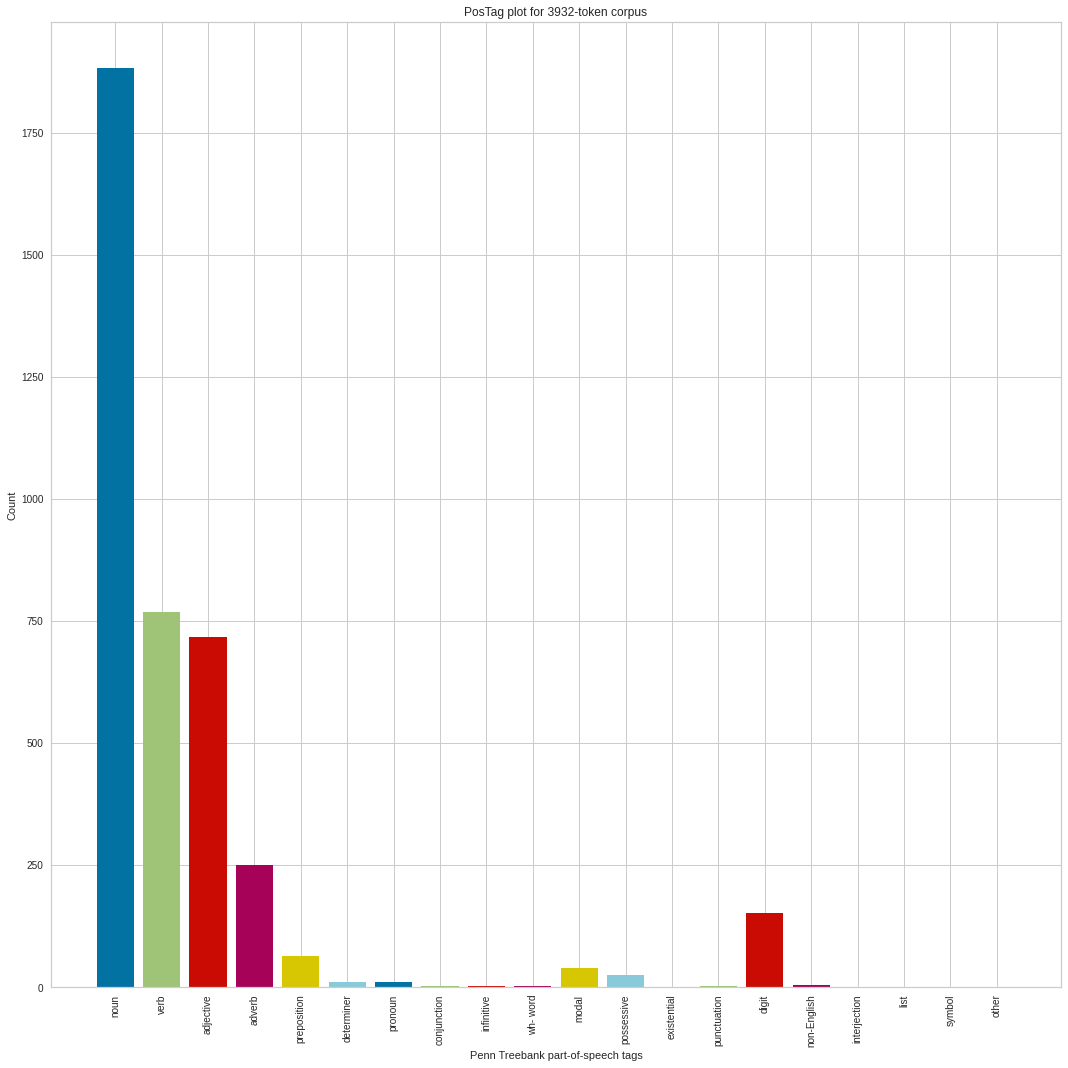

In [106]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(positive_tagged)
viz.show()

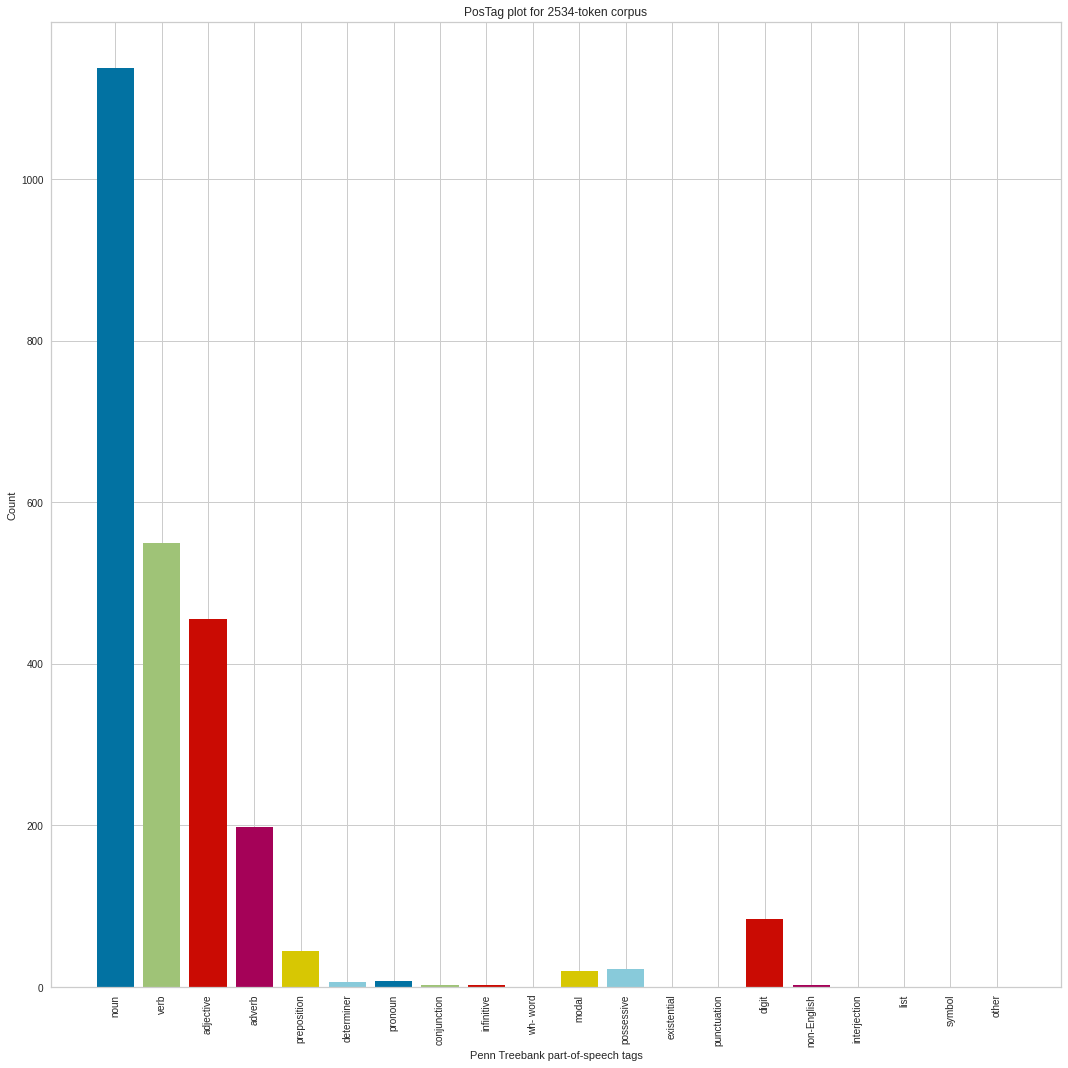

In [107]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(negative_tagged)
viz.show()

#### Dependency Parsing

In [108]:
# Most followed user tweet analysis  Followers_count

most_followed_positive = positives_df_TextBlob[positives_df_TextBlob['Followers_count']== positives_df_TextBlob['Followers_count'].max()]

most_followed_negative = negativies_df_textblob[negativies_df_textblob['Followers_count']== negativies_df_textblob['Followers_count'].max()]

In [109]:
most_followed_positive

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
400,2021-09-02 23:58:00,drsimonegold,Positive COVID-19 cases in Israel have climbed...,[],323473,0.113636,weakly_positive,TextBlob


In [110]:
most_followed_negative

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
261,2021-09-02 23:58:45,soompi,#ENHYPEN Cancels #KCONTACTHI5 Appearance Due T...,"['ENHYPEN', 'KCONTACTHI5']",3197304,-0.125,weakly_negative,TextBlob


In [111]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_positive['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  Positive COVID-19 cases in Israel have climbed almost equally between vaccinated and unvaccinated individuals The CDC Fauci and FDA all insist that COVID shots are effective—but the data does not reflect those claims https://t.co/E4Ufr1Ct76


In [112]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_negative['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  #ENHYPEN Cancels #KCONTACTHI5 Appearance Due To Members COVID-19 Diagnosis https://t.co/ptwsQPMNtD https://t.co/8aD2jaip2A


### NLTK - Vader Lexicon

In [113]:
# Dataframes only about the negative and positive tweets separately

positives_df_NLTK = twitter_dataframe_NLTK.loc[(twitter_dataframe_NLTK['Sentiment'].str.contains("Positive", case=False))]

negativies_df_NLTK = twitter_dataframe_NLTK.loc[(twitter_dataframe_NLTK['Sentiment'].str.contains("Negative", case=False))]

In [114]:
# Initializing a new dataframe with only the 'Tweet_text' column for faster operation

positive_tweet_text_df_NLTK = positives_df_NLTK['Tweet_text']
positive_tweet_text_df_NLTK = positive_tweet_text_df_NLTK.to_frame()

negative_tweet_text_df_NLTK = negativies_df_NLTK['Tweet_text']
negative_tweet_text_df_NLTK = negative_tweet_text_df_NLTK.to_frame()

In [115]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
43,drake spreading like covid
364,Plus isn’t it ironic that a company that has worked sooo hard to make the community safe would let a potentially Covid person walk around without knowing they carry the virus So much for their altruistic ideals.
143,She has done some good things.. but the scare-mongering and false info about kids and COVID are black stains.
60,_Kaliban https://t.co/nprRIa1qkC it’s actually not approved for treating Covid-19 Also the rogan dewormer thing is because it’s funny 😂
7,_TX 325 people in Texas died of COVID yesterday. Respecting the sacred value of precious human life As long as nobody has to be slightly inconvenienced by wearing a mask or getting vaccinated https://t.co/R9JXl2HJAB
94,just a reminder to wear a mask to prevent the spread of covid 😷 https://t.co/0foWkLFw8T
65,_Cotti I understand the argument But changing rules midstream potentially threatens trust in entire vax schedule and in particular can be used to undermine trust in COVID vaccines Playing with fire FDA should be going as fast as humanly possible to get standard approval.
476,At my hospital over 95 of COVID-19 patients share one thing in common They’re unvaccinated https://t.co/bzRk7oQZ0Y
436,Covid-19 is like Gelato when it comes to weed You dont know what new strain bout to come out 🤢🤦🏾‍♂️
498,COVID is airborne here's how you can stay safe Conor Ruzycki's full presentation. #popAB #covid19AB #TestTraceIsolateAB https://t.co/fzmM45pCEq


In [116]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
51,Civil Surgeon Dr Mukta Kumar refuted the allegations claiming that Covid vaccine was not the reason for his death. https://t.co/xrmfj6g7Vl
130,Isn't this exactly what Democrats have been demanding when it comes to the dodgy covid vaccines?
204,_questions But here’s every so called Australian Experts lying to us saying this isn’t happening That’s Murdoch media at work
243,Queensland records no new COVID-19 cases https://t.co/Yklabq0OEE
58,Are we going to need to be vaccinated and/or a negative covid test 72 hours prior to your shows 🥺
480,_Tina Oh...ivermectin wrong thing...lol Not that HCQ seems to be all that helpful against COVID anyway
492,Is this based on mail in votes so far If that's the case makes in California since they are trying to stop the spread of covid by mailing in ballots
72,"_Blue 3 &amp illegally overspent &amp funded A50 should be reversed via A16 and us back in the EU to return us to growth,to reduce the debts that were caused by lie-won undemocratic Brexit and the belated badly managed costly Covid that was far more deadly than it should have been."
17,. This week in coronavirus Tennessee climbs to the top of the worst list https://t.co/m4SKjLSJeQ via
385,Now they gotta third strain of COVID-19 called “MU 😭


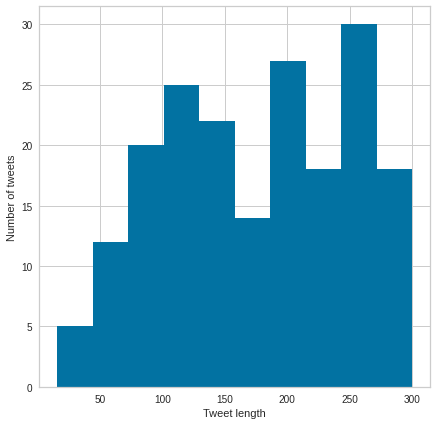

In [117]:
# Visualization of the 'Tweet_text' legth - positive

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

positive_tweet_text_df_NLTK['Tweet_text'].str.len().hist()

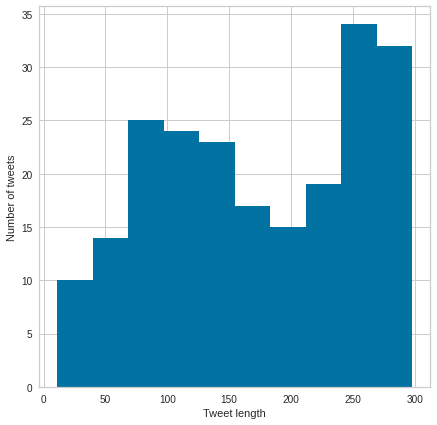

In [118]:
# Visualization of the 'Tweet_text' legth - negative

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

negative_tweet_text_df_NLTK['Tweet_text'].str.len().hist()

#### Part of Speech Tagging

In [119]:
# Noise Cleaning - spacing, special characters, lowercasing

positive_tweet_text_df_NLTK['Tweet_text'] = positive_tweet_text_df_NLTK['Tweet_text'].str.lower()
positive_tweet_text_df_NLTK['Tweet_text'] = positive_tweet_text_df_NLTK['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

negative_tweet_text_df_NLTK['Tweet_text'] = negative_tweet_text_df_NLTK['Tweet_text'].str.lower()
negative_tweet_text_df_NLTK['Tweet_text'] = negative_tweet_text_df_NLTK['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

In [120]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
43,drake spreading like covid
364,plus isnt it ironic that a company that has worked sooo hard to make the community safe would let a potentially covid person walk around without knowing they carry the virus so much for their altruistic ideals
143,she has done some good things but the scaremongering and false info about kids and covid are black stains
60,_kaliban httpstconprria1qkc its actually not approved for treating covid19 also the rogan dewormer thing is because its funny
7,_tx 325 people in texas died of covid yesterday respecting the sacred value of precious human life as long as nobody has to be slightly inconvenienced by wearing a mask or getting vaccinated httpstcor9jxl2hjab
94,just a reminder to wear a mask to prevent the spread of covid httpstco0fowklfw8t
65,_cotti i understand the argument but changing rules midstream potentially threatens trust in entire vax schedule and in particular can be used to undermine trust in covid vaccines playing with fire fda should be going as fast as humanly possible to get standard approval
476,at my hospital over 95 of covid19 patients share one thing in common theyre unvaccinated httpstcobzrk7oqz0y
436,covid19 is like gelato when it comes to weed you dont know what new strain bout to come out ‍️
498,covid is airborne here's how you can stay safe conor ruzycki's full presentation popab covid19ab testtraceisolateab httpstcofzmm45pceq


In [121]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
51,civil surgeon dr mukta kumar refuted the allegations claiming that covid vaccine was not the reason for his death httpstcoxrmfj6g7vl
130,isn't this exactly what democrats have been demanding when it comes to the dodgy covid vaccines
204,_questions but heres every so called australian experts lying to us saying this isnt happening thats murdoch media at work
243,queensland records no new covid19 cases httpstcoyklabq0oee
58,are we going to need to be vaccinated andor a negative covid test 72 hours prior to your shows
480,_tina ohivermectin wrong thinglol not that hcq seems to be all that helpful against covid anyway
492,is this based on mail in votes so far if that's the case makes in california since they are trying to stop the spread of covid by mailing in ballots
72,_blue 3 amp illegally overspent amp funded a50 should be reversed via a16 and us back in the eu to return us to growthto reduce the debts that were caused by liewon undemocratic brexit and the belated badly managed costly covid that was far more deadly than it should have been
17,this week in coronavirus tennessee climbs to the top of the worst list httpstcom4skjlsjeq via
385,now they gotta third strain of covid19 called mu


In [122]:
# NLTK tokenization

positive_tweet_text_df_NLTK['tokenized_Tweet_text'] = positive_tweet_text_df_NLTK['Tweet_text'].apply(word_tokenize)

negative_tweet_text_df_NLTK['tokenized_Tweet_text'] = negative_tweet_text_df_NLTK['Tweet_text'].apply(word_tokenize)

In [123]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
43,drake spreading like covid,"[drake, spreading, like, covid]"
364,plus isnt it ironic that a company that has worked sooo hard to make the community safe would let a potentially covid person walk around without knowing they carry the virus so much for their altruistic ideals,"[plus, isnt, it, ironic, that, a, company, that, has, worked, sooo, hard, to, make, the, community, safe, would, let, a, potentially, covid, person, walk, around, without, knowing, they, carry, the, virus, so, much, for, their, altruistic, ideals]"
143,she has done some good things but the scaremongering and false info about kids and covid are black stains,"[she, has, done, some, good, things, but, the, scaremongering, and, false, info, about, kids, and, covid, are, black, stains]"
60,_kaliban httpstconprria1qkc its actually not approved for treating covid19 also the rogan dewormer thing is because its funny,"[_kaliban, httpstconprria1qkc, its, actually, not, approved, for, treating, covid19, also, the, rogan, dewormer, thing, is, because, its, funny]"
7,_tx 325 people in texas died of covid yesterday respecting the sacred value of precious human life as long as nobody has to be slightly inconvenienced by wearing a mask or getting vaccinated httpstcor9jxl2hjab,"[_tx, 325, people, in, texas, died, of, covid, yesterday, respecting, the, sacred, value, of, precious, human, life, as, long, as, nobody, has, to, be, slightly, inconvenienced, by, wearing, a, mask, or, getting, vaccinated, httpstcor9jxl2hjab]"
94,just a reminder to wear a mask to prevent the spread of covid httpstco0fowklfw8t,"[just, a, reminder, to, wear, a, mask, to, prevent, the, spread, of, covid, httpstco0fowklfw8t]"
65,_cotti i understand the argument but changing rules midstream potentially threatens trust in entire vax schedule and in particular can be used to undermine trust in covid vaccines playing with fire fda should be going as fast as humanly possible to get standard approval,"[_cotti, i, understand, the, argument, but, changing, rules, midstream, potentially, threatens, trust, in, entire, vax, schedule, and, in, particular, can, be, used, to, undermine, trust, in, covid, vaccines, playing, with, fire, fda, should, be, going, as, fast, as, humanly, possible, to, get, standard, approval]"
476,at my hospital over 95 of covid19 patients share one thing in common theyre unvaccinated httpstcobzrk7oqz0y,"[at, my, hospital, over, 95, of, covid19, patients, share, one, thing, in, common, theyre, unvaccinated, httpstcobzrk7oqz0y]"
436,covid19 is like gelato when it comes to weed you dont know what new strain bout to come out ‍️,"[covid19, is, like, gelato, when, it, comes, to, weed, you, dont, know, what, new, strain, bout, to, come, out, ‍️]"
498,covid is airborne here's how you can stay safe conor ruzycki's full presentation popab covid19ab testtraceisolateab httpstcofzmm45pceq,"[covid, is, airborne, here, 's, how, you, can, stay, safe, conor, ruzycki, 's, full, presentation, popab, covid19ab, testtraceisolateab, httpstcofzmm45pceq]"


In [124]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
51,civil surgeon dr mukta kumar refuted the allegations claiming that covid vaccine was not the reason for his death httpstcoxrmfj6g7vl,"[civil, surgeon, dr, mukta, kumar, refuted, the, allegations, claiming, that, covid, vaccine, was, not, the, reason, for, his, death, httpstcoxrmfj6g7vl]"
130,isn't this exactly what democrats have been demanding when it comes to the dodgy covid vaccines,"[is, n't, this, exactly, what, democrats, have, been, demanding, when, it, comes, to, the, dodgy, covid, vaccines]"
204,_questions but heres every so called australian experts lying to us saying this isnt happening thats murdoch media at work,"[_questions, but, heres, every, so, called, australian, experts, lying, to, us, saying, this, isnt, happening, thats, murdoch, media, at, work]"
243,queensland records no new covid19 cases httpstcoyklabq0oee,"[queensland, records, no, new, covid19, cases, httpstcoyklabq0oee]"
58,are we going to need to be vaccinated andor a negative covid test 72 hours prior to your shows,"[are, we, going, to, need, to, be, vaccinated, andor, a, negative, covid, test, 72, hours, prior, to, your, shows]"
480,_tina ohivermectin wrong thinglol not that hcq seems to be all that helpful against covid anyway,"[_tina, ohivermectin, wrong, thinglol, not, that, hcq, seems, to, be, all, that, helpful, against, covid, anyway]"
492,is this based on mail in votes so far if that's the case makes in california since they are trying to stop the spread of covid by mailing in ballots,"[is, this, based, on, mail, in, votes, so, far, if, that, 's, the, case, makes, in, california, since, they, are, trying, to, stop, the, spread, of, covid, by, mailing, in, ballots]"
72,_blue 3 amp illegally overspent amp funded a50 should be reversed via a16 and us back in the eu to return us to growthto reduce the debts that were caused by liewon undemocratic brexit and the belated badly managed costly covid that was far more deadly than it should have been,"[_blue, 3, amp, illegally, overspent, amp, funded, a50, should, be, reversed, via, a16, and, us, back, in, the, eu, to, return, us, to, growthto, reduce, the, debts, that, were, caused, by, liewon, undemocratic, brexit, and, the, belated, badly, managed, costly, covid, that, was, far, more, deadly, than, it, should, have, been]"
17,this week in coronavirus tennessee climbs to the top of the worst list httpstcom4skjlsjeq via,"[this, week, in, coronavirus, tennessee, climbs, to, the, top, of, the, worst, list, httpstcom4skjlsjeq, via]"
385,now they gotta third strain of covid19 called mu,"[now, they, got, ta, third, strain, of, covid19, called, mu]"


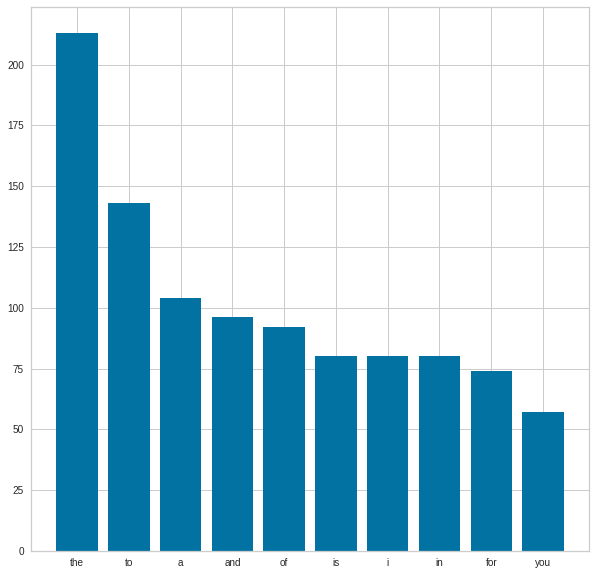

In [125]:
# Top Stopwords - Positive tweets

plot_top_stopwords_barchart(positive_tweet_text_df_NLTK['Tweet_text'])

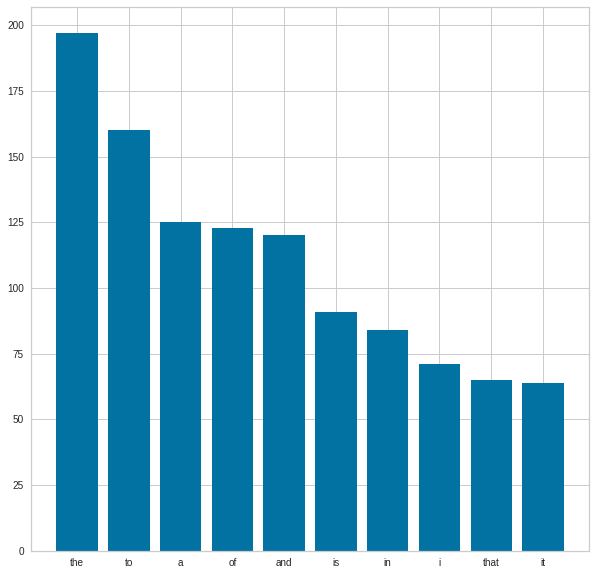

In [126]:
# Top Stopwords - Nagative tweets

plot_top_stopwords_barchart(negative_tweet_text_df_NLTK['Tweet_text'])

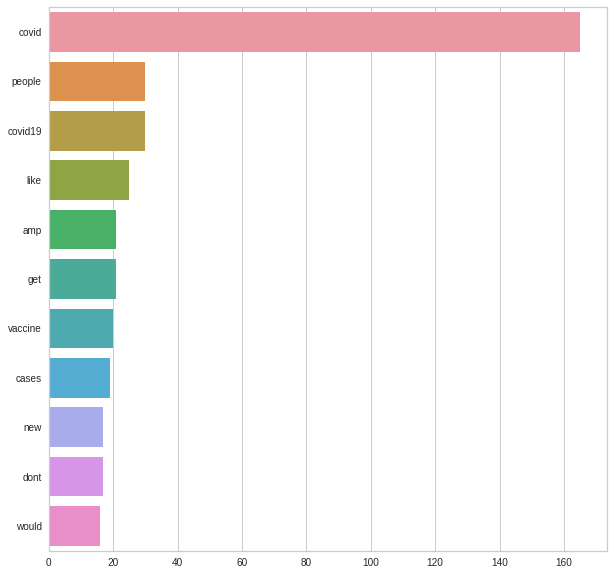

In [127]:
# Top NON Stopwords - Positive tweets

plot_top_non_stopwords_barchart(positive_tweet_text_df_NLTK['Tweet_text'])

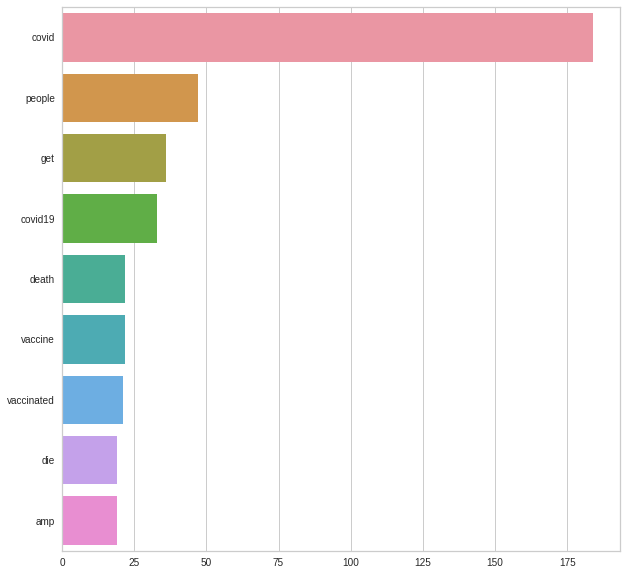

In [128]:
# Top NON Stopwords - Negative tweets

plot_top_non_stopwords_barchart(negative_tweet_text_df_NLTK['Tweet_text'])

In [129]:
# Removing stopwords

positive_tweet_text_df_NLTK['tokenized_Tweet_text'] = positive_tweet_text_df_NLTK['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
positive_tweet_text_df_NLTK['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in positive_tweet_text_df_NLTK['tokenized_Tweet_text']]

negative_tweet_text_df_NLTK['tokenized_Tweet_text'] = negative_tweet_text_df_NLTK['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
negative_tweet_text_df_NLTK['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in negative_tweet_text_df_NLTK['tokenized_Tweet_text']]

In [130]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
43,drake spreading like covid,"[drake, spreading, like, covid]",drake spreading like covid
364,plus isnt it ironic that a company that has worked sooo hard to make the community safe would let a potentially covid person walk around without knowing they carry the virus so much for their altruistic ideals,"[plus, isnt, ironic, company, worked, sooo, hard, make, community, safe, would, let, potentially, covid, person, walk, around, without, knowing, carry, virus, much, altruistic, ideals]",plus isnt ironic company worked sooo hard make community safe would let potentially covid person walk around without knowing carry virus much altruistic ideals
143,she has done some good things but the scaremongering and false info about kids and covid are black stains,"[done, good, things, scaremongering, false, info, kids, covid, black, stains]",done good things scaremongering false info kids covid black stains
60,_kaliban httpstconprria1qkc its actually not approved for treating covid19 also the rogan dewormer thing is because its funny,"[_kaliban, httpstconprria1qkc, actually, approved, treating, covid19, also, rogan, dewormer, thing, funny]",_kaliban httpstconprria1qkc actually approved treating covid19 also rogan dewormer thing funny
7,_tx 325 people in texas died of covid yesterday respecting the sacred value of precious human life as long as nobody has to be slightly inconvenienced by wearing a mask or getting vaccinated httpstcor9jxl2hjab,"[_tx, 325, people, texas, died, covid, yesterday, respecting, sacred, value, precious, human, life, long, nobody, slightly, inconvenienced, wearing, mask, getting, vaccinated, httpstcor9jxl2hjab]",_tx 325 people texas died covid yesterday respecting sacred value precious human life long nobody slightly inconvenienced wearing mask getting vaccinated httpstcor9jxl2hjab
94,just a reminder to wear a mask to prevent the spread of covid httpstco0fowklfw8t,"[reminder, wear, mask, prevent, spread, covid, httpstco0fowklfw8t]",reminder wear mask prevent spread covid httpstco0fowklfw8t
65,_cotti i understand the argument but changing rules midstream potentially threatens trust in entire vax schedule and in particular can be used to undermine trust in covid vaccines playing with fire fda should be going as fast as humanly possible to get standard approval,"[_cotti, understand, argument, changing, rules, midstream, potentially, threatens, trust, entire, vax, schedule, particular, used, undermine, trust, covid, vaccines, playing, fire, fda, going, fast, humanly, possible, get, standard, approval]",_cotti understand argument changing rules midstream potentially threatens trust entire vax schedule particular used undermine trust covid vaccines playing fire fda going fast humanly possible get standard approval
476,at my hospital over 95 of covid19 patients share one thing in common theyre unvaccinated httpstcobzrk7oqz0y,"[hospital, 95, covid19, patients, share, one, thing, common, theyre, unvaccinated, httpstcobzrk7oqz0y]",hospital 95 covid19 patients share one thing common theyre unvaccinated httpstcobzrk7oqz0y
436,covid19 is like gelato when it comes to weed you dont know what new strain bout to come out ‍️,"[covid19, like, gelato, comes, weed, dont, know, new, strain, bout, come, ‍️]",covid19 like gelato comes weed dont know new strain bout come ‍️
498,covid is airborne here's how you can stay safe conor ruzycki's full presentation popab covid19ab testtraceisolateab httpstcofzmm45pceq,"[covid, airborne, 's, stay, safe, conor, ruzycki, 's, full, presentation, popab, covid19ab, testtraceisolateab, httpstcofzmm45pceq]",covid airborne 's stay safe conor ruzycki 's full presentation popab covid19ab testtraceisolateab httpstcofzmm45pceq


In [131]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
51,civil surgeon dr mukta kumar refuted the allegations claiming that covid vaccine was not the reason for his death httpstcoxrmfj6g7vl,"[civil, surgeon, dr, mukta, kumar, refuted, allegations, claiming, covid, vaccine, reason, death, httpstcoxrmfj6g7vl]",civil surgeon dr mukta kumar refuted allegations claiming covid vaccine reason death httpstcoxrmfj6g7vl
130,isn't this exactly what democrats have been demanding when it comes to the dodgy covid vaccines,"[n't, exactly, democrats, demanding, comes, dodgy, covid, vaccines]",n't exactly democrats demanding comes dodgy covid vaccines
204,_questions but heres every so called australian experts lying to us saying this isnt happening thats murdoch media at work,"[_questions, heres, every, called, australian, experts, lying, us, saying, isnt, happening, thats, murdoch, media, work]",_questions heres every called australian experts lying us saying isnt happening thats murdoch media work
243,queensland records no new covid19 cases httpstcoyklabq0oee,"[queensland, records, new, covid19, cases, httpstcoyklabq0oee]",queensland records new covid19 cases httpstcoyklabq0oee
58,are we going to need to be vaccinated andor a negative covid test 72 hours prior to your shows,"[going, need, vaccinated, andor, negative, covid, test, 72, hours, prior, shows]",going need vaccinated andor negative covid test 72 hours prior shows
480,_tina ohivermectin wrong thinglol not that hcq seems to be all that helpful against covid anyway,"[_tina, ohivermectin, wrong, thinglol, hcq, seems, helpful, covid, anyway]",_tina ohivermectin wrong thinglol hcq seems helpful covid anyway
492,is this based on mail in votes so far if that's the case makes in california since they are trying to stop the spread of covid by mailing in ballots,"[based, mail, votes, far, 's, case, makes, california, since, trying, stop, spread, covid, mailing, ballots]",based mail votes far 's case makes california since trying stop spread covid mailing ballots
72,_blue 3 amp illegally overspent amp funded a50 should be reversed via a16 and us back in the eu to return us to growthto reduce the debts that were caused by liewon undemocratic brexit and the belated badly managed costly covid that was far more deadly than it should have been,"[_blue, 3, amp, illegally, overspent, amp, funded, a50, reversed, via, a16, us, back, eu, return, us, growthto, reduce, debts, caused, liewon, undemocratic, brexit, belated, badly, managed, costly, covid, far, deadly]",_blue 3 amp illegally overspent amp funded a50 reversed via a16 us back eu return us growthto reduce debts caused liewon undemocratic brexit belated badly managed costly covid far deadly
17,this week in coronavirus tennessee climbs to the top of the worst list httpstcom4skjlsjeq via,"[week, coronavirus, tennessee, climbs, top, worst, list, httpstcom4skjlsjeq, via]",week coronavirus tennessee climbs top worst list httpstcom4skjlsjeq via
385,now they gotta third strain of covid19 called mu,"[got, ta, third, strain, covid19, called, mu]",got ta third strain covid19 called mu


In [132]:
positive_tagged_stanzas = []
positive_tagged = []

for word in positive_tweet_text_df_NLTK['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  positive_tagged_stanzas.append(tagged_word)

positive_tagged.append(positive_tagged_stanzas)

In [133]:
negative_tagged_stanzas = []
negative_tagged = []

for word in negative_tweet_text_df_NLTK['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  negative_tagged_stanzas.append(tagged_word)

negative_tagged.append(negative_tagged_stanzas)

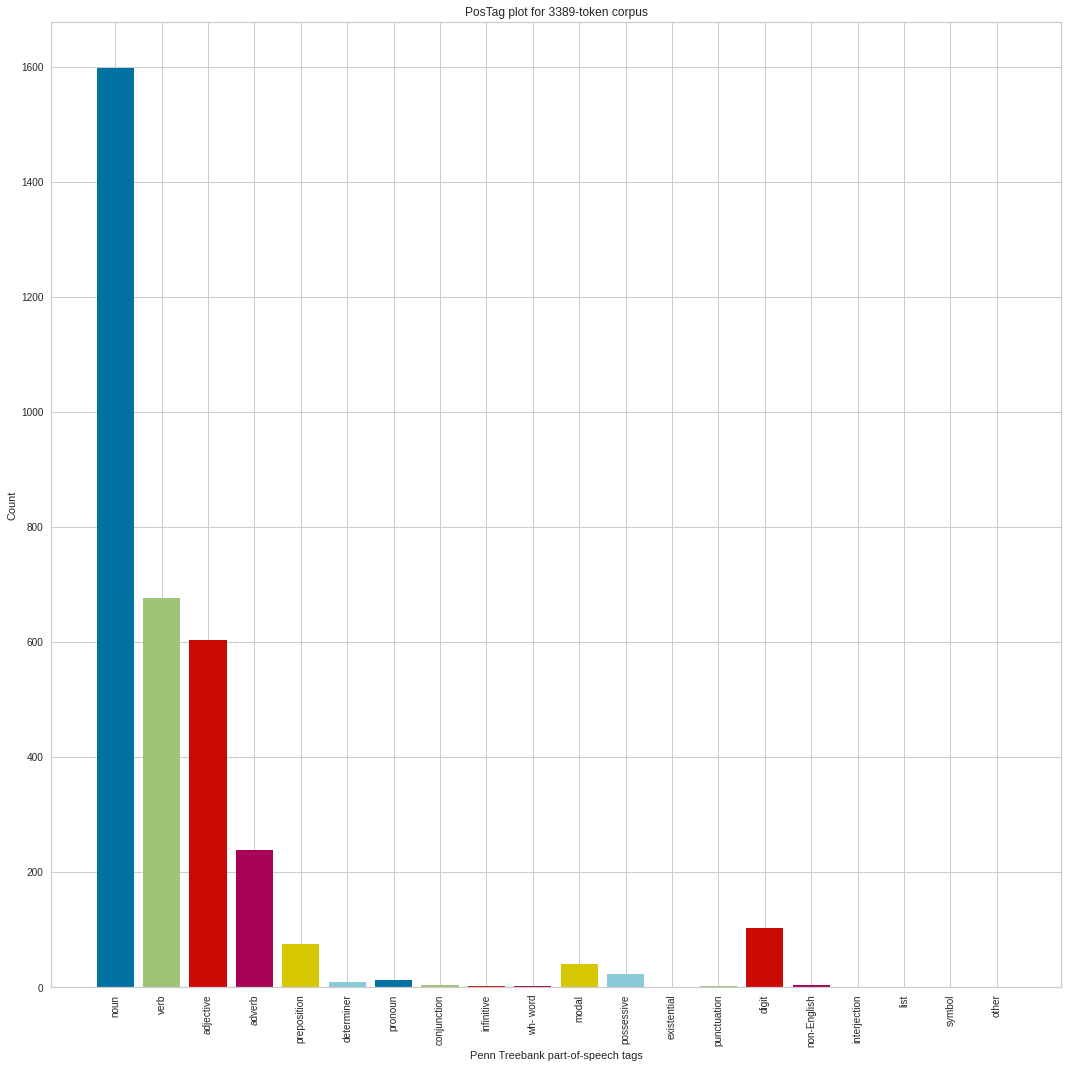

In [134]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(positive_tagged)
viz.show()

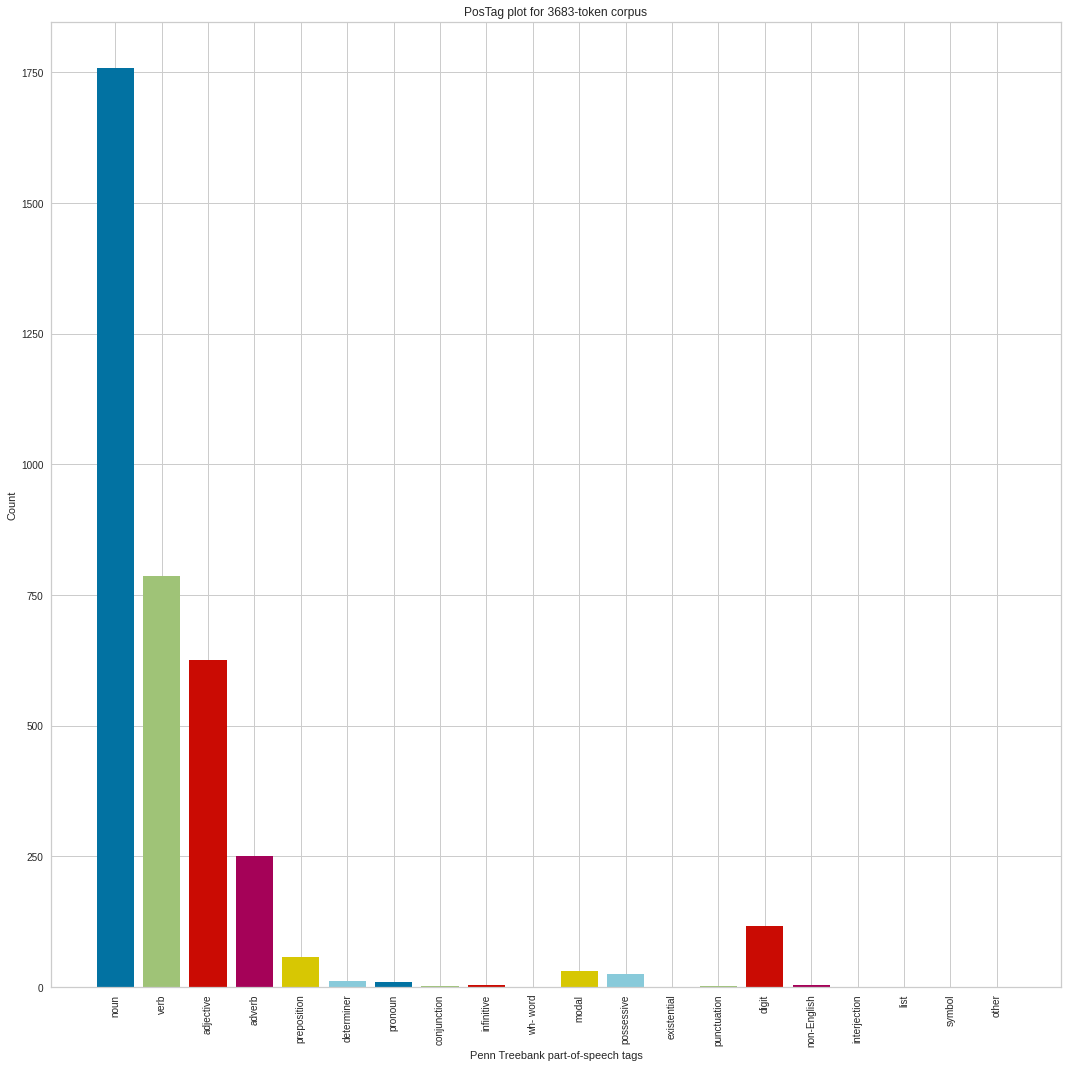

In [135]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(negative_tagged)
viz.show()

#### Dependency Parsing

In [136]:
# Most followed user tweet analysis  Followers_count

most_followed_positive = positives_df_NLTK[positives_df_NLTK['Followers_count']== positives_df_NLTK['Followers_count'].max()]

most_followed_negative = negativies_df_NLTK[negativies_df_NLTK['Followers_count']== negativies_df_NLTK['Followers_count'].max()]

In [137]:
most_followed_positive

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
400,2021-09-02 23:58:00,drsimonegold,Positive COVID-19 cases in Israel have climbed almost equally between vaccinated and unvaccinated individuals The CDC Fauci and FDA all insist that COVID shots are effective—but the data does not reflect those claims https://t.co/E4Ufr1Ct76,[],323473,0.5574,positive,NLTK


In [138]:
most_followed_negative

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
51,2021-09-02 23:59:45,IndianExpress,Civil Surgeon Dr Mukta Kumar refuted the allegations claiming that Covid vaccine was not the reason for his death. https://t.co/xrmfj6g7Vl,[],3977239,-0.5994,negative,NLTK


In [139]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_positive['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  Positive COVID-19 cases in Israel have climbed almost equally between vaccinated and unvaccinated individuals The CDC Fauci and FDA all insist that COVID shots are effective—but the data does not reflect those claims https://t.co/E4Ufr1Ct76


In [140]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_negative['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  Civil Surgeon Dr Mukta Kumar refuted the allegations claiming that Covid vaccine was not the reason for his death. https://t.co/xrmfj6g7Vl


### RNN

In [141]:
# Dataframes only about the negative and positive tweets separately


positives_df_RNN = twitter_dataframe_RNN.loc[(twitter_dataframe_RNN['Sentiment'].str.contains("Positive", case=False, na=False))]

negativies_df_RNN = twitter_dataframe_RNN.loc[(twitter_dataframe_RNN['Sentiment'].str.contains("Negative", case=False, na=False))]

In [142]:
# Initializing a new dataframe with only the 'Tweet_text' column for faster operation

positive_tweet_text_df_RNN = positives_df_RNN['Tweet_text']
positive_tweet_text_df_RNN = positive_tweet_text_df_RNN.to_frame()

negative_tweet_text_df_RNN = negativies_df_RNN['Tweet_text']
negative_tweet_text_df_RNN = negative_tweet_text_df_RNN.to_frame()

In [143]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
62,I haven't gotten covid so I can't say this is false
452,A CDC study has found that 78 of people hospitalised or requiring a ventilator for treatment of COVID-19 were overweight or obese 18 months and still not a word said by a public health official about general health weight loss Vitamin D.
140,_Sports Stop comparing Covid to polio
255,See the overall trends in Arkansas schools and COVID with this updated table showing virus cases since Aug 16 https://t.co/EMqv4scH4E https://t.co/Gl3e0zVsjl
182,well i don't have covid so this begs the question of how did i manage to fuck my throat so bad and why am i coughing i never get sick grr
10,The article shows that covid deniers can also catch and spread a disease they call fake It's highly ironic when prominent folks who trash science vaccines and deny a deadly virus are forced to ask science and doctors to save them In vain Sadly https://t.co/tyPLlvUKNc
477,#COVID19 isn’t ending but worker protections are This #LaborDay join us &amp our allies in urging the state to take immediate action to extend COVID-19 Supplemental Paid Sick Days #PaidSickLeave saves lives Take action and write a letter here https://t.co/CtMYm4Ayk0 https://t.co/IfTfD6fhtC
382,URGED MASK UP As the state sees high COVID-19 case activity the Department of Health Service is urging people to mask up as they enjoy the festivities over the Labor Day Weekend https://t.co/DXS4zeKnBQ
400,Positive COVID-19 cases in Israel have climbed almost equally between vaccinated and unvaccinated individuals The CDC Fauci and FDA all insist that COVID shots are effective—but the data does not reflect those claims https://t.co/E4Ufr1Ct76
190,"Asking if they have had the vaccine is a standard admission question for COVID symptoms They say no didn't take it seriously and thought it was a ""hoax. Most people don't remember President Biden ever saying it was a hoax So who did?"


In [144]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
309,It’s clear the covid vaccine is making people ill
347,Covid Theatre 🙄
336,_Holmer It’s true the media wanted the worst possible Covid outcome for Joe Rogan Definitely a win!
233,COVID did and is going to do a whole lot more of damage I’m not even talking about death at this point.
288,"Hard to live with covid when you're dead! Suits Morrison because he embraces death believing he's going to a better place and all part of his God's plan. But for the rest of us we never chose to just ""live with the bubonic plague"" shrug our shoulders and die. What a copout!🙄"
470,“Assumption #3 the only route to COVID-19 immunity in Cuba is through US-supplied vaccines This ignores the fact that more than two million Cubans or nearly 30.2 (now 34% of the population have already been fully vaccinated with Cuban-developed vaccines.”
217,Having second vaccine dose cuts risk of long COVID in half study finds https://t.co/gACwnjtspy
178,The black arrow on this chart is pointing to the beginning of the “third dose Covid vaccine operation in Israel As you can clearly see the “vaccine is very effective https://t.co/UgLawE58GZ
402,SEP 1 REPORT Total &amp new *reported #WesternMA COVID deaths (confirmed &amp probable) Berkshire 304 (+0) Franklin 115 (+0) Hampden 1563 (+1) Hampshire 303 (+0) Total new deaths +1 Total deaths 2285
274,There has been 15 years of studies Where is your long-term data on the effects of Covid on children?


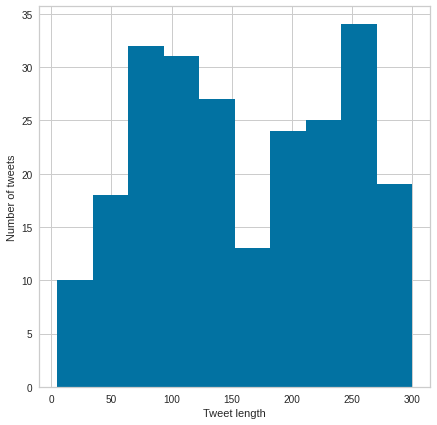

In [145]:
# Visualization of the 'Tweet_text' legth - positive

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

positive_tweet_text_df_RNN['Tweet_text'].str.len().hist()

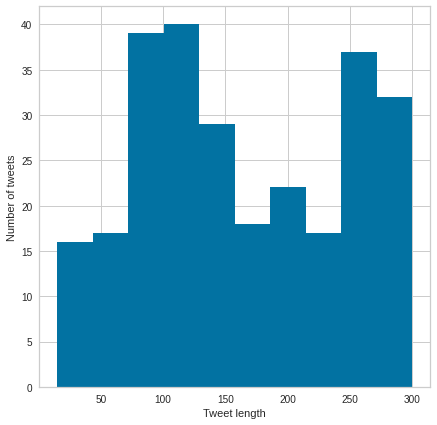

In [146]:
# Visualization of the 'Tweet_text' legth - negative

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

negative_tweet_text_df_RNN['Tweet_text'].str.len().hist()

#### Part of Speech Tagging

In [147]:
# Noise Cleaning - spacing, special characters, lowercasing

positive_tweet_text_df_RNN['Tweet_text'] = positive_tweet_text_df_RNN['Tweet_text'].str.lower()
positive_tweet_text_df_RNN['Tweet_text'] = positive_tweet_text_df_RNN['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

negative_tweet_text_df_RNN['Tweet_text'] = negative_tweet_text_df_RNN['Tweet_text'].str.lower()
negative_tweet_text_df_RNN['Tweet_text'] = negative_tweet_text_df_RNN['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

In [148]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
62,i haven't gotten covid so i can't say this is false
452,a cdc study has found that 78 of people hospitalised or requiring a ventilator for treatment of covid19 were overweight or obese 18 months and still not a word said by a public health official about general health weight loss vitamin d
140,_sports stop comparing covid to polio
255,see the overall trends in arkansas schools and covid with this updated table showing virus cases since aug 16 httpstcoemqv4sch4e httpstcogl3e0zvsjl
182,well i don't have covid so this begs the question of how did i manage to fuck my throat so bad and why am i coughing i never get sick grr
10,the article shows that covid deniers can also catch and spread a disease they call fake it's highly ironic when prominent folks who trash science vaccines and deny a deadly virus are forced to ask science and doctors to save them in vain sadly httpstcotypllvuknc
477,covid19 isnt ending but worker protections are this laborday join us amp our allies in urging the state to take immediate action to extend covid19 supplemental paid sick days paidsickleave saves lives take action and write a letter here httpstcoctmym4ayk0 httpstcoiftfd6fhtc
382,urged mask up as the state sees high covid19 case activity the department of health service is urging people to mask up as they enjoy the festivities over the labor day weekend httpstcodxs4zeknbq
400,positive covid19 cases in israel have climbed almost equally between vaccinated and unvaccinated individuals the cdc fauci and fda all insist that covid shots are effectivebut the data does not reflect those claims httpstcoe4ufr1ct76
190,asking if they have had the vaccine is a standard admission question for covid symptoms they say no didn't take it seriously and thought it was a hoax most people don't remember president biden ever saying it was a hoax so who did


In [149]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
309,its clear the covid vaccine is making people ill
347,covid theatre
336,_holmer its true the media wanted the worst possible covid outcome for joe rogan definitely a win
233,covid did and is going to do a whole lot more of damage im not even talking about death at this point
288,hard to live with covid when you're dead suits morrison because he embraces death believing he's going to a better place and all part of his god's plan but for the rest of us we never chose to just live with the bubonic plague shrug our shoulders and die what a copout
470,assumption 3 the only route to covid19 immunity in cuba is through ussupplied vaccines this ignores the fact that more than two million cubans or nearly 302 now 34 of the population have already been fully vaccinated with cubandeveloped vaccines
217,having second vaccine dose cuts risk of long covid in half study finds httpstcogacwnjtspy
178,the black arrow on this chart is pointing to the beginning of the third dose covid vaccine operation in israel as you can clearly see the vaccine is very effective httpstcouglawe58gz
402,sep 1 report total amp new reported westernma covid deaths confirmed amp probable berkshire 304 0 franklin 115 0 hampden 1563 1 hampshire 303 0 total new deaths 1 total deaths 2285
274,there has been 15 years of studies where is your longterm data on the effects of covid on children


In [150]:
# NLTK tokenization

positive_tweet_text_df_RNN['tokenized_Tweet_text'] = positive_tweet_text_df_RNN['Tweet_text'].apply(word_tokenize)

negative_tweet_text_df_RNN['tokenized_Tweet_text'] = negative_tweet_text_df_RNN['Tweet_text'].apply(word_tokenize)

In [151]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
62,i haven't gotten covid so i can't say this is false,"[i, have, n't, gotten, covid, so, i, ca, n't, say, this, is, false]"
452,a cdc study has found that 78 of people hospitalised or requiring a ventilator for treatment of covid19 were overweight or obese 18 months and still not a word said by a public health official about general health weight loss vitamin d,"[a, cdc, study, has, found, that, 78, of, people, hospitalised, or, requiring, a, ventilator, for, treatment, of, covid19, were, overweight, or, obese, 18, months, and, still, not, a, word, said, by, a, public, health, official, about, general, health, weight, loss, vitamin, d]"
140,_sports stop comparing covid to polio,"[_sports, stop, comparing, covid, to, polio]"
255,see the overall trends in arkansas schools and covid with this updated table showing virus cases since aug 16 httpstcoemqv4sch4e httpstcogl3e0zvsjl,"[see, the, overall, trends, in, arkansas, schools, and, covid, with, this, updated, table, showing, virus, cases, since, aug, 16, httpstcoemqv4sch4e, httpstcogl3e0zvsjl]"
182,well i don't have covid so this begs the question of how did i manage to fuck my throat so bad and why am i coughing i never get sick grr,"[well, i, do, n't, have, covid, so, this, begs, the, question, of, how, did, i, manage, to, fuck, my, throat, so, bad, and, why, am, i, coughing, i, never, get, sick, grr]"
10,the article shows that covid deniers can also catch and spread a disease they call fake it's highly ironic when prominent folks who trash science vaccines and deny a deadly virus are forced to ask science and doctors to save them in vain sadly httpstcotypllvuknc,"[the, article, shows, that, covid, deniers, can, also, catch, and, spread, a, disease, they, call, fake, it, 's, highly, ironic, when, prominent, folks, who, trash, science, vaccines, and, deny, a, deadly, virus, are, forced, to, ask, science, and, doctors, to, save, them, in, vain, sadly, httpstcotypllvuknc]"
477,covid19 isnt ending but worker protections are this laborday join us amp our allies in urging the state to take immediate action to extend covid19 supplemental paid sick days paidsickleave saves lives take action and write a letter here httpstcoctmym4ayk0 httpstcoiftfd6fhtc,"[covid19, isnt, ending, but, worker, protections, are, this, laborday, join, us, amp, our, allies, in, urging, the, state, to, take, immediate, action, to, extend, covid19, supplemental, paid, sick, days, paidsickleave, saves, lives, take, action, and, write, a, letter, here, httpstcoctmym4ayk0, httpstcoiftfd6fhtc]"
382,urged mask up as the state sees high covid19 case activity the department of health service is urging people to mask up as they enjoy the festivities over the labor day weekend httpstcodxs4zeknbq,"[urged, mask, up, as, the, state, sees, high, covid19, case, activity, the, department, of, health, service, is, urging, people, to, mask, up, as, they, enjoy, the, festivities, over, the, labor, day, weekend, httpstcodxs4zeknbq]"
400,positive covid19 cases in israel have climbed almost equally between vaccinated and unvaccinated individuals the cdc fauci and fda all insist that covid shots are effectivebut the data does not reflect those claims httpstcoe4ufr1ct76,"[positive, covid19, cases, in, israel, have, climbed, almost, equally, between, vaccinated, and, unvaccinated, individuals, the, cdc, fauci, and, fda, all, insist, that, covid, shots, are, effectivebut, the, data, does, not, reflect, those, claims, httpstcoe4ufr1ct76]"
190,asking if they have had the vaccine is a standard admission question for covid symptoms they say no didn't take it seriously and thought it was a hoax most people don't remember president biden ever saying it was a hoax so who did,"[asking, if, they, have, had, the, vaccine, is, a, standard, admission, question, for, covid, symptoms, they, say, no, did, n't, take, it, seriously, and, thought, it, was, a, hoax, most, people, do, n't, remember, president, biden, ever,

In [152]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
309,its clear the covid vaccine is making people ill,"[its, clear, the, covid, vaccine, is, making, people, ill]"
347,covid theatre,"[covid, theatre]"
336,_holmer its true the media wanted the worst possible covid outcome for joe rogan definitely a win,"[_holmer, its, true, the, media, wanted, the, worst, possible, covid, outcome, for, joe, rogan, definitely, a, win]"
233,covid did and is going to do a whole lot more of damage im not even talking about death at this point,"[covid, did, and, is, going, to, do, a, whole, lot, more, of, damage, im, not, even, talking, about, death, at, this, point]"
288,hard to live with covid when you're dead suits morrison because he embraces death believing he's going to a better place and all part of his god's plan but for the rest of us we never chose to just live with the bubonic plague shrug our shoulders and die what a copout,"[hard, to, live, with, covid, when, you, 're, dead, suits, morrison, because, he, embraces, death, believing, he, 's, going, to, a, better, place, and, all, part, of, his, god, 's, plan, but, for, the, rest, of, us, we, never, chose, to, just, live, with, the, bubonic, plague, shrug, our, shoulders, and, die, what, a, copout]"
470,assumption 3 the only route to covid19 immunity in cuba is through ussupplied vaccines this ignores the fact that more than two million cubans or nearly 302 now 34 of the population have already been fully vaccinated with cubandeveloped vaccines,"[assumption, 3, the, only, route, to, covid19, immunity, in, cuba, is, through, ussupplied, vaccines, this, ignores, the, fact, that, more, than, two, million, cubans, or, nearly, 302, now, 34, of, the, population, have, already, been, fully, vaccinated, with, cubandeveloped, vaccines]"
217,having second vaccine dose cuts risk of long covid in half study finds httpstcogacwnjtspy,"[having, second, vaccine, dose, cuts, risk, of, long, covid, in, half, study, finds, httpstcogacwnjtspy]"
178,the black arrow on this chart is pointing to the beginning of the third dose covid vaccine operation in israel as you can clearly see the vaccine is very effective httpstcouglawe58gz,"[the, black, arrow, on, this, chart, is, pointing, to, the, beginning, of, the, third, dose, covid, vaccine, operation, in, israel, as, you, can, clearly, see, the, vaccine, is, very, effective, httpstcouglawe58gz]"
402,sep 1 report total amp new reported westernma covid deaths confirmed amp probable berkshire 304 0 franklin 115 0 hampden 1563 1 hampshire 303 0 total new deaths 1 total deaths 2285,"[sep, 1, report, total, amp, new, reported, westernma, covid, deaths, confirmed, amp, probable, berkshire, 304, 0, franklin, 115, 0, hampden, 1563, 1, hampshire, 303, 0, total, new, deaths, 1, total, deaths, 2285]"
274,there has been 15 years of studies where is your longterm data on the effects of covid on children,"[there, has, been, 15, years, of, studies, where, is, your, longterm, data, on, the, effects, of, covid, on, children]"


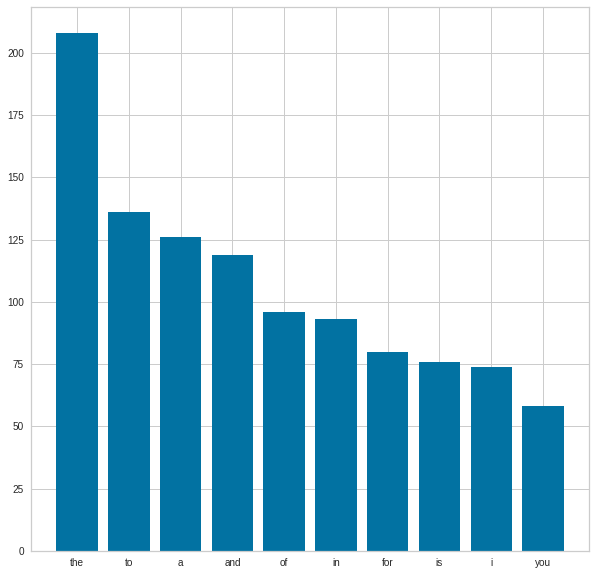

In [153]:
# Top Stopwords - Positive tweets

plot_top_stopwords_barchart(positive_tweet_text_df_RNN['Tweet_text'])

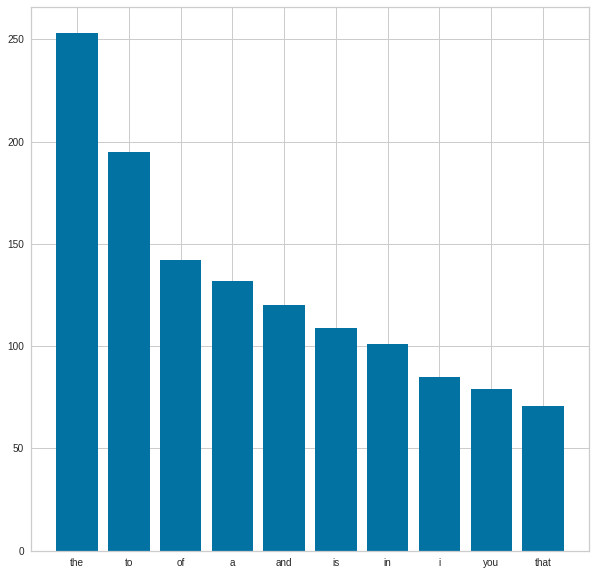

In [154]:
# Top Stopwords - Nagative tweets

plot_top_stopwords_barchart(negative_tweet_text_df_RNN['Tweet_text'])

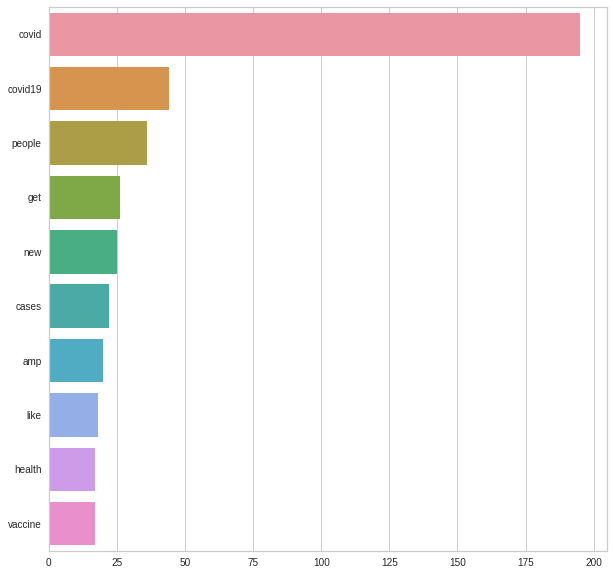

In [155]:
# Top NON Stopwords - Positive tweets

plot_top_non_stopwords_barchart(positive_tweet_text_df_RNN['Tweet_text'])

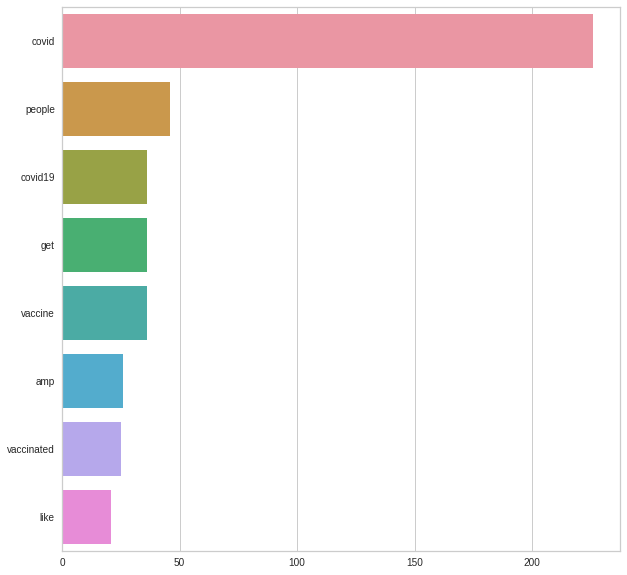

In [156]:
# Top NON Stopwords - Negative tweets

plot_top_non_stopwords_barchart(negative_tweet_text_df_RNN['Tweet_text'])

In [157]:
# Removing stopwords

positive_tweet_text_df_RNN['tokenized_Tweet_text'] = positive_tweet_text_df_RNN['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
positive_tweet_text_df_RNN['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in positive_tweet_text_df_RNN['tokenized_Tweet_text']]

negative_tweet_text_df_RNN['tokenized_Tweet_text'] = negative_tweet_text_df_RNN['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
negative_tweet_text_df_RNN['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in negative_tweet_text_df_RNN['tokenized_Tweet_text']]

In [158]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
62,i haven't gotten covid so i can't say this is false,"[n't, gotten, covid, ca, n't, say, false]",n't gotten covid ca n't say false
452,a cdc study has found that 78 of people hospitalised or requiring a ventilator for treatment of covid19 were overweight or obese 18 months and still not a word said by a public health official about general health weight loss vitamin d,"[cdc, study, found, 78, people, hospitalised, requiring, ventilator, treatment, covid19, overweight, obese, 18, months, still, word, said, public, health, official, general, health, weight, loss, vitamin]",cdc study found 78 people hospitalised requiring ventilator treatment covid19 overweight obese 18 months still word said public health official general health weight loss vitamin
140,_sports stop comparing covid to polio,"[_sports, stop, comparing, covid, polio]",_sports stop comparing covid polio
255,see the overall trends in arkansas schools and covid with this updated table showing virus cases since aug 16 httpstcoemqv4sch4e httpstcogl3e0zvsjl,"[see, overall, trends, arkansas, schools, covid, updated, table, showing, virus, cases, since, aug, 16, httpstcoemqv4sch4e, httpstcogl3e0zvsjl]",see overall trends arkansas schools covid updated table showing virus cases since aug 16 httpstcoemqv4sch4e httpstcogl3e0zvsjl
182,well i don't have covid so this begs the question of how did i manage to fuck my throat so bad and why am i coughing i never get sick grr,"[well, n't, covid, begs, question, manage, fuck, throat, bad, coughing, never, get, sick, grr]",well n't covid begs question manage fuck throat bad coughing never get sick grr
10,the article shows that covid deniers can also catch and spread a disease they call fake it's highly ironic when prominent folks who trash science vaccines and deny a deadly virus are forced to ask science and doctors to save them in vain sadly httpstcotypllvuknc,"[article, shows, covid, deniers, also, catch, spread, disease, call, fake, 's, highly, ironic, prominent, folks, trash, science, vaccines, deny, deadly, virus, forced, ask, science, doctors, save, vain, sadly, httpstcotypllvuknc]",article shows covid deniers also catch spread disease call fake 's highly ironic prominent folks trash science vaccines deny deadly virus forced ask science doctors save vain sadly httpstcotypllvuknc
477,covid19 isnt ending but worker protections are this laborday join us amp our allies in urging the state to take immediate action to extend covid19 supplemental paid sick days paidsickleave saves lives take action and write a letter here httpstcoctmym4ayk0 httpstcoiftfd6fhtc,"[covid19, isnt, ending, worker, protections, laborday, join, us, amp, allies, urging, state, take, immediate, action, extend, covid19, supplemental, paid, sick, days, paidsickleave, saves, lives, take, action, write, letter, httpstcoctmym4ayk0, httpstcoiftfd6fhtc]",covid19 isnt ending worker protections laborday join us amp allies urging state take immediate action extend covid19 supplemental paid sick days paidsickleave saves lives take action write letter httpstcoctmym4ayk0 httpstcoiftfd6fhtc
382,urged mask up as the state sees high covid19 case activity the department of health service is urging people to mask up as they enjoy the festivities over the labor day weekend httpstcodxs4zeknbq,"[urged, mask, state, sees, high, covid19, case, activity, department, health, service, urging, people, mask, enjoy, festivities, labor, day, weekend, httpstcodxs4zeknbq]",urged mask state sees high covid19 case activity department health service urging people mask enjoy festivities labor day weekend httpstcodxs4zeknbq
400,positive covid19 cases in israel have climbed almost equally between vaccinated and unvaccinated individuals the cdc fauci and fda all insist that covid shots are effectivebut the data does not reflect those claims httpstcoe4ufr1ct76,"[positive, covid19, cases, israel, climbed, almost, equally, vaccinated, unvacci

In [159]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
309,its clear the covid vaccine is making people ill,"[clear, covid, vaccine, making, people, ill]",clear covid vaccine making people ill
347,covid theatre,"[covid, theatre]",covid theatre
336,_holmer its true the media wanted the worst possible covid outcome for joe rogan definitely a win,"[_holmer, true, media, wanted, worst, possible, covid, outcome, joe, rogan, definitely, win]",_holmer true media wanted worst possible covid outcome joe rogan definitely win
233,covid did and is going to do a whole lot more of damage im not even talking about death at this point,"[covid, going, whole, lot, damage, im, even, talking, death, point]",covid going whole lot damage im even talking death point
288,hard to live with covid when you're dead suits morrison because he embraces death believing he's going to a better place and all part of his god's plan but for the rest of us we never chose to just live with the bubonic plague shrug our shoulders and die what a copout,"[hard, live, covid, 're, dead, suits, morrison, embraces, death, believing, 's, going, better, place, part, god, 's, plan, rest, us, never, chose, live, bubonic, plague, shrug, shoulders, die, copout]",hard live covid 're dead suits morrison embraces death believing 's going better place part god 's plan rest us never chose live bubonic plague shrug shoulders die copout
470,assumption 3 the only route to covid19 immunity in cuba is through ussupplied vaccines this ignores the fact that more than two million cubans or nearly 302 now 34 of the population have already been fully vaccinated with cubandeveloped vaccines,"[assumption, 3, route, covid19, immunity, cuba, ussupplied, vaccines, ignores, fact, two, million, cubans, nearly, 302, 34, population, already, fully, vaccinated, cubandeveloped, vaccines]",assumption 3 route covid19 immunity cuba ussupplied vaccines ignores fact two million cubans nearly 302 34 population already fully vaccinated cubandeveloped vaccines
217,having second vaccine dose cuts risk of long covid in half study finds httpstcogacwnjtspy,"[second, vaccine, dose, cuts, risk, long, covid, half, study, finds, httpstcogacwnjtspy]",second vaccine dose cuts risk long covid half study finds httpstcogacwnjtspy
178,the black arrow on this chart is pointing to the beginning of the third dose covid vaccine operation in israel as you can clearly see the vaccine is very effective httpstcouglawe58gz,"[black, arrow, chart, pointing, beginning, third, dose, covid, vaccine, operation, israel, clearly, see, vaccine, effective, httpstcouglawe58gz]",black arrow chart pointing beginning third dose covid vaccine operation israel clearly see vaccine effective httpstcouglawe58gz
402,sep 1 report total amp new reported westernma covid deaths confirmed amp probable berkshire 304 0 franklin 115 0 hampden 1563 1 hampshire 303 0 total new deaths 1 total deaths 2285,"[sep, 1, report, total, amp, new, reported, westernma, covid, deaths, confirmed, amp, probable, berkshire, 304, 0, franklin, 115, 0, hampden, 1563, 1, hampshire, 303, 0, total, new, deaths, 1, total, deaths, 2285]",sep 1 report total amp new reported westernma covid deaths confirmed amp probable berkshire 304 0 franklin 115 0 hampden 1563 1 hampshire 303 0 total new deaths 1 total deaths 2285
274,there has been 15 years of studies where is your longterm data on the effects of covid on children,"[15, years, studies, longterm, data, effects, covid, children]",15 years studies longterm data effects covid children


In [160]:
positive_tagged_stanzas = []
positive_tagged = []

for word in positive_tweet_text_df_RNN['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  positive_tagged_stanzas.append(tagged_word)

positive_tagged.append(positive_tagged_stanzas)

In [161]:
negative_tagged_stanzas = []
negative_tagged = []

for word in negative_tweet_text_df_RNN['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  negative_tagged_stanzas.append(tagged_word)

negative_tagged.append(negative_tagged_stanzas)

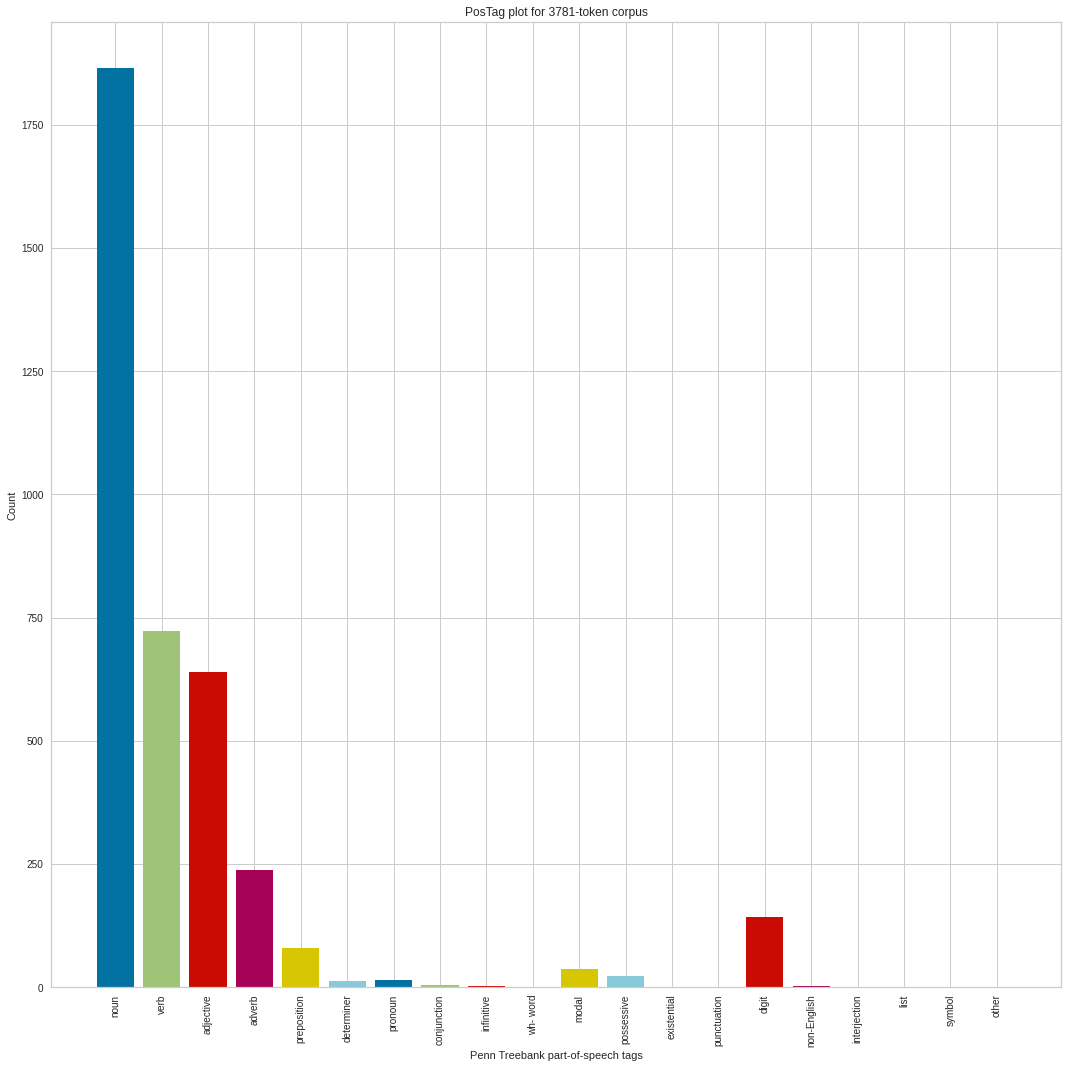

In [162]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(positive_tagged)
viz.show()

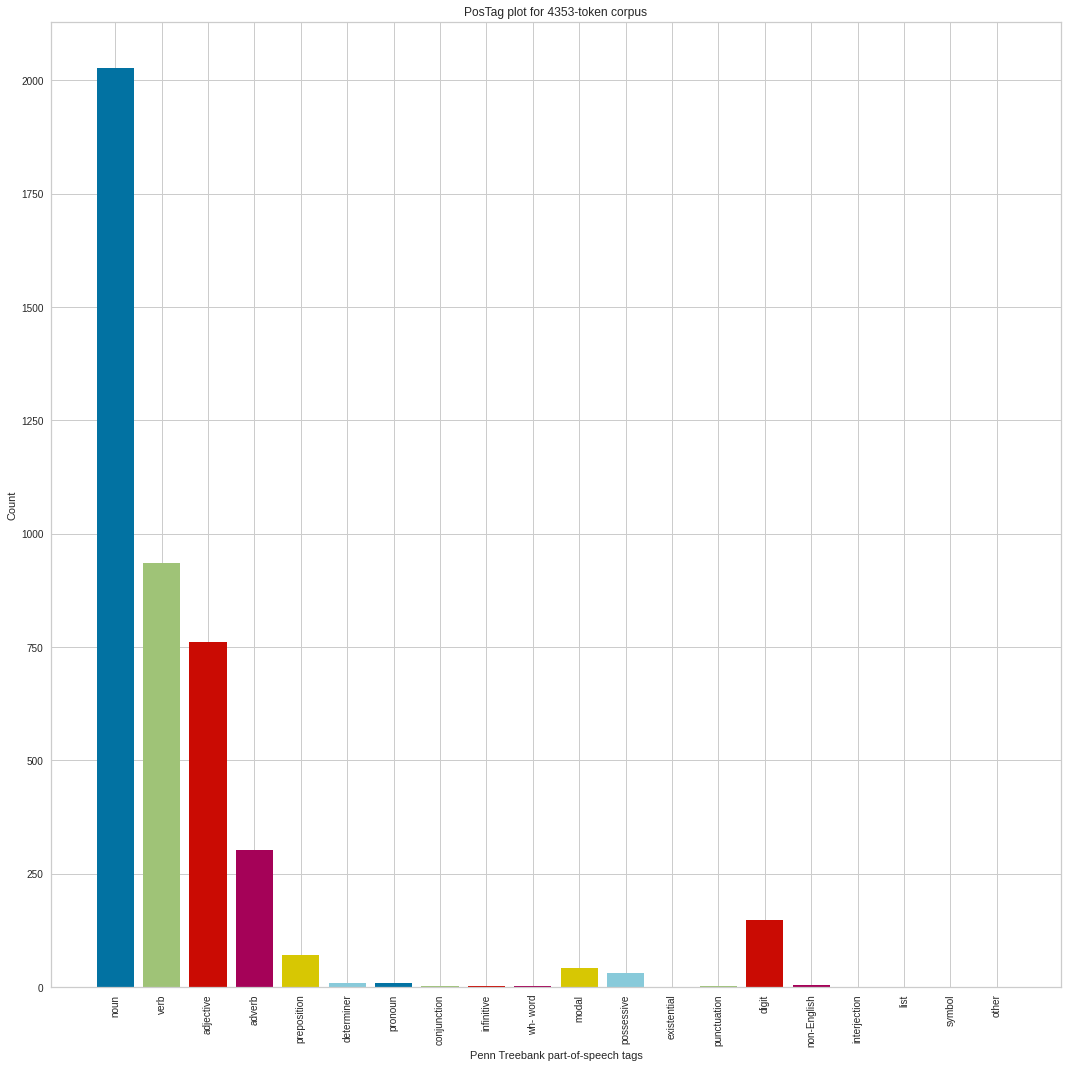

In [163]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(negative_tagged)
viz.show()

#### Dependency Parsing

In [164]:
# Most followed user tweet analysis  Followers_count

most_followed_positive = positives_df_RNN[positives_df_RNN['Followers_count']== positives_df_RNN['Followers_count'].max()]

most_followed_negative = negativies_df_RNN[negativies_df_RNN['Followers_count']== negativies_df_RNN['Followers_count'].max()]

In [165]:
most_followed_positive

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
381,2021-09-02 23:58:06,thehill,Arkansas inmates say they weren't told they were treated for COVID-19 with ivermectin https://t.co/a8lnIWXIq3 https://t.co/Fwewvpb8QW,[],4242509,0.788391,positive,RNN


In [166]:
most_followed_negative

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
206,2021-09-02 23:59:01,dallasnews,Dallas Fire-Rescue mourns loss of 40-year veteran to COVID-19 https://t.co/Xj3mMvotTH,[],711023,0.073394,strongly_negative,RNN


In [167]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_positive['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  Arkansas inmates say they weren't told they were treated for COVID-19 with ivermectin https://t.co/a8lnIWXIq3 https://t.co/Fwewvpb8QW


In [168]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_negative['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  Dallas Fire-Rescue mourns loss of 40-year veteran to COVID-19 https://t.co/Xj3mMvotTH


## Named Entity Recognition (NER)

### Imports

In [169]:
!pip install tqdm

In [170]:
from tqdm import tqdm, tqdm_notebook

In [171]:
nlp = spacy.load('en',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

### Helper Methods

In [172]:
def ner_extraction(data_from_dataframe):
  for sentence in data_from_dataframe:
    print("Sentence is: ", sentence)
    sentence_doc = nlp(sentence)
    displacy.render(sentence_doc,style='ent',jupyter=True)

In [173]:
# Index setup
def dataframe_index_setup(dataframe):
  dataframe['id'] = np.arange(1, dataframe.shape[0] + 1)
  dataframe.set_index('id')
  dataframe.reset_index(drop=True, inplace=True)

In [174]:
def frame_setup(dataframe):
  frames = []
  for i in tqdm_notebook(range(len(dataframe))):
      doc = dataframe.loc[i,'Tweet_text']
      text_id = dataframe.loc[i,'id']
      doc = nlp(doc)

      ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
      frame = pd.DataFrame(ents)
      frame['id'] = text_id
      frames.append(frame)
  return frames

### NER

In [175]:
ner_extraction(negativies_df_RNN['Tweet_text'])

Sentence is:  _14 _Alberta So why couldn't they say there was a case of Covid and not say who as well When my son's class had a case last fall we were never told who it was.


Sentence is:  _TX 325 people in Texas died of COVID yesterday. Respecting the sacred value of precious human life As long as nobody has to be slightly inconvenienced by wearing a mask or getting vaccinated https://t.co/R9JXl2HJAB


Sentence is:  @_Resist_Tyranny _Shooting This is the same Dr Simone Gold who was dismissed from her hospital job for spreading anti-covid-sanitary protection messages The same Dr Simone Gold who was a 6th Jan insurrectionist and who publicly applauded Trump's pandemic response?


Sentence is:  Total Covid Death Distribution by County For FL 2021-08-31 Covid visualizations give insight into covid-19 thanks to our data scientists and USAFacts #covidvislualizations #coviddata #smcanalytics #covid19 #coronavirus #covid_19 https://t.co/q5CRUM0Jv1


Sentence is:  I just subscribed to ☕ Coffee &amp Covid 2021 https://t.co/InDOHpBmNA


Sentence is:  _Hagues __Heller _vicki _ryan _TMF _1 _hammer _warren I said you made it seem by claiming as far as I could interpret your rebuses that vaccinated people get Covid spread it and die like unvaccinated. Without qualifying that it happened at a much lower rate Especially spread and death.


Sentence is:  When I find out that somebody I was in contact with has covid I just keep it o the down low so I can continue going about my business


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  . This week in coronavirus Tennessee climbs to the top of the worst list https://t.co/m4SKjLSJeQ via


Sentence is:  ex climate change is blamed instead of engineering and maintenance flaws in our subway infrastructure ex climate change is blamed for the increase in pandemics when both SARS in 2003 and COVID were very likely the result of lab leaks


Sentence is:  Over 800 new cases of Covid in BC in the last 24 hours The mask mandate was reinstated 8 days ago https://t.co/kxZn51EgpK


Sentence is:  Awful. 3 Miami Educators Die From #COVID19 They were not vaccinated. The most effective way to protect yourself and others –***children and adults*** is by getting vaccinated If no medical restriction stands in your way please do so https://t.co/Pby1LF7heC


Sentence is:  Also the study you posted very much emphasizes the drug *has not been proven to treat Covid It could but it hasn’t been proven.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  that fandom is making jokes about the majority of enha getting covid like it's so fucking funny??? fuckin sick


Sentence is:  “Merck and Pfizer both announced the start of trials to test oral antiviral medications targeting Covid-19 on Wednesday highlighting a growing interest in the market for therapeutics for the coronavirus” yep …


Sentence is:  I have never seen an unvaccinated individual: yell publicly at a vaccinated person spit on a vaccinated individual threaten a vaccinated individuals life with death threats. This behaviour is not just fear this is radicalization Be safe #COVID #GetVaccinated https://t.co/lkqr00IuWA


Sentence is:  This is Florida “backing their blue. 🔗 https://t.co/3ZEICsbYpK


Sentence is:  President Trump left 600K Americans to die of Covid-19 &amp Republicans Governors are banning protection for school children leaving them to die of the deadly virus and is sitting silently by &amp not saying a word don't get me started on Syria What a brunch of demons https://t.co/KcfF0OYvjL


Sentence is:  The original post was "7 kids from Ohio have died from Covid. The response is from a lady in my city Butler County Ohio This is what we are up against folks https://t.co/8jnC4LfK66


Sentence is:  #CoinBeastSweepstakes if I win I would be debt free and take my wife on a well deserved vacation after covid ruined our life’s


Sentence is:  A friend just told me she scheduled her first covid test tomorrow I’ve literally had 20 or more like how is that possible? Lol


Sentence is:  _torres3 These healthy young athletes are very HIGH RISK of getting seriously ill or worse if not vaccinated If they caught covid w/out the vax there is no way they'd be presenting as "just a head cold w "mild symptoms. The vaccine alleviated their awful symptoms ya know like NyQuil


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Someone obstinate &amp frankly stupid enough to take a horse dewormer (let’s be honest we know they aren’t taking the one for humans that isn’t approved for treating COVID instead of any of the vaccines that are isn’t going to be swayed by things like “facts or “reason”.


Sentence is:  What about those reports that one shouldnt exert themselves while I'll with covid due to potential for heart or lung scarring /inflammation?


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  drake spreading like covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  IKR AND TODAY SHE JUST RANDOMLY SAID HER UNCLE DIED OF COVID AND SHOWED ME A PICTURE AND I KAUGHED AGAIN BC WHY THE HELL IS SHE SO OASSIVE ABOUT IT 💀💀💀


Sentence is:  Left wing media My comment is on the ridiculousness of Mr Facebook’s comments Has nothing to do with media Care to see the video of the woman blaming COVID deaths on hospitals?


Sentence is:  So far Texas leads in COVID-19 aspiring back alley abortions and climate change disasters--No room for Silicon Alley start ups and technological progress in the back woods of a political swamp Texas is sinking Raise it up https://t.co/ab1bRdywDI


Sentence is:  20 correction may happen only if covid 3rd wave is serious in India and union government impose nation-wide lockdown Otherwise by end oct 21 5 correction only can happen


Sentence is:  #RescheduleNEETUG covid 19 cases rising in Kerala What if 16 lakhs aspirants give exam on single day Can you all are imagine no of death of people ?


Sentence is:  I had a client yesterday that has had Covid twice now This last time she had to go get the antibodies She’s an anti vaxxer so I asked if she had changed her mind She said as long as her doctor will prescribe ivermectin she’ll never get the vaccine She’s a nurse #wtfalabama


Sentence is:  No one and I mean NO ONE is as intellectually elite as a person that comments “🤡 on a Covid-related post


Sentence is:  Hot blooded Colombians also want to have their own strain making love in the poppy and cocoa fields . steamy .. hot ... https://t.co/5QhGa6Ffms


Sentence is:  Made it back home....Hubby's COVID is manageable but he's miserable (When your "guys guy of a husband is actually laying down &amp covered up you know he's sick 🥺) But it's good to be home Now to watch my Ohio State Buckeyes and have a glass of wine while I play nurse!


Sentence is:  Are we going to need to be vaccinated and/or a negative covid test 72 hours prior to your shows 🥺


Sentence is:  I know 2 people who died this summer from non covid related circumstances and both of their death certificates say covid so make that 44 at most


Sentence is:  While it is very reassuring that the children infected with Covid rarely get very unwell it’s very sad to read about children needing to be admitted to hospital because their parents are too unwell to care for them Yet another reason to get vaccinated https://t.co/WSQ442Gxqr


Sentence is:  _Cotti I understand the argument But changing rules midstream potentially threatens trust in entire vax schedule and in particular can be used to undermine trust in COVID vaccines Playing with fire FDA should be going as fast as humanly possible to get standard approval.


Sentence is:  Just because you dah completed vaccine and also pernah kena covid doesn’t meant yg you memang free terus dari jangkitan covid ye Ingat there is people around you jugak.


Sentence is:  _LDF So let's go after guns corrupt politicians those spreading Covid etc Two can play this game.


Sentence is:  _MD On a related note national registry providing information on antibody response after receiving vaccines against COVID-19 among people with hematologic malignancies https://t.co/tAQQb7EbK1


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I great insight into how Australian covid efforts are viewed from outside the country Not a good report card overall We need to be concerned that these additional laws are repealed in due course.


Sentence is:  _Blue 3 &amp illegally overspent &amp funded A50 should be reversed via A16 and us back in the EU to return us to growth,to reduce the debts that were caused by lie-won undemocratic Brexit and the belated badly managed costly Covid that was far more deadly than it should have been.


Sentence is:  Okay wtf is not clicking for y’all Covid is contagious/a PUBLIC health issue Your choice regarding vaccination CAN affect someone else’s life whether indirectly or directly Abortions literally affect only one person &amp aren’t a threat to the country at large They don’t compare


Sentence is:  “DiKtator Dan ..err wot is it you said about Israel’s covid response ?? https://t.co/gmJDYpSk3Y https://t.co/CRIWDPZ82J


Sentence is:  So in a week and a half BC will be rolling out covid passports just in time for the cases to fall naturally after a month rise As the cases fall they will claim it as the passports working and will ramp them up instead of letting them expire on Jan 31 2022


Sentence is:  october 30 2020 apat kami sa pamilya nagpositibo sa covid nung pinatest kami I was sick that time I had fever and cough I thought it was just a normal fever di ko inisip na magkacovid ako Unfortunately I became a covid patient I had a hard time to accept the news+


Sentence is:  Bro she has Covid rn wtf that sucks


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It’s from Covid relief funds Has to be used on Covid mitigation This is a great way to spend it!


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  INSANE. This is a graph of societal breakdown magnified by red-state political polarization. COVID deaths by county arranged by percentage of Trump voters https://t.co/ez6NTl6nCc


Sentence is:  you realize COVID is crashing our health care system worse than in 2020 any thoughts about providing a little leadership Ragging on people to get vaccinated &amp "wear masks can be done by randos in parking lots Do better


Sentence is:  only ugly girls get covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  We Work at the A.C.L.U Here’s What We Think About Vaccine Mandates https://t.co/N75jbL4OXl


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Stay Safe .. Get your vaccines Stay away from humans be antisocial if need be Be thankfull for every breath you take bcoz it hurts not being able to. Survive so you can see tomorrow and tomorrow is another chance of living. Covid sucks 😭


Sentence is:  So we will be like the red line on the left Looking at a large proportion of elementary kids getting COVID in the next few weeks https://t.co/PgcoLaBXUH


Sentence is:  No they haven't But it currently seems to be an issue of vaccine hesitancy more than a lack of supply https://t.co/LWEvrANB84


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  _Dawg9 My personal care physician is a Cleveland Clinic doctor &amp they can't tell me how long natural Covid antibodies last.


Sentence is:  just a reminder to wear a mask to prevent the spread of covid 😷 https://t.co/0foWkLFw8T


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It's terrible to say but hospital staff should be indemnified to just let unvaccinated COVID patients in critical care die No heroic efforts Other patients need the ICU beds.


Sentence is:  This account is posting dangerous and misleading information regarding covid vaccines PLEASE SHUT THEM DOWN!


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  There is a racial disparities in health &amp healthcare in US &amp everywhere Hawaiians and Pacific Islanders are at heightened risk for infection hospitalization &amp death from COVID-19 #socialdeterminants of health #socialconditions https://t.co/mbOrGELr3R


Sentence is:  I did not expect the “the FDA rushed vaccine approval to “horse dewormer is the cure for covid pipeline in my pandemic bingo Enjoy the endless diarrhea Joe Rogan 🖕🏼


Sentence is:  Anti-vaxxers conspiracy theorists climate change deniers trump voters dying of Covid what's there not to like Mass suicide of the basket of deplorables.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I believe if we get a variance from the Delta that's most likely going to be even more dangerous we're looking to start from scratch https://t.co/df0LtyFmYN


Sentence is:  Also note that this district has done NO ventilation upgrades even when parents have requested this at multiple meetings They also do not have any posted information for their covid tracing and notification plans in their online safety plan


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  My stepdaughter was 9 when a judge in Quebec said that she could be vaccinated even tho her Mother disagreed with it pre covid she had no shots for anything until then the 9 year old had a better understanding of science then many adults in her life


Sentence is:  _media Go to “vaccine outcomes on the _media Covid web page Scroll to the last bullet point it provides a ratio What you have to do is track that ratio day on day and do the calculation Almost as if doesn’t want vaxxed deaths announced


Sentence is:  PLEASE REMEMBER TO CHECK IN! As part of Gavilan College's COVID-19 safety protocol please remember to scan the QR code on the door of any campus building you enter and complete the self-screening This will be used for contact tracing https://t.co/jXWRxzoyFW https://t.co/26UoK22Ebs


Sentence is:  Leaked lab results from Covid PCR test cases of exactly WHAT are they looking for?? https://t.co/pTfiiJ2Qky


Sentence is:  I get that completely but for this incentive my understanding is that the rationale was a "working in covid incentive so on that basis I wouldn't be surprised that should things get better the incentive aguh done 🤧 makes you wonder though if it cant be permanent


Sentence is:  _373 You’ll know if you have Covid


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  And then you wonder why you were denied a COVID test SMH go quarantine for a couple decades please.


Sentence is:  Any logical push for mandates is dead “Giving evidence to MPs on Tuesday Prof Sir Andrew Pollard said the fact that vaccines did not stop the spread of Covid meant reaching the threshold for overall immunity in the population was “mythical”. https://t.co/Az2wzR73Kf


Sentence is:  _fromtherock 170 million people in the US have been vaccinated so the number of adverse reactions is &lt;.003 of 1% Hospitals are filled with unvaccinated COVID patients not with people who've had vaccine reactions. We each have to decide which of these two risks we are willing to take.


Sentence is:  Isn't this exactly what Democrats have been demanding when it comes to the dodgy covid vaccines?


Sentence is:  Seriously I have a cold right now and it’s literally ruining my entire day Awful And I guarantee worse than anything I would go through if I had that Covid instead.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  COVID-19 treatment pill administered in new Pfizer clinical trial. https://t.co/vE2RBXfwwp via


Sentence is:  'Tone deaf back-to-school video by Tennessee education chief criticized amid COVID outbreaks https://t.co/FYD4QLWCBe


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  Yet morrison keeps knocking them ?? jealousy is a curse —— Queensland records no new COVID-19 cases https://t.co/aZpl3nHVfu


Sentence is:  please dont give me covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  And trump spread the lie children are “immune while he KNEW covid is deadly for kids &amp Woodward did too I never understood why any thinking person would think children don’t need to be protected But media never cited let alone hammered this point home Even now #TheReidOut https://t.co/n3EUUDHHP4


Sentence is:  What science is referencing Why does he love “science that forces women to deliver unwanted pregnancies but has seen no science for protecting children from #Covid_19 spread #DeathSantis


Sentence is:  _toes _Zeck Cardio vascular dusease is an umbrella term used to clasify thousands of known diseases Thats like saying there's more people in asia than chicago No shit However covid is the single most deadliest disease of last year.


Sentence is:  Three additional COVID-19 related deaths in PA/Nederland https://t.co/DkGyP0sbYQ https://t.co/EDQ01Dq9lH


Sentence is:  AFLDS “The CDC is now listing vaccinated COVID-19 deaths as UNvaccinated deaths if they die within 14 days of the vaccine. Wow.”


Sentence is:  Jesus H TAPDANCING Cherist What the hell was that rah rah speech I saw u give about school KIDS are sick and dying and u wanna talk about backpacks 40 0f COVID cases are school age kids wake the hell up.


Sentence is:  It's very likely that the guy who refused the vax and got COVID and the couple who took Ivermectin for it were deceived by fraudsters to prosecute their own political or money-making agendas. It's not good that they fell for it but maybe it doesn't mean they deserve death.


Sentence is:  4 COVID-19 is easily treatable at home with an early multi-drug treatment protocol. 5 The current vaccines are obsolete unsafe and unfit for human use.


Sentence is:  The Texas law is not about being pro life it is about power over women If it was about life they would demand masks everywhere to protect children Instead they are anti masks and children are dying of Covid and they give a damn.


Sentence is:  #LarryElder wants to take away a woman’s right to choose He supports banning Roe v Wade along with banning mask mandates He is anti-Covid vaccine He is Stephen Miller’s mentor! #KeepCaliforniaBlue #KeepCaliforniaStrong #KeepCaliforniaSane #VoteNoOnRecall #StandWithGavin https://t.co/4kqXaki4LC


Sentence is:  If she hadn’t dropped the ball with WW84 I’d take this seriously unless Patty’s got a way of fixing Covid the statement is complete nonsense 🤦‍♂️


Sentence is:  im sorry I keep tweeting about this but it blows my mind that the new post-leftist stance is "actually this is a medication that works on people too and They don't want you to use it to treat covid" I'm so excited for a year from now when all these dorks are flat earthers


Sentence is:  literally zero people have been shown to have a causal link of death to COVID vaccines Literally zero Some have been reported but not one has been proven or shown to be linked to the vaccine


Sentence is:  https://t.co/7tkrF3atFu Colts Darius Leonard on not getting COVID-19 vaccine ‘I want to get more educated about it Our Hashtag https://t.co/tDeW0hb5So 2020 #FWN #freeworldnews #today


Sentence is:  The black arrow on this chart is pointing to the beginning of the “third dose Covid vaccine operation in Israel As you can clearly see the “vaccine is very effective https://t.co/UgLawE58GZ


Sentence is:  Aboriginal people in #Wilcannia are noticing ongoing symptoms of COVID-19 weeks after being infected 2/3 of community are partially vaccinated and the push is on to get the remaining protected from the virus https://t.co/GCcvAMcNJ3


Sentence is:  Does that apply to COVID too Asking for a friend.


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  Shops in Klang Valley neighbourhoods struggle wary of reopening because of Covid-19 variants https://t.co/VtnKKuJMiE #eNewsMalaysia #eNewspaper #Malaysia #MalaysiaNews #Featured https://t.co/PV2gMu4GiZ


Sentence is:  We Work at the A.C.L.U Here’s What We Think About Vaccine Mandates https://t.co/KyDq5FuBu1


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Mask use in community settings in the context of COVID-19 A systematic review of ecological data EClinicalMedicine https://t.co/O62PR7qzbN


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I’m wondering if this could be a worker’s comp claim if the Covid spreads at work 🤔


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  #JusticeforNEETUGAspirants covid 19 cases rising in Kerala What if 16 lakhs aspirants give exam on single day Can you all are imagine no of death of people ?


Sentence is:  What variant of covid makes you do this https://t.co/oP5mBAOSLb


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  What's wrong with some providers Like what I'm an old former nurse 2 Covid vaccines on board and will get a booster when I am told it's indicated At least I have the Binax home test to get an idea should I have symptoms I don't understand the whole world anymore.


Sentence is:  _Artist_Wolf Yeah but there spreading COVID around Your correct on saying republiCQNS QAnon Marggie had a maskless rally in Alabama now hospital are over crowded with COVID don had a maskless rally in Florida the death rates have exceed WWll Vietnam and Afghanistan They continue to lie


Sentence is:  Stanford experts talk COVID mental health transitions in 2021 https://t.co/jaPZDc0EOk


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  _questions But here’s every so called Australian Experts lying to us saying this isn’t happening That’s Murdoch media at work


Sentence is:  Dallas Fire-Rescue mourns loss of 40-year veteran to COVID-19 https://t.co/Xj3mMvotTH


Sentence is:  And who said it was guaranteed I’m not arguing about covid I could care less Remote raiders do less damage is the point of the conversation.


Sentence is:  The high positive rate has been sustained for over a week now indicating there are more undetected cases and testing capacity is not meeting the need. Data from Interactive dataviz here: https://t.co/LWdOrjMJmF


Sentence is:  Our state legislature fought to make healthcare even less available to people with a uterus along with further criminalizing homelessness and prohibiting COVID protections but at least we don’t have to have a permit to carry a gun 🤦‍♀ Their definition of “life is.. wrong.


Sentence is:  _Morboso Covid is an evolved versions of SARS It’s much worse and more contagious And if you refuse to wear a mask then you are also one of the “filthy animals you refer to.


Sentence is:  It’s done without live events My kids have zero clue what a fighting game is and have even less interest playing them Covid kinda crushed it…


Sentence is:  Basically worldwide trade has become less smooth thanks to COVID and that not only causes the occasional shortage but tends to up the price of stuff made elsewhere anyway.


Sentence is:  Having second vaccine dose cuts risk of long COVID in half study finds https://t.co/gACwnjtspy


Sentence is:  “Data fm COVID-19 tests in US UK &amp Singapore show vaccinated infected w Delta SARS-CoV-2 can carry as much virus as unvaccinated Despite protection offered by vaccines a proportion of vaccinated people can pass on Delta possibly aiding its rise.”https://t.co/6tF6Fh4p49


Sentence is:  What's ironic is the worst symptoms of the "alleged Covid-19 virus Still hasn't been isolated and still can't produce a sample are created by the SARS-CoV-2 spike protein. The very thing the Covid vaccines are instructing your body to make!!...cont


Sentence is:  Not a new Covid variant 🤦🏽‍♀️


Sentence is:  Any discrepancies.. Covid-19 Vaccines are capable of causing damage in a number of different ways. Disturbingly all these different mechanisms of harm have synergistic effects when it comes to dysregulating your innate immune systems and activating latent viruses...cont


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Yea I know but due to Covid less inventory &amp more people shopping online the holiday sales weren’t so great last year.


Sentence is:  I kind of want to put a clause in every EULA that mandates people who accept or otherwise agree to them has to get vaccinated against COVID.


Sentence is:  Maybe she went too far but I'd be righteously pissed off too if I'd been let down by vaccine supply and proper quarantine facilities along with having a "let her rip strategy foisted on her with an adjoining state out of control with Covid.


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  Long covid seems made up


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  COVID did and is going to do a whole lot more of damage I’m not even talking about death at this point.


Sentence is:  Florida adds 1,338 COVID deaths and reports 21,000 new cases https://t.co/8mZ7OzJPf3


Sentence is:  Data digest Covid by the numbers for Sept 2 2021 https://t.co/2UQj0dUeNT


Sentence is:  i’m getting worse but it’s not covid so that’s good at least


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  When will kids be getting their COVID shots? We thought it would be this month but things were pushed back Here's why: https://t.co/JuKRwpfBs5


Sentence is:  _Post3 He don’t need the Covid vaccine lmaoo


Sentence is:  So Qld SA have zero covid Vic doing EVTHG poss to curtail the cases acquired from NSW but these leaders get criticism?? And Beredicklian thinks NSW on 1200 is doing really well What planet are you on dear?


Sentence is:  After 10 more covid cases they're going to fill that empty unused Aurora greenhouse with the unwashed unvaxxed Free wart removal and de-horning #medicinehat #MOVINGFORWARD #Progressive.


Sentence is:  _curve That’s the problem It’s a contradiction They had much more robust level 1 studies many cRTC showing no benefit with cloth masks Now we have a cRTC for Covid showing no benefit What more do you need?


Sentence is:  Fuck yall fake ass covid numbers and lies yall mfz lying about all that shit fk yall system


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Madam Maharashtra is still the state with most covid dates Speak on that We are losing our fellow countrymen


Sentence is:  Isn’t Mercer the funding the antivax movement Not just covid—Mmr flu polio rotavirus etc


Sentence is:  It is mentally retarded it make since for 2020 because of covid but after that why


Sentence is:  COVID delta variant blow ups the Ron DeSantis ‘master politician myth Editorial https://t.co/60BWXWfaLy


Sentence is:  When your family says we just need to pray about covid instead of getting the vaccine https://t.co/27Ad7NXOts


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Vic Covid 208 new cases. Now definitely following NSW trajectory. Only positives 1 evolution is same as NSW but lower levels; 2 nearly double vax protection per capita (16+ than NSW at same level of community spread 3 for now not even close to Vic 2nd wave https://t.co/IgOgPG3l9o


Sentence is:  Vaccine maker has asked agency to authorize booster at half the dose given in the first two shots https://t.co/Q8Pk0J4LoG


Sentence is:  I would live to but I would be worried about bringing Covid home to my 11 year old I will however spread the word I will do it on NextDoor I love to piss off all these antivax antimaskers in my neighborhood.


Sentence is:  Refuse to get vaccine Then complain about going to sites with potential Covid exposure 🤦🏻‍♂️


Sentence is:  _Cushion I have no clue if she is or isn’t nor do I care if she’s getting a divorce I only care about all of our care partners who face covid daily and those we lost over this last 1.5 and having one attention seeking RN wearing the badge while spouting absolute nonsense is not ok.


Sentence is:  _mua My period was messed up from covid I heard if this happens it’s basically an immune response?!?


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  There has been 15 years of studies Where is your long-term data on the effects of Covid on children?


Sentence is:  And I want to help people too And I have I have lost count the number of people who have been cured of covid with ivermectin.But you do you.


Sentence is:  if you want to reduce covid problems reduce your diabetes risk or your high salt intake see no mask needed https://t.co/52rLX6ZlQ4


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  what if it turned out the cure for covid in men was weekly estrogen injections?? that would rule.


Sentence is:  Rebounding employment during Covid delta spike unemployment benefits just ended Joe Biden is amazing Nothing to see or talk about move along


Sentence is:  Perhaps it’s a difference in culture You had 600K ppl die in your country from covid yes just 0.19 off the population. We’ve only lost 0.003 of our population 1K from covid ~100x less. Bear in mind we didn’t even have to wear masks for most of 2020 due to said overreach


Sentence is:  Hard to live with covid when you're dead! Suits Morrison because he embraces death believing he's going to a better place and all part of his God's plan. But for the rest of us we never chose to just "live with the bubonic plague" shrug our shoulders and die. What a copout!🙄


Sentence is:  You lead them to their deaths then abandoned them to their deaths You sicken me with your hypocrisy Luckily it caused fewer unnecessary deaths than your Government's handling of #Covid I hope you can't sleep at night If you can I just think far less of you which is zero https://t.co/c2EJ219N8f


Sentence is:  #GenesisEVmodels from 2025 #BongJoonHo ＂COVID-19 will not destroy cinema＂ #ITZY #봉준 https://t.co/bGpJD3eHF4


Sentence is:  . _WGDD The socio-economic impact of #COVID on millions of women in Africa calls for concrete steps for financial inclusion and women empowerment Will you strengthen commitments to advance gender equality for all #ActForEqual #GlblCtzn


Sentence is:  We literally have hospitals running out of room due to Covid &amp you dipshits are doing this? https://t.co/Ut8zBD6ij9


Sentence is:  A 47-year-old Escondido youth football coach &amp father of 3 dies of COVID-19 The coaches wife a medical assistant says when it came to COVID-19 "he just felt it was overblown. She said she tried to convince him but he refused to be vaccinated https://t.co/DkqWwZyHXC


Sentence is:  A friend of mine just died from Covid He was only 57 but had health issues 2 wks ago he was fine no symptoms Then he was on ventilator,now he has died Fully vaccinated. #Vaccinate Double vaccination cuts the risk of long COVID in half study finds https://t.co/Eo0cKkzCWP


Sentence is:  The challenge with monoclonal antibody therapy for Covid is that it's administered by infusion Most infusion centers (hospitals and cancer treatment facilities are not places where you would want to bring infectious individuals We're finally seeing Covid only infusion centers.


Sentence is:  I’m tired of my friends having covid I just wanna be friends again 😢


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Personally i'm in my 20s so idgaf about covid. But my mom is asthmatic and i live with my 73year old grandfather (for university so i figured it was worth getting for these people I'd do it ten times over for an additional 1 protection. Tho i fully respect ya'lls choices


Sentence is:  Snowden throwing up Brooklyn (with COVID-19).


Sentence is:  It’s clear the covid vaccine is making people ill


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Joe Rogan took horse dewormer for Covid so imma try a similar route &amp sniff crazy glue.


Sentence is:  Joe Rogan after getting COVID and then recovering https://t.co/H4Vq0e4iSG


Sentence is:  They are braindead....probably thru Covid!🙄


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  The Covid deceased went on to say "why didn't I learn how dictionaries work with standardized definitions before the lack of oxygen completely killed the neurons related to linguistic communications in my former brain"


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  The Fans Are Back The Excitement Is Back..... and covid is back.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It continuously circles back to why the mainstream advice on covid is correct why the conspiracy theories are wrong and why things like mask wearing shouldn't be party political issues But it is definitely written to resonate with a certain political mindset.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I would definitely encourage you to not be too scared and get out and about. Especially if you have had the vaccine It vastly converts COVID to a flu type illness. We can’t hide away forever and have to start living again.


Sentence is:  NSW Covid lockdown restrictions update to Sydney regional NSW and Canberra ACT coronavirus rules explained https://t.co/wLmQlH0W6A


Sentence is:  Optimal Lifting Of COVID-19 Restrictions Would Follow Pace Of Vaccination https://t.co/OhekzBETop A new analysis suggests that in order to boost freedoms and protect against overwhelming new waves of COVID-19 the pace at which restrictions to reduce spread are lifted must b.. https://t.co/mIDJvgX2Is


Sentence is:  Immunogizer stem cell advertisement lol how it help with covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  New covid Variant. called MU smh


Sentence is:  Benefits for who Perhaps the benefit for them do not wear off Was the vaccine created for Covid Or was Covid created for the vaccine https://t.co/863tfqwK7c


Sentence is:  Aren’t the creepy Kardashians in line Making their loot from smut and big fake a***s and vulgar photos Like Covid is not enough to deal with Not a hater not jealous just sayin….this is America now 😳 go figure🥴


Sentence is:  I need some lovin geesh its hard out in Covid-Earth now.


Sentence is:  I had a customer earlier talking about how no one dies of Covid Person behind him spoke up and said no one dies of AIDS either but they sure as hell don't want that shit Customer stopped going on with his opinions after that


Sentence is:  ivermectin is cheap and easy to get if the pharmacies were not playing blocking idiots. I am taking Zinc Vitamin D Quercetin supplements now they are immune boosters so makes sense with covid running around.


Sentence is:  FFS just talking with my bestie in FL She is pregnant and has a high risk pregnancy She went to her midwife centre today and saw someone who is not her usual practitioner They refused to wear a mask because they already had covid IN FLORIDA Friend walked out 🤬🤬🤬🤬🤬


Sentence is:  I understand these are visual that lead to an impression they aren’t working but they are that’s why I also share this both are staying the same things vaccinations are working in Israel https://t.co/B2cRROUhAV


Sentence is:  _Holmer It’s true the media wanted the worst possible Covid outcome for Joe Rogan Definitely a win!


Sentence is:  800 case of covid was a gentle increase but now an explosion what will you call 1000 case Henry Oh yeah you don't believe in waves your words a few months ago another flip flop by you Are you this stupid or do you work at it #FireBonnie before more people die on her watch https://t.co/U027ttSsbF


Sentence is:  'Natural Immunity Lawsuit Over COVID-19 Vaccine Mandate Ends in Surpris.. https://t.co/v4iR1lNxfA via


Sentence is:  Have MAGA's claimed that eating Preparation-H® The Hemorrhoid ointment ....Cures COVID Yet?


Sentence is:  What are the odds you've been exposed to COVID and just didn't get sick HuffPost I’ve often wondered myself 🙏🏾✝️ https://t.co/1XhIUJIl3R


Sentence is:  So now the hospital on the hook if something goes wrong with ivermectin The stupidity is increasingly astounding. https://t.co/iYtCWYgsjg


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  83 of our population has Covid antibodies. Eighty Three Percent https://t.co/CsB6pZmlvp


Sentence is:  COVID Anti-Vaxxers Aren’t a MAGA Death Cult It’s Worse Than That by Tim Wise Aug 2021 Medium https://t.co/4YnQpii2RJ


Sentence is:  Covid Theatre 🙄


Sentence is:  If you’re pro-vaccine mandates and pro turning Covid “rule breakers into the authorities you are an asshole.


Sentence is:  literally most of the population survived covid but even if it’s less then 1 of covid patients that die it would still be in the 600,000s you also fail to even bring up the 99.999 i gave out https://t.co/viZPlmTXo3


Sentence is:  He killed their parents by not taking COVID seriously You ate spectacularly bad at this.


Sentence is:  I’d love to get vaccinated but please tell me why you lie about covid deaths WITH the virus verses vaccine deaths WITH the vaccine Until we get honesty in figures from real deaths from both covid and the vaccines then nobody believes a word you say


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  The most frustrating thing about the COVID vaccination is that the experience of a COVID infection is an incredibly convincing argument that always comes too late.


Sentence is:  _Elante _mcroberts that's interesting since the entire gay cake debacle was a preplanned setup where the SOLE purpose of approaching that particular baker was to setup a legal case so the issue could be brought to a court candace just wanted a covid test i doubt she will take legal action.


Sentence is:  hospitalization numbers seem yet-to-be finalized oha’s hospitalization data dashboard gives a glimpse but not sure how up to date they seem roughly in line with previous trends something like 180 people on ventilators right now for covid 19 in OR hospitals


Sentence is:  Plus isn’t it ironic that a company that has worked sooo hard to make the community safe would let a potentially Covid person walk around without knowing they carry the virus So much for their altruistic ideals.


Sentence is:  planing to let covid into community is planing to fail repeatedly #SARSCoV2 has jumped to dozens of animals cats dogs deer minx rodents just since it last emerged &amp it had genetic evidence of travelling through snakes pangolins &amp turtles since it last showed up as #SARSCoV1


Sentence is:  This oxtail mussi cure Covid Mus...🤷‍♂ https://t.co/xf6cfkTskg


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I need to go on a starving journey from tomorrow onwards bhai I’ve gained 1.5kg during covid was supposed to lose it ????? Weird


Sentence is:  Praying I don’t have covid again ☹️


Sentence is:  Covid-19 is God's wrath Life will never be the same again Think Before it is too late.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Oh no Sue Do take care of yourself May this not be COVID-19 Get well soon.


Sentence is:  #auspol why are SA &amp WA hospitals in high demand without COVID cases Is it due to drops in private health insurance Is it poor funding of other parts of the health system making people seek health care from hospitals Living with Covid means answering these Qu’s https://t.co/HjSw41d6wo


Sentence is:  AND the vaccine ONLY worked for 6 9 months As a retired Nurse it is exactly like the flu FLus have killed the elderly and sick for years Every year we get a different flu Last year it was Covid-19 This year it is the Delta Variant NEXT YEAR SOMETHING ELSE!


Sentence is:  I just had to cancel a family outing because of Covid Don’t you think we’d be in a better place right now if it wasn’t for all the crazy people like the ones that don’t support science?


Sentence is:  Now they gotta third strain of COVID-19 called “MU 😭


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Gladys has single handedly infected the rest of Australia (and NZ and seemingly deliberately put covid zero beyond reach for NSW and now Victoria That's no reason for the other states to give up before they reach maximum levels of vaccination.


Sentence is:  _drizzle Can't wait till the explicit motto of the Republican party is "don't fear covid"


Sentence is:  I just can’t imagine being unvaccinated having Covid giving it to a family member and then they die How do you live with that?


Sentence is:  _bris _mama223 _FineGirl _18_eh _still When covid causes labor shortages and your pole dance instructor got certified online🤣🤣🤣


Sentence is:  Opinion To Enable Travel the World Needs a Vaccine Certification System The New York Times ⁦ This is a totally arrogant poorly written column by the usual Brits led by the infamous poodle lap dog Tony Blair who mouths off all time https://t.co/X9Z26MoDT9


Sentence is:  AOC suggests Manchin to blame for NYC flood deaths They are causing more deaths in the streets Afghanistan illegal immigrants from all over the world Covid and where are the immigrant kids she has always been worried about https://t.co/wCzO3g8NFa


Sentence is:  Imagine the unemployment figures when all the people temporarily employed to man vaccination &amp covid testing sites lose their jobs #auspol


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  SEP 1 REPORT Total &amp new *reported #WesternMA COVID deaths (confirmed &amp probable) Berkshire 304 (+0) Franklin 115 (+0) Hampden 1563 (+1) Hampshire 303 (+0) Total new deaths +1 Total deaths 2285


Sentence is:  Thank you 👏 https://t.co/DCAbm6aSbn via


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  When did she denied covid?


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I'm over here moving heaven and earth (colloquialism to teach all these kids in person but COVID-19 keeps threatening the school year I just want to TEACH 😩 #TeacherLife #LoveWhatYouDo


Sentence is:  _1 Im worried a few of mine were ghosted too I’m stuck home (both my kids caught covid 😩 so I’m not sure what if anything has arrived at my school


Sentence is:  _Thanks_777 _q So.. can you explain how all these extra people died "with but *not "From Covid"? Why all the extra "definitely not covid deaths? Bad sushi 🍣❌ 🪦 https://t.co/UjlT85qpuq https://t.co/9f3BDT5jXi


Sentence is:  People have lost all humanity I never thought Americans would allow children to be in danger and hurt I’m ashamed to say that with the lack of protection of guns and COVID I’m wrong these bastards don’t care about anyone or anything.


Sentence is:  He should tell that to the Floridians who’ve died from covid under his administration.


Sentence is:  How did the Seoul Philharmonic cope w/COVID That and more in my discussion of the new book Breathing Communities w/Sungeun Kim and Heewon Kim _stp Watch on #Periscope #331 COVIDCalls 9.1.2021 BREATHING COMMUNITIES IN SOUTH KOREA https://t.co/kXE7PEwq43


Sentence is:  If you deny science you shouldn't benefit from it You are a strain on the healthcare system people are dying of non-Covid related issues because they can't get a bed in a hospital due to all the anti-vaxxers w/COVID Jesus will heal you though I'm sure.


Sentence is:  Well people die from penicillin. medicines can have side effects and they can vary person to person If 34 out of a million died due to vaccine then that’s far less than the 16k per million that died as a result of covid..


Sentence is:  Does he mean misinformation like vaccinated don't get or transmit covid Or misinformation like there's no early treatment Or misinformation like everyone has an equal and high chance of dying from it whether young or older obese or not healthy or severely compromised?


Sentence is:  Don’t just sit there trying to find more idiotic gifs Read something https://t.co/AoYCIoFFMQ


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It’s a new strand of covid out 😒


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  What a ridiculous exaggeration deliberately leaving out context about who needs to download the app and why. There are important discussions about just what Aussies are giving up in order to protect people from Covid but this aint it Especially from an American #Covid19Aus https://t.co/UR4vkSkql7


Sentence is:  These liberals are something else We should call them the Covid party They obsess about coved wanting you to believe it’s like the Bubonic plaque that killed half of Europe They don’t believe in what science says but accuse other of the same old bulls*** #Theyconfused https://t.co/bZbroPkcS0


Sentence is:  So you’d be happy to pay damages brought by patient who receives COVID whilst in hospital from unvaccinated staff member on front line? I don’t think they should even be in the building


Sentence is:  Miss your updates and always smiling face as you led us through the early dark days of COVID… https://t.co/pM5ff5pp6O


Sentence is:  You’re being disingenuous You know that I don’t think it’s okay to have people with Covid or people coming from overseas in the community The point I’m making is we didn’t need to know immediately You seem to believe your rights are more important than usual police protocols.


Sentence is:  Covid-19 is like Gelato when it comes to weed You dont know what new strain bout to come out 🤢🤦🏾‍♂️


Sentence is:  negative covid test https://t.co/m1D3wsMGfm


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Doing chest compressions in full covid PPE is the worst I think I’ll count that as my exercise today.


Sentence is:  Data shows Florida's latest COVID surge the deadliest yet Via The Independent Thu 02 Sep 2021 23:46:27 GMT https://t.co/CHKsF8DV8O


Sentence is:  Imagine booster shots every 5 months and a daily Covid pill Coming soon! #NoVaccinePassports


Sentence is:  Many people wonder if the brilliant Ms Owens were dead from Covid what she would write about this?


Sentence is:  I swear #bonniehenry doesn’t think people can google #Novascotia covid measures 🤣🤣🤣


Sentence is:  Hi can you PLEASE do something to help with the 4th wave of COVID? Healthcare workers are struggling people are dying unnecessarily and “personal responsibility is NOT working #skpoli #help


Sentence is:  Australia records 114116 death in 2020 909 death of covid.. 0.64%


Sentence is:  The globalist corporatist elites who have for decades ignored and bypassed the parliaments and people of democratic nation states (in the UN WHO EU have exploited the COVID crisis and emerged unchallenged as the fascists they always were. https://t.co/qpOmIixwkP


Sentence is:  _leeder The UK did. https://t.co/hfhFb3LTF8


Sentence is:  I apologize but don't understand the point you're making Close contact and contract tracing is nothing new people attempting to stop Covid would love to implement this everywhere but due to privacy concerns that's not happening Then we could trace the virus vectors.


Sentence is:  Go ahead and keep playing Russian roulette I have no agenda other than wanting people to stay safe. https://t.co/sKFZloKj94


Sentence is:  Clearly since June we have always had less cases than Bondi Which should have been locked down in June There is no point in locking down healthy people who although have people in nearby suburbs with covid manage to consistently keep it out of their area.


Sentence is:  Joe Rogan Bounces Back From COVID To Win Kentucky Derby The Babylon Bee 🤣🤣🤣🤣 https://t.co/kgV6BpqNcj


Sentence is:  Doctors all you have to do is go to covid hall gather all fluids from the ill persons there mix them with water and then spray it over the maskless crowd Let them know what is raining over their heads Lovely!


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I think the point is that there are 4.6 (~256 Vic paramedics who at extremely high risk of catching Covid &amp clogging up the very health system that they know is already under stress You’d think as an occupational group that they would have seen the devastating effects of Covid


Sentence is:  “Assumption #3 the only route to COVID-19 immunity in Cuba is through US-supplied vaccines This ignores the fact that more than two million Cubans or nearly 30.2 (now 34% of the population have already been fully vaccinated with Cuban-developed vaccines.”


Sentence is:  Principal tells you your kid has to quarantine due to COVID exposure in accordance with county health rules Why sure just threaten to zip tie the principal Maybe some horse meds would help https://t.co/dEPs1kuCq1


Sentence is:  I think so If covid doesn't fuck it over 🤬😷 Mask up assholes🤷‍♂️😷


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  What Are The Odds You've Been Exposed To COVID And Just Didn't Get Sick HuffPost https://t.co/IsQL6AZklI


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  _Tina Oh...ivermectin wrong thing...lol Not that HCQ seems to be all that helpful against COVID anyway


Sentence is:  Half the people on here are actually so dumb they think they can't get covid or spread it once vaccinated. I get that vaccines helps protect the person who get them I didnt say they don't but that's all they do and get some Canadian numbers . those are ways off


Sentence is:  The vaccines (Mnra are a recipe that stimulates the immune system to generate antibodies against Covid Unlike Viral load which determines how many “antibodies you get from an infection Low load (mild/asymptomatic illness poor antibody load resulting in reinfection risk


Sentence is:  Love how much hate there is for Joe rogan.. So if u get covid and are ok after not getting vaccinated yr a asshole lol.. These ppl are all kinds of fucked up


Sentence is:  COVID drop a new variant like SNKR app at this point


Sentence is:  Is this based on mail in votes so far If that's the case makes in California since they are trying to stop the spread of covid by mailing in ballots


Sentence is:  Lololol Do the math “The concentration of ivermectin required (ie 2-5 uM is about 20-50 times the concentration achievable clinically The dose of the drug can likely be escalated but unlikely to these levels https://t.co/hcb8dVa7BM


Sentence is:  Vic Covid Update: 208 locally acquired cases 96 have been linked. Other stats later. Sadly I'm not even going to list latest Tier 2 sites there are just too many.. 😬


Sentence is:  Weird how shocked people got at this thread If you think stigmatizing people w DS kids is unthinkable you should probably talk to more people w DS kids. Now read any comment thread on unvaccinated COVID deaths and imagine the same political dynamics accelerating that stigma https://t.co/L0iD2smwX0


In [176]:
ner_extraction(negativies_df_RNN['Tweet_text'])

Sentence is:  _14 _Alberta So why couldn't they say there was a case of Covid and not say who as well When my son's class had a case last fall we were never told who it was.


Sentence is:  _TX 325 people in Texas died of COVID yesterday. Respecting the sacred value of precious human life As long as nobody has to be slightly inconvenienced by wearing a mask or getting vaccinated https://t.co/R9JXl2HJAB


Sentence is:  @_Resist_Tyranny _Shooting This is the same Dr Simone Gold who was dismissed from her hospital job for spreading anti-covid-sanitary protection messages The same Dr Simone Gold who was a 6th Jan insurrectionist and who publicly applauded Trump's pandemic response?


Sentence is:  Total Covid Death Distribution by County For FL 2021-08-31 Covid visualizations give insight into covid-19 thanks to our data scientists and USAFacts #covidvislualizations #coviddata #smcanalytics #covid19 #coronavirus #covid_19 https://t.co/q5CRUM0Jv1


Sentence is:  I just subscribed to ☕ Coffee &amp Covid 2021 https://t.co/InDOHpBmNA


Sentence is:  _Hagues __Heller _vicki _ryan _TMF _1 _hammer _warren I said you made it seem by claiming as far as I could interpret your rebuses that vaccinated people get Covid spread it and die like unvaccinated. Without qualifying that it happened at a much lower rate Especially spread and death.


Sentence is:  When I find out that somebody I was in contact with has covid I just keep it o the down low so I can continue going about my business


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  . This week in coronavirus Tennessee climbs to the top of the worst list https://t.co/m4SKjLSJeQ via


Sentence is:  ex climate change is blamed instead of engineering and maintenance flaws in our subway infrastructure ex climate change is blamed for the increase in pandemics when both SARS in 2003 and COVID were very likely the result of lab leaks


Sentence is:  Over 800 new cases of Covid in BC in the last 24 hours The mask mandate was reinstated 8 days ago https://t.co/kxZn51EgpK


Sentence is:  Awful. 3 Miami Educators Die From #COVID19 They were not vaccinated. The most effective way to protect yourself and others –***children and adults*** is by getting vaccinated If no medical restriction stands in your way please do so https://t.co/Pby1LF7heC


Sentence is:  Also the study you posted very much emphasizes the drug *has not been proven to treat Covid It could but it hasn’t been proven.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  that fandom is making jokes about the majority of enha getting covid like it's so fucking funny??? fuckin sick


Sentence is:  “Merck and Pfizer both announced the start of trials to test oral antiviral medications targeting Covid-19 on Wednesday highlighting a growing interest in the market for therapeutics for the coronavirus” yep …


Sentence is:  I have never seen an unvaccinated individual: yell publicly at a vaccinated person spit on a vaccinated individual threaten a vaccinated individuals life with death threats. This behaviour is not just fear this is radicalization Be safe #COVID #GetVaccinated https://t.co/lkqr00IuWA


Sentence is:  This is Florida “backing their blue. 🔗 https://t.co/3ZEICsbYpK


Sentence is:  President Trump left 600K Americans to die of Covid-19 &amp Republicans Governors are banning protection for school children leaving them to die of the deadly virus and is sitting silently by &amp not saying a word don't get me started on Syria What a brunch of demons https://t.co/KcfF0OYvjL


Sentence is:  The original post was "7 kids from Ohio have died from Covid. The response is from a lady in my city Butler County Ohio This is what we are up against folks https://t.co/8jnC4LfK66


Sentence is:  #CoinBeastSweepstakes if I win I would be debt free and take my wife on a well deserved vacation after covid ruined our life’s


Sentence is:  A friend just told me she scheduled her first covid test tomorrow I’ve literally had 20 or more like how is that possible? Lol


Sentence is:  _torres3 These healthy young athletes are very HIGH RISK of getting seriously ill or worse if not vaccinated If they caught covid w/out the vax there is no way they'd be presenting as "just a head cold w "mild symptoms. The vaccine alleviated their awful symptoms ya know like NyQuil


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Someone obstinate &amp frankly stupid enough to take a horse dewormer (let’s be honest we know they aren’t taking the one for humans that isn’t approved for treating COVID instead of any of the vaccines that are isn’t going to be swayed by things like “facts or “reason”.


Sentence is:  What about those reports that one shouldnt exert themselves while I'll with covid due to potential for heart or lung scarring /inflammation?


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  drake spreading like covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  IKR AND TODAY SHE JUST RANDOMLY SAID HER UNCLE DIED OF COVID AND SHOWED ME A PICTURE AND I KAUGHED AGAIN BC WHY THE HELL IS SHE SO OASSIVE ABOUT IT 💀💀💀


Sentence is:  Left wing media My comment is on the ridiculousness of Mr Facebook’s comments Has nothing to do with media Care to see the video of the woman blaming COVID deaths on hospitals?


Sentence is:  So far Texas leads in COVID-19 aspiring back alley abortions and climate change disasters--No room for Silicon Alley start ups and technological progress in the back woods of a political swamp Texas is sinking Raise it up https://t.co/ab1bRdywDI


Sentence is:  20 correction may happen only if covid 3rd wave is serious in India and union government impose nation-wide lockdown Otherwise by end oct 21 5 correction only can happen


Sentence is:  #RescheduleNEETUG covid 19 cases rising in Kerala What if 16 lakhs aspirants give exam on single day Can you all are imagine no of death of people ?


Sentence is:  I had a client yesterday that has had Covid twice now This last time she had to go get the antibodies She’s an anti vaxxer so I asked if she had changed her mind She said as long as her doctor will prescribe ivermectin she’ll never get the vaccine She’s a nurse #wtfalabama


Sentence is:  No one and I mean NO ONE is as intellectually elite as a person that comments “🤡 on a Covid-related post


Sentence is:  Hot blooded Colombians also want to have their own strain making love in the poppy and cocoa fields . steamy .. hot ... https://t.co/5QhGa6Ffms


Sentence is:  Made it back home....Hubby's COVID is manageable but he's miserable (When your "guys guy of a husband is actually laying down &amp covered up you know he's sick 🥺) But it's good to be home Now to watch my Ohio State Buckeyes and have a glass of wine while I play nurse!


Sentence is:  Are we going to need to be vaccinated and/or a negative covid test 72 hours prior to your shows 🥺


Sentence is:  I know 2 people who died this summer from non covid related circumstances and both of their death certificates say covid so make that 44 at most


Sentence is:  While it is very reassuring that the children infected with Covid rarely get very unwell it’s very sad to read about children needing to be admitted to hospital because their parents are too unwell to care for them Yet another reason to get vaccinated https://t.co/WSQ442Gxqr


Sentence is:  _Cotti I understand the argument But changing rules midstream potentially threatens trust in entire vax schedule and in particular can be used to undermine trust in COVID vaccines Playing with fire FDA should be going as fast as humanly possible to get standard approval.


Sentence is:  Just because you dah completed vaccine and also pernah kena covid doesn’t meant yg you memang free terus dari jangkitan covid ye Ingat there is people around you jugak.


Sentence is:  _LDF So let's go after guns corrupt politicians those spreading Covid etc Two can play this game.


Sentence is:  _MD On a related note national registry providing information on antibody response after receiving vaccines against COVID-19 among people with hematologic malignancies https://t.co/tAQQb7EbK1


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I great insight into how Australian covid efforts are viewed from outside the country Not a good report card overall We need to be concerned that these additional laws are repealed in due course.


Sentence is:  _Blue 3 &amp illegally overspent &amp funded A50 should be reversed via A16 and us back in the EU to return us to growth,to reduce the debts that were caused by lie-won undemocratic Brexit and the belated badly managed costly Covid that was far more deadly than it should have been.


Sentence is:  Okay wtf is not clicking for y’all Covid is contagious/a PUBLIC health issue Your choice regarding vaccination CAN affect someone else’s life whether indirectly or directly Abortions literally affect only one person &amp aren’t a threat to the country at large They don’t compare


Sentence is:  “DiKtator Dan ..err wot is it you said about Israel’s covid response ?? https://t.co/gmJDYpSk3Y https://t.co/CRIWDPZ82J


Sentence is:  So in a week and a half BC will be rolling out covid passports just in time for the cases to fall naturally after a month rise As the cases fall they will claim it as the passports working and will ramp them up instead of letting them expire on Jan 31 2022


Sentence is:  october 30 2020 apat kami sa pamilya nagpositibo sa covid nung pinatest kami I was sick that time I had fever and cough I thought it was just a normal fever di ko inisip na magkacovid ako Unfortunately I became a covid patient I had a hard time to accept the news+


Sentence is:  Bro she has Covid rn wtf that sucks


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It’s from Covid relief funds Has to be used on Covid mitigation This is a great way to spend it!


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  INSANE. This is a graph of societal breakdown magnified by red-state political polarization. COVID deaths by county arranged by percentage of Trump voters https://t.co/ez6NTl6nCc


Sentence is:  you realize COVID is crashing our health care system worse than in 2020 any thoughts about providing a little leadership Ragging on people to get vaccinated &amp "wear masks can be done by randos in parking lots Do better


Sentence is:  only ugly girls get covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  We Work at the A.C.L.U Here’s What We Think About Vaccine Mandates https://t.co/N75jbL4OXl


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Stay Safe .. Get your vaccines Stay away from humans be antisocial if need be Be thankfull for every breath you take bcoz it hurts not being able to. Survive so you can see tomorrow and tomorrow is another chance of living. Covid sucks 😭


Sentence is:  So we will be like the red line on the left Looking at a large proportion of elementary kids getting COVID in the next few weeks https://t.co/PgcoLaBXUH


Sentence is:  No they haven't But it currently seems to be an issue of vaccine hesitancy more than a lack of supply https://t.co/LWEvrANB84


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  _Dawg9 My personal care physician is a Cleveland Clinic doctor &amp they can't tell me how long natural Covid antibodies last.


Sentence is:  just a reminder to wear a mask to prevent the spread of covid 😷 https://t.co/0foWkLFw8T


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It's terrible to say but hospital staff should be indemnified to just let unvaccinated COVID patients in critical care die No heroic efforts Other patients need the ICU beds.


Sentence is:  This account is posting dangerous and misleading information regarding covid vaccines PLEASE SHUT THEM DOWN!


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  There is a racial disparities in health &amp healthcare in US &amp everywhere Hawaiians and Pacific Islanders are at heightened risk for infection hospitalization &amp death from COVID-19 #socialdeterminants of health #socialconditions https://t.co/mbOrGELr3R


Sentence is:  I did not expect the “the FDA rushed vaccine approval to “horse dewormer is the cure for covid pipeline in my pandemic bingo Enjoy the endless diarrhea Joe Rogan 🖕🏼


Sentence is:  Anti-vaxxers conspiracy theorists climate change deniers trump voters dying of Covid what's there not to like Mass suicide of the basket of deplorables.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I believe if we get a variance from the Delta that's most likely going to be even more dangerous we're looking to start from scratch https://t.co/df0LtyFmYN


Sentence is:  Also note that this district has done NO ventilation upgrades even when parents have requested this at multiple meetings They also do not have any posted information for their covid tracing and notification plans in their online safety plan


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  My stepdaughter was 9 when a judge in Quebec said that she could be vaccinated even tho her Mother disagreed with it pre covid she had no shots for anything until then the 9 year old had a better understanding of science then many adults in her life


Sentence is:  _media Go to “vaccine outcomes on the _media Covid web page Scroll to the last bullet point it provides a ratio What you have to do is track that ratio day on day and do the calculation Almost as if doesn’t want vaxxed deaths announced


Sentence is:  PLEASE REMEMBER TO CHECK IN! As part of Gavilan College's COVID-19 safety protocol please remember to scan the QR code on the door of any campus building you enter and complete the self-screening This will be used for contact tracing https://t.co/jXWRxzoyFW https://t.co/26UoK22Ebs


Sentence is:  Leaked lab results from Covid PCR test cases of exactly WHAT are they looking for?? https://t.co/pTfiiJ2Qky


Sentence is:  I get that completely but for this incentive my understanding is that the rationale was a "working in covid incentive so on that basis I wouldn't be surprised that should things get better the incentive aguh done 🤧 makes you wonder though if it cant be permanent


Sentence is:  _373 You’ll know if you have Covid


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  And then you wonder why you were denied a COVID test SMH go quarantine for a couple decades please.


Sentence is:  Any logical push for mandates is dead “Giving evidence to MPs on Tuesday Prof Sir Andrew Pollard said the fact that vaccines did not stop the spread of Covid meant reaching the threshold for overall immunity in the population was “mythical”. https://t.co/Az2wzR73Kf


Sentence is:  _fromtherock 170 million people in the US have been vaccinated so the number of adverse reactions is &lt;.003 of 1% Hospitals are filled with unvaccinated COVID patients not with people who've had vaccine reactions. We each have to decide which of these two risks we are willing to take.


Sentence is:  Isn't this exactly what Democrats have been demanding when it comes to the dodgy covid vaccines?


Sentence is:  Seriously I have a cold right now and it’s literally ruining my entire day Awful And I guarantee worse than anything I would go through if I had that Covid instead.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  COVID-19 treatment pill administered in new Pfizer clinical trial. https://t.co/vE2RBXfwwp via


Sentence is:  'Tone deaf back-to-school video by Tennessee education chief criticized amid COVID outbreaks https://t.co/FYD4QLWCBe


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  Yet morrison keeps knocking them ?? jealousy is a curse —— Queensland records no new COVID-19 cases https://t.co/aZpl3nHVfu


Sentence is:  please dont give me covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  And trump spread the lie children are “immune while he KNEW covid is deadly for kids &amp Woodward did too I never understood why any thinking person would think children don’t need to be protected But media never cited let alone hammered this point home Even now #TheReidOut https://t.co/n3EUUDHHP4


Sentence is:  What science is referencing Why does he love “science that forces women to deliver unwanted pregnancies but has seen no science for protecting children from #Covid_19 spread #DeathSantis


Sentence is:  _toes _Zeck Cardio vascular dusease is an umbrella term used to clasify thousands of known diseases Thats like saying there's more people in asia than chicago No shit However covid is the single most deadliest disease of last year.


Sentence is:  Three additional COVID-19 related deaths in PA/Nederland https://t.co/DkGyP0sbYQ https://t.co/EDQ01Dq9lH


Sentence is:  AFLDS “The CDC is now listing vaccinated COVID-19 deaths as UNvaccinated deaths if they die within 14 days of the vaccine. Wow.”


Sentence is:  Jesus H TAPDANCING Cherist What the hell was that rah rah speech I saw u give about school KIDS are sick and dying and u wanna talk about backpacks 40 0f COVID cases are school age kids wake the hell up.


Sentence is:  It's very likely that the guy who refused the vax and got COVID and the couple who took Ivermectin for it were deceived by fraudsters to prosecute their own political or money-making agendas. It's not good that they fell for it but maybe it doesn't mean they deserve death.


Sentence is:  4 COVID-19 is easily treatable at home with an early multi-drug treatment protocol. 5 The current vaccines are obsolete unsafe and unfit for human use.


Sentence is:  The Texas law is not about being pro life it is about power over women If it was about life they would demand masks everywhere to protect children Instead they are anti masks and children are dying of Covid and they give a damn.


Sentence is:  #LarryElder wants to take away a woman’s right to choose He supports banning Roe v Wade along with banning mask mandates He is anti-Covid vaccine He is Stephen Miller’s mentor! #KeepCaliforniaBlue #KeepCaliforniaStrong #KeepCaliforniaSane #VoteNoOnRecall #StandWithGavin https://t.co/4kqXaki4LC


Sentence is:  If she hadn’t dropped the ball with WW84 I’d take this seriously unless Patty’s got a way of fixing Covid the statement is complete nonsense 🤦‍♂️


Sentence is:  im sorry I keep tweeting about this but it blows my mind that the new post-leftist stance is "actually this is a medication that works on people too and They don't want you to use it to treat covid" I'm so excited for a year from now when all these dorks are flat earthers


Sentence is:  literally zero people have been shown to have a causal link of death to COVID vaccines Literally zero Some have been reported but not one has been proven or shown to be linked to the vaccine


Sentence is:  https://t.co/7tkrF3atFu Colts Darius Leonard on not getting COVID-19 vaccine ‘I want to get more educated about it Our Hashtag https://t.co/tDeW0hb5So 2020 #FWN #freeworldnews #today


Sentence is:  The black arrow on this chart is pointing to the beginning of the “third dose Covid vaccine operation in Israel As you can clearly see the “vaccine is very effective https://t.co/UgLawE58GZ


Sentence is:  Aboriginal people in #Wilcannia are noticing ongoing symptoms of COVID-19 weeks after being infected 2/3 of community are partially vaccinated and the push is on to get the remaining protected from the virus https://t.co/GCcvAMcNJ3


Sentence is:  Does that apply to COVID too Asking for a friend.


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  Shops in Klang Valley neighbourhoods struggle wary of reopening because of Covid-19 variants https://t.co/VtnKKuJMiE #eNewsMalaysia #eNewspaper #Malaysia #MalaysiaNews #Featured https://t.co/PV2gMu4GiZ


Sentence is:  We Work at the A.C.L.U Here’s What We Think About Vaccine Mandates https://t.co/KyDq5FuBu1


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Mask use in community settings in the context of COVID-19 A systematic review of ecological data EClinicalMedicine https://t.co/O62PR7qzbN


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I’m wondering if this could be a worker’s comp claim if the Covid spreads at work 🤔


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  #JusticeforNEETUGAspirants covid 19 cases rising in Kerala What if 16 lakhs aspirants give exam on single day Can you all are imagine no of death of people ?


Sentence is:  What variant of covid makes you do this https://t.co/oP5mBAOSLb


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  What's wrong with some providers Like what I'm an old former nurse 2 Covid vaccines on board and will get a booster when I am told it's indicated At least I have the Binax home test to get an idea should I have symptoms I don't understand the whole world anymore.


Sentence is:  _Artist_Wolf Yeah but there spreading COVID around Your correct on saying republiCQNS QAnon Marggie had a maskless rally in Alabama now hospital are over crowded with COVID don had a maskless rally in Florida the death rates have exceed WWll Vietnam and Afghanistan They continue to lie


Sentence is:  Stanford experts talk COVID mental health transitions in 2021 https://t.co/jaPZDc0EOk


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  _questions But here’s every so called Australian Experts lying to us saying this isn’t happening That’s Murdoch media at work


Sentence is:  Dallas Fire-Rescue mourns loss of 40-year veteran to COVID-19 https://t.co/Xj3mMvotTH


Sentence is:  And who said it was guaranteed I’m not arguing about covid I could care less Remote raiders do less damage is the point of the conversation.


Sentence is:  The high positive rate has been sustained for over a week now indicating there are more undetected cases and testing capacity is not meeting the need. Data from Interactive dataviz here: https://t.co/LWdOrjMJmF


Sentence is:  Our state legislature fought to make healthcare even less available to people with a uterus along with further criminalizing homelessness and prohibiting COVID protections but at least we don’t have to have a permit to carry a gun 🤦‍♀ Their definition of “life is.. wrong.


Sentence is:  _Morboso Covid is an evolved versions of SARS It’s much worse and more contagious And if you refuse to wear a mask then you are also one of the “filthy animals you refer to.


Sentence is:  It’s done without live events My kids have zero clue what a fighting game is and have even less interest playing them Covid kinda crushed it…


Sentence is:  Basically worldwide trade has become less smooth thanks to COVID and that not only causes the occasional shortage but tends to up the price of stuff made elsewhere anyway.


Sentence is:  Having second vaccine dose cuts risk of long COVID in half study finds https://t.co/gACwnjtspy


Sentence is:  “Data fm COVID-19 tests in US UK &amp Singapore show vaccinated infected w Delta SARS-CoV-2 can carry as much virus as unvaccinated Despite protection offered by vaccines a proportion of vaccinated people can pass on Delta possibly aiding its rise.”https://t.co/6tF6Fh4p49


Sentence is:  What's ironic is the worst symptoms of the "alleged Covid-19 virus Still hasn't been isolated and still can't produce a sample are created by the SARS-CoV-2 spike protein. The very thing the Covid vaccines are instructing your body to make!!...cont


Sentence is:  Not a new Covid variant 🤦🏽‍♀️


Sentence is:  Any discrepancies.. Covid-19 Vaccines are capable of causing damage in a number of different ways. Disturbingly all these different mechanisms of harm have synergistic effects when it comes to dysregulating your innate immune systems and activating latent viruses...cont


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Yea I know but due to Covid less inventory &amp more people shopping online the holiday sales weren’t so great last year.


Sentence is:  I kind of want to put a clause in every EULA that mandates people who accept or otherwise agree to them has to get vaccinated against COVID.


Sentence is:  Maybe she went too far but I'd be righteously pissed off too if I'd been let down by vaccine supply and proper quarantine facilities along with having a "let her rip strategy foisted on her with an adjoining state out of control with Covid.


Sentence is:  Just remember if you are Republican you don't need a vaccine COVID does not affect conservatives Stay unvaxxed to own the libs!


Sentence is:  Long covid seems made up


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  COVID did and is going to do a whole lot more of damage I’m not even talking about death at this point.


Sentence is:  Florida adds 1,338 COVID deaths and reports 21,000 new cases https://t.co/8mZ7OzJPf3


Sentence is:  Data digest Covid by the numbers for Sept 2 2021 https://t.co/2UQj0dUeNT


Sentence is:  i’m getting worse but it’s not covid so that’s good at least


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  When will kids be getting their COVID shots? We thought it would be this month but things were pushed back Here's why: https://t.co/JuKRwpfBs5


Sentence is:  _Post3 He don’t need the Covid vaccine lmaoo


Sentence is:  So Qld SA have zero covid Vic doing EVTHG poss to curtail the cases acquired from NSW but these leaders get criticism?? And Beredicklian thinks NSW on 1200 is doing really well What planet are you on dear?


Sentence is:  After 10 more covid cases they're going to fill that empty unused Aurora greenhouse with the unwashed unvaxxed Free wart removal and de-horning #medicinehat #MOVINGFORWARD #Progressive.


Sentence is:  _curve That’s the problem It’s a contradiction They had much more robust level 1 studies many cRTC showing no benefit with cloth masks Now we have a cRTC for Covid showing no benefit What more do you need?


Sentence is:  Fuck yall fake ass covid numbers and lies yall mfz lying about all that shit fk yall system


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Madam Maharashtra is still the state with most covid dates Speak on that We are losing our fellow countrymen


Sentence is:  Isn’t Mercer the funding the antivax movement Not just covid—Mmr flu polio rotavirus etc


Sentence is:  It is mentally retarded it make since for 2020 because of covid but after that why


Sentence is:  COVID delta variant blow ups the Ron DeSantis ‘master politician myth Editorial https://t.co/60BWXWfaLy


Sentence is:  When your family says we just need to pray about covid instead of getting the vaccine https://t.co/27Ad7NXOts


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Vic Covid 208 new cases. Now definitely following NSW trajectory. Only positives 1 evolution is same as NSW but lower levels; 2 nearly double vax protection per capita (16+ than NSW at same level of community spread 3 for now not even close to Vic 2nd wave https://t.co/IgOgPG3l9o


Sentence is:  Vaccine maker has asked agency to authorize booster at half the dose given in the first two shots https://t.co/Q8Pk0J4LoG


Sentence is:  I would live to but I would be worried about bringing Covid home to my 11 year old I will however spread the word I will do it on NextDoor I love to piss off all these antivax antimaskers in my neighborhood.


Sentence is:  Refuse to get vaccine Then complain about going to sites with potential Covid exposure 🤦🏻‍♂️


Sentence is:  _Cushion I have no clue if she is or isn’t nor do I care if she’s getting a divorce I only care about all of our care partners who face covid daily and those we lost over this last 1.5 and having one attention seeking RN wearing the badge while spouting absolute nonsense is not ok.


Sentence is:  _mua My period was messed up from covid I heard if this happens it’s basically an immune response?!?


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  There has been 15 years of studies Where is your long-term data on the effects of Covid on children?


Sentence is:  And I want to help people too And I have I have lost count the number of people who have been cured of covid with ivermectin.But you do you.


Sentence is:  if you want to reduce covid problems reduce your diabetes risk or your high salt intake see no mask needed https://t.co/52rLX6ZlQ4


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  what if it turned out the cure for covid in men was weekly estrogen injections?? that would rule.


Sentence is:  Rebounding employment during Covid delta spike unemployment benefits just ended Joe Biden is amazing Nothing to see or talk about move along


Sentence is:  Perhaps it’s a difference in culture You had 600K ppl die in your country from covid yes just 0.19 off the population. We’ve only lost 0.003 of our population 1K from covid ~100x less. Bear in mind we didn’t even have to wear masks for most of 2020 due to said overreach


Sentence is:  Hard to live with covid when you're dead! Suits Morrison because he embraces death believing he's going to a better place and all part of his God's plan. But for the rest of us we never chose to just "live with the bubonic plague" shrug our shoulders and die. What a copout!🙄


Sentence is:  You lead them to their deaths then abandoned them to their deaths You sicken me with your hypocrisy Luckily it caused fewer unnecessary deaths than your Government's handling of #Covid I hope you can't sleep at night If you can I just think far less of you which is zero https://t.co/c2EJ219N8f


Sentence is:  #GenesisEVmodels from 2025 #BongJoonHo ＂COVID-19 will not destroy cinema＂ #ITZY #봉준 https://t.co/bGpJD3eHF4


Sentence is:  . _WGDD The socio-economic impact of #COVID on millions of women in Africa calls for concrete steps for financial inclusion and women empowerment Will you strengthen commitments to advance gender equality for all #ActForEqual #GlblCtzn


Sentence is:  We literally have hospitals running out of room due to Covid &amp you dipshits are doing this? https://t.co/Ut8zBD6ij9


Sentence is:  A 47-year-old Escondido youth football coach &amp father of 3 dies of COVID-19 The coaches wife a medical assistant says when it came to COVID-19 "he just felt it was overblown. She said she tried to convince him but he refused to be vaccinated https://t.co/DkqWwZyHXC


Sentence is:  A friend of mine just died from Covid He was only 57 but had health issues 2 wks ago he was fine no symptoms Then he was on ventilator,now he has died Fully vaccinated. #Vaccinate Double vaccination cuts the risk of long COVID in half study finds https://t.co/Eo0cKkzCWP


Sentence is:  The challenge with monoclonal antibody therapy for Covid is that it's administered by infusion Most infusion centers (hospitals and cancer treatment facilities are not places where you would want to bring infectious individuals We're finally seeing Covid only infusion centers.


Sentence is:  I’m tired of my friends having covid I just wanna be friends again 😢


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Personally i'm in my 20s so idgaf about covid. But my mom is asthmatic and i live with my 73year old grandfather (for university so i figured it was worth getting for these people I'd do it ten times over for an additional 1 protection. Tho i fully respect ya'lls choices


Sentence is:  Snowden throwing up Brooklyn (with COVID-19).


Sentence is:  It’s clear the covid vaccine is making people ill


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Joe Rogan took horse dewormer for Covid so imma try a similar route &amp sniff crazy glue.


Sentence is:  Joe Rogan after getting COVID and then recovering https://t.co/H4Vq0e4iSG


Sentence is:  They are braindead....probably thru Covid!🙄


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  The Covid deceased went on to say "why didn't I learn how dictionaries work with standardized definitions before the lack of oxygen completely killed the neurons related to linguistic communications in my former brain"


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  The Fans Are Back The Excitement Is Back..... and covid is back.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It continuously circles back to why the mainstream advice on covid is correct why the conspiracy theories are wrong and why things like mask wearing shouldn't be party political issues But it is definitely written to resonate with a certain political mindset.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I would definitely encourage you to not be too scared and get out and about. Especially if you have had the vaccine It vastly converts COVID to a flu type illness. We can’t hide away forever and have to start living again.


Sentence is:  NSW Covid lockdown restrictions update to Sydney regional NSW and Canberra ACT coronavirus rules explained https://t.co/wLmQlH0W6A


Sentence is:  Optimal Lifting Of COVID-19 Restrictions Would Follow Pace Of Vaccination https://t.co/OhekzBETop A new analysis suggests that in order to boost freedoms and protect against overwhelming new waves of COVID-19 the pace at which restrictions to reduce spread are lifted must b.. https://t.co/mIDJvgX2Is


Sentence is:  Immunogizer stem cell advertisement lol how it help with covid


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  New covid Variant. called MU smh


Sentence is:  Benefits for who Perhaps the benefit for them do not wear off Was the vaccine created for Covid Or was Covid created for the vaccine https://t.co/863tfqwK7c


Sentence is:  Aren’t the creepy Kardashians in line Making their loot from smut and big fake a***s and vulgar photos Like Covid is not enough to deal with Not a hater not jealous just sayin….this is America now 😳 go figure🥴


Sentence is:  I need some lovin geesh its hard out in Covid-Earth now.


Sentence is:  I had a customer earlier talking about how no one dies of Covid Person behind him spoke up and said no one dies of AIDS either but they sure as hell don't want that shit Customer stopped going on with his opinions after that


Sentence is:  ivermectin is cheap and easy to get if the pharmacies were not playing blocking idiots. I am taking Zinc Vitamin D Quercetin supplements now they are immune boosters so makes sense with covid running around.


Sentence is:  FFS just talking with my bestie in FL She is pregnant and has a high risk pregnancy She went to her midwife centre today and saw someone who is not her usual practitioner They refused to wear a mask because they already had covid IN FLORIDA Friend walked out 🤬🤬🤬🤬🤬


Sentence is:  I understand these are visual that lead to an impression they aren’t working but they are that’s why I also share this both are staying the same things vaccinations are working in Israel https://t.co/B2cRROUhAV


Sentence is:  _Holmer It’s true the media wanted the worst possible Covid outcome for Joe Rogan Definitely a win!


Sentence is:  800 case of covid was a gentle increase but now an explosion what will you call 1000 case Henry Oh yeah you don't believe in waves your words a few months ago another flip flop by you Are you this stupid or do you work at it #FireBonnie before more people die on her watch https://t.co/U027ttSsbF


Sentence is:  'Natural Immunity Lawsuit Over COVID-19 Vaccine Mandate Ends in Surpris.. https://t.co/v4iR1lNxfA via


Sentence is:  Have MAGA's claimed that eating Preparation-H® The Hemorrhoid ointment ....Cures COVID Yet?


Sentence is:  What are the odds you've been exposed to COVID and just didn't get sick HuffPost I’ve often wondered myself 🙏🏾✝️ https://t.co/1XhIUJIl3R


Sentence is:  So now the hospital on the hook if something goes wrong with ivermectin The stupidity is increasingly astounding. https://t.co/iYtCWYgsjg


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  83 of our population has Covid antibodies. Eighty Three Percent https://t.co/CsB6pZmlvp


Sentence is:  COVID Anti-Vaxxers Aren’t a MAGA Death Cult It’s Worse Than That by Tim Wise Aug 2021 Medium https://t.co/4YnQpii2RJ


Sentence is:  Covid Theatre 🙄


Sentence is:  If you’re pro-vaccine mandates and pro turning Covid “rule breakers into the authorities you are an asshole.


Sentence is:  literally most of the population survived covid but even if it’s less then 1 of covid patients that die it would still be in the 600,000s you also fail to even bring up the 99.999 i gave out https://t.co/viZPlmTXo3


Sentence is:  He killed their parents by not taking COVID seriously You ate spectacularly bad at this.


Sentence is:  I’d love to get vaccinated but please tell me why you lie about covid deaths WITH the virus verses vaccine deaths WITH the vaccine Until we get honesty in figures from real deaths from both covid and the vaccines then nobody believes a word you say


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  The most frustrating thing about the COVID vaccination is that the experience of a COVID infection is an incredibly convincing argument that always comes too late.


Sentence is:  _Elante _mcroberts that's interesting since the entire gay cake debacle was a preplanned setup where the SOLE purpose of approaching that particular baker was to setup a legal case so the issue could be brought to a court candace just wanted a covid test i doubt she will take legal action.


Sentence is:  hospitalization numbers seem yet-to-be finalized oha’s hospitalization data dashboard gives a glimpse but not sure how up to date they seem roughly in line with previous trends something like 180 people on ventilators right now for covid 19 in OR hospitals


Sentence is:  Plus isn’t it ironic that a company that has worked sooo hard to make the community safe would let a potentially Covid person walk around without knowing they carry the virus So much for their altruistic ideals.


Sentence is:  planing to let covid into community is planing to fail repeatedly #SARSCoV2 has jumped to dozens of animals cats dogs deer minx rodents just since it last emerged &amp it had genetic evidence of travelling through snakes pangolins &amp turtles since it last showed up as #SARSCoV1


Sentence is:  This oxtail mussi cure Covid Mus...🤷‍♂ https://t.co/xf6cfkTskg


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I need to go on a starving journey from tomorrow onwards bhai I’ve gained 1.5kg during covid was supposed to lose it ????? Weird


Sentence is:  Praying I don’t have covid again ☹️


Sentence is:  Covid-19 is God's wrath Life will never be the same again Think Before it is too late.


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Oh no Sue Do take care of yourself May this not be COVID-19 Get well soon.


Sentence is:  #auspol why are SA &amp WA hospitals in high demand without COVID cases Is it due to drops in private health insurance Is it poor funding of other parts of the health system making people seek health care from hospitals Living with Covid means answering these Qu’s https://t.co/HjSw41d6wo


Sentence is:  AND the vaccine ONLY worked for 6 9 months As a retired Nurse it is exactly like the flu FLus have killed the elderly and sick for years Every year we get a different flu Last year it was Covid-19 This year it is the Delta Variant NEXT YEAR SOMETHING ELSE!


Sentence is:  I just had to cancel a family outing because of Covid Don’t you think we’d be in a better place right now if it wasn’t for all the crazy people like the ones that don’t support science?


Sentence is:  Now they gotta third strain of COVID-19 called “MU 😭


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Gladys has single handedly infected the rest of Australia (and NZ and seemingly deliberately put covid zero beyond reach for NSW and now Victoria That's no reason for the other states to give up before they reach maximum levels of vaccination.


Sentence is:  _drizzle Can't wait till the explicit motto of the Republican party is "don't fear covid"


Sentence is:  I just can’t imagine being unvaccinated having Covid giving it to a family member and then they die How do you live with that?


Sentence is:  _bris _mama223 _FineGirl _18_eh _still When covid causes labor shortages and your pole dance instructor got certified online🤣🤣🤣


Sentence is:  Opinion To Enable Travel the World Needs a Vaccine Certification System The New York Times ⁦ This is a totally arrogant poorly written column by the usual Brits led by the infamous poodle lap dog Tony Blair who mouths off all time https://t.co/X9Z26MoDT9


Sentence is:  AOC suggests Manchin to blame for NYC flood deaths They are causing more deaths in the streets Afghanistan illegal immigrants from all over the world Covid and where are the immigrant kids she has always been worried about https://t.co/wCzO3g8NFa


Sentence is:  Imagine the unemployment figures when all the people temporarily employed to man vaccination &amp covid testing sites lose their jobs #auspol


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  SEP 1 REPORT Total &amp new *reported #WesternMA COVID deaths (confirmed &amp probable) Berkshire 304 (+0) Franklin 115 (+0) Hampden 1563 (+1) Hampshire 303 (+0) Total new deaths +1 Total deaths 2285


Sentence is:  Thank you 👏 https://t.co/DCAbm6aSbn via


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  When did she denied covid?


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I'm over here moving heaven and earth (colloquialism to teach all these kids in person but COVID-19 keeps threatening the school year I just want to TEACH 😩 #TeacherLife #LoveWhatYouDo


Sentence is:  _1 Im worried a few of mine were ghosted too I’m stuck home (both my kids caught covid 😩 so I’m not sure what if anything has arrived at my school


Sentence is:  _Thanks_777 _q So.. can you explain how all these extra people died "with but *not "From Covid"? Why all the extra "definitely not covid deaths? Bad sushi 🍣❌ 🪦 https://t.co/UjlT85qpuq https://t.co/9f3BDT5jXi


Sentence is:  People have lost all humanity I never thought Americans would allow children to be in danger and hurt I’m ashamed to say that with the lack of protection of guns and COVID I’m wrong these bastards don’t care about anyone or anything.


Sentence is:  He should tell that to the Floridians who’ve died from covid under his administration.


Sentence is:  How did the Seoul Philharmonic cope w/COVID That and more in my discussion of the new book Breathing Communities w/Sungeun Kim and Heewon Kim _stp Watch on #Periscope #331 COVIDCalls 9.1.2021 BREATHING COMMUNITIES IN SOUTH KOREA https://t.co/kXE7PEwq43


Sentence is:  If you deny science you shouldn't benefit from it You are a strain on the healthcare system people are dying of non-Covid related issues because they can't get a bed in a hospital due to all the anti-vaxxers w/COVID Jesus will heal you though I'm sure.


Sentence is:  Well people die from penicillin. medicines can have side effects and they can vary person to person If 34 out of a million died due to vaccine then that’s far less than the 16k per million that died as a result of covid..


Sentence is:  Does he mean misinformation like vaccinated don't get or transmit covid Or misinformation like there's no early treatment Or misinformation like everyone has an equal and high chance of dying from it whether young or older obese or not healthy or severely compromised?


Sentence is:  Don’t just sit there trying to find more idiotic gifs Read something https://t.co/AoYCIoFFMQ


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  It’s a new strand of covid out 😒


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  What a ridiculous exaggeration deliberately leaving out context about who needs to download the app and why. There are important discussions about just what Aussies are giving up in order to protect people from Covid but this aint it Especially from an American #Covid19Aus https://t.co/UR4vkSkql7


Sentence is:  These liberals are something else We should call them the Covid party They obsess about coved wanting you to believe it’s like the Bubonic plaque that killed half of Europe They don’t believe in what science says but accuse other of the same old bulls*** #Theyconfused https://t.co/bZbroPkcS0


Sentence is:  So you’d be happy to pay damages brought by patient who receives COVID whilst in hospital from unvaccinated staff member on front line? I don’t think they should even be in the building


Sentence is:  Miss your updates and always smiling face as you led us through the early dark days of COVID… https://t.co/pM5ff5pp6O


Sentence is:  You’re being disingenuous You know that I don’t think it’s okay to have people with Covid or people coming from overseas in the community The point I’m making is we didn’t need to know immediately You seem to believe your rights are more important than usual police protocols.


Sentence is:  Covid-19 is like Gelato when it comes to weed You dont know what new strain bout to come out 🤢🤦🏾‍♂️


Sentence is:  negative covid test https://t.co/m1D3wsMGfm


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  Doing chest compressions in full covid PPE is the worst I think I’ll count that as my exercise today.


Sentence is:  Data shows Florida's latest COVID surge the deadliest yet Via The Independent Thu 02 Sep 2021 23:46:27 GMT https://t.co/CHKsF8DV8O


Sentence is:  Imagine booster shots every 5 months and a daily Covid pill Coming soon! #NoVaccinePassports


Sentence is:  Many people wonder if the brilliant Ms Owens were dead from Covid what she would write about this?


Sentence is:  I swear #bonniehenry doesn’t think people can google #Novascotia covid measures 🤣🤣🤣


Sentence is:  Hi can you PLEASE do something to help with the 4th wave of COVID? Healthcare workers are struggling people are dying unnecessarily and “personal responsibility is NOT working #skpoli #help


Sentence is:  Australia records 114116 death in 2020 909 death of covid.. 0.64%


Sentence is:  The globalist corporatist elites who have for decades ignored and bypassed the parliaments and people of democratic nation states (in the UN WHO EU have exploited the COVID crisis and emerged unchallenged as the fascists they always were. https://t.co/qpOmIixwkP


Sentence is:  _leeder The UK did. https://t.co/hfhFb3LTF8


Sentence is:  I apologize but don't understand the point you're making Close contact and contract tracing is nothing new people attempting to stop Covid would love to implement this everywhere but due to privacy concerns that's not happening Then we could trace the virus vectors.


Sentence is:  Go ahead and keep playing Russian roulette I have no agenda other than wanting people to stay safe. https://t.co/sKFZloKj94


Sentence is:  Clearly since June we have always had less cases than Bondi Which should have been locked down in June There is no point in locking down healthy people who although have people in nearby suburbs with covid manage to consistently keep it out of their area.


Sentence is:  Joe Rogan Bounces Back From COVID To Win Kentucky Derby The Babylon Bee 🤣🤣🤣🤣 https://t.co/kgV6BpqNcj


Sentence is:  Doctors all you have to do is go to covid hall gather all fluids from the ill persons there mix them with water and then spray it over the maskless crowd Let them know what is raining over their heads Lovely!


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  I think the point is that there are 4.6 (~256 Vic paramedics who at extremely high risk of catching Covid &amp clogging up the very health system that they know is already under stress You’d think as an occupational group that they would have seen the devastating effects of Covid


Sentence is:  “Assumption #3 the only route to COVID-19 immunity in Cuba is through US-supplied vaccines This ignores the fact that more than two million Cubans or nearly 30.2 (now 34% of the population have already been fully vaccinated with Cuban-developed vaccines.”


Sentence is:  Principal tells you your kid has to quarantine due to COVID exposure in accordance with county health rules Why sure just threaten to zip tie the principal Maybe some horse meds would help https://t.co/dEPs1kuCq1


Sentence is:  I think so If covid doesn't fuck it over 🤬😷 Mask up assholes🤷‍♂️😷


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  What Are The Odds You've Been Exposed To COVID And Just Didn't Get Sick HuffPost https://t.co/IsQL6AZklI


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Sentence is:  _Tina Oh...ivermectin wrong thing...lol Not that HCQ seems to be all that helpful against COVID anyway


Sentence is:  Half the people on here are actually so dumb they think they can't get covid or spread it once vaccinated. I get that vaccines helps protect the person who get them I didnt say they don't but that's all they do and get some Canadian numbers . those are ways off


Sentence is:  The vaccines (Mnra are a recipe that stimulates the immune system to generate antibodies against Covid Unlike Viral load which determines how many “antibodies you get from an infection Low load (mild/asymptomatic illness poor antibody load resulting in reinfection risk


Sentence is:  Love how much hate there is for Joe rogan.. So if u get covid and are ok after not getting vaccinated yr a asshole lol.. These ppl are all kinds of fucked up


Sentence is:  COVID drop a new variant like SNKR app at this point


Sentence is:  Is this based on mail in votes so far If that's the case makes in California since they are trying to stop the spread of covid by mailing in ballots


Sentence is:  Lololol Do the math “The concentration of ivermectin required (ie 2-5 uM is about 20-50 times the concentration achievable clinically The dose of the drug can likely be escalated but unlikely to these levels https://t.co/hcb8dVa7BM


Sentence is:  Vic Covid Update: 208 locally acquired cases 96 have been linked. Other stats later. Sadly I'm not even going to list latest Tier 2 sites there are just too many.. 😬


Sentence is:  Weird how shocked people got at this thread If you think stigmatizing people w DS kids is unthinkable you should probably talk to more people w DS kids. Now read any comment thread on unvaccinated COVID deaths and imagine the same political dynamics accelerating that stigma https://t.co/L0iD2smwX0


In [177]:
dataframe_index_setup(positives_df_RNN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
dataframe_index_setup(negativies_df_RNN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
frames_positives = frame_setup(positives_df_RNN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/233 [00:00<?, ?it/s]

In [180]:
frames_negativies = frame_setup(negativies_df_RNN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/267 [00:00<?, ?it/s]

In [181]:
ner_positives = pd.concat(frames_positives)
ner_positives.columns = ['Text','Start','Stop','NER_Type','id']
ner_positives.tail()

,Text,Start,Stop,NER_Type,id
1,#smcanalytics,183.0,196.0,MONEY,232
2,#covid19 #coronavirus #covid_19,197.0,228.0,MONEY,232
0,COVID,0.0,5.0,ORG,233
1,Conor Ruzycki's,47.0,62.0,PERSON,233
2,#popAB #covid19AB #,82.0,101.0,MONEY,233


In [182]:
ner_negativies = pd.concat(frames_negativies)
ner_negativies.columns = ['Text','Start','Stop','NER_Type','id']
ner_negativies.tail()

,Text,Start,Stop,NER_Type,id
2,96,45.0,47.0,CARDINAL,266
3,2,130.0,131.0,CARDINAL,266
0,w DS,77.0,81.0,PERSON,267
1,w DS,142.0,146.0,PERSON,267
2,COVID,197.0,202.0,ORG,267


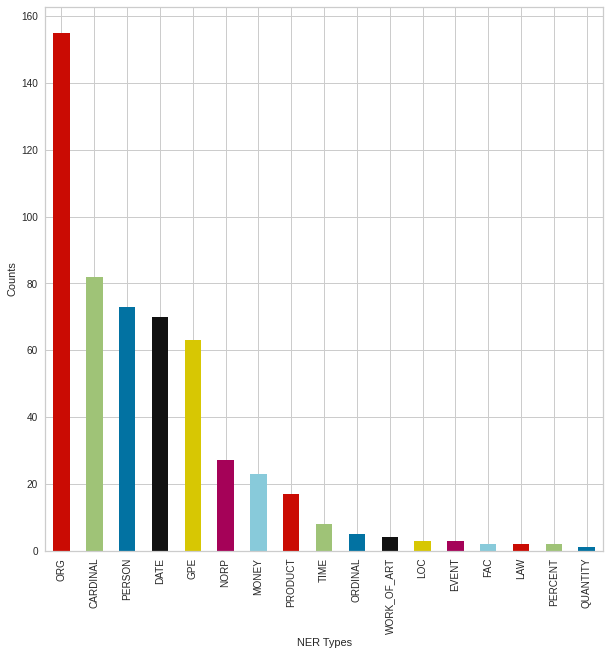

In [183]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner_positives.NER_Type.value_counts().plot(kind='bar', color = color_list)

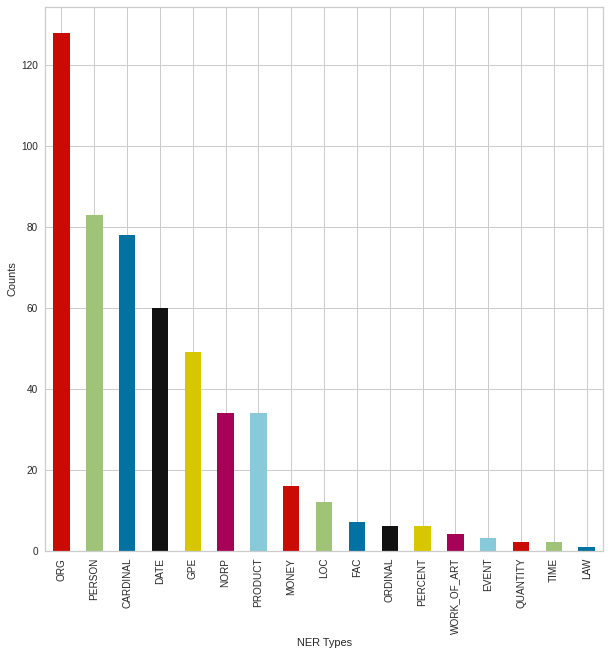

In [184]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner_negativies.NER_Type.value_counts().plot(kind='bar', color = color_list)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119838 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119834 missing from current font.
  fon

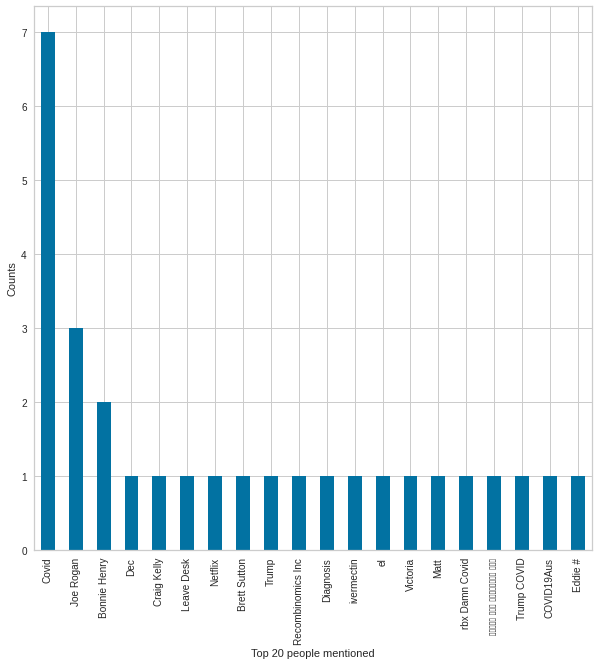

In [185]:
person_positives = ner_positives[ner_positives.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person_positives.Text.value_counts()[:20].plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


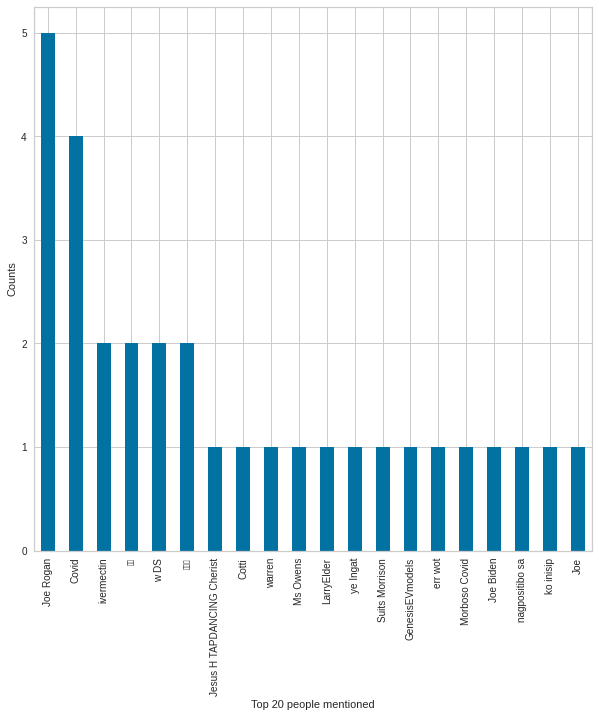

In [186]:
person_negativies = ner_negativies[ner_negativies.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person_negativies.Text.value_counts()[:20].plot(kind='bar')

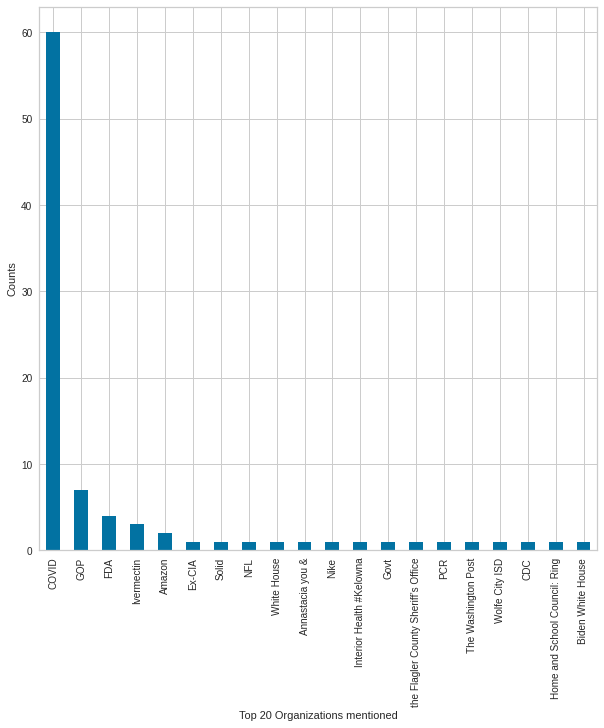

In [187]:
orgs_positives = ner_positives[ner_positives.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs_positives.Text.value_counts()[:20].plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9749 missing from current font.
  font.set_text(s, 0, flags=flags)


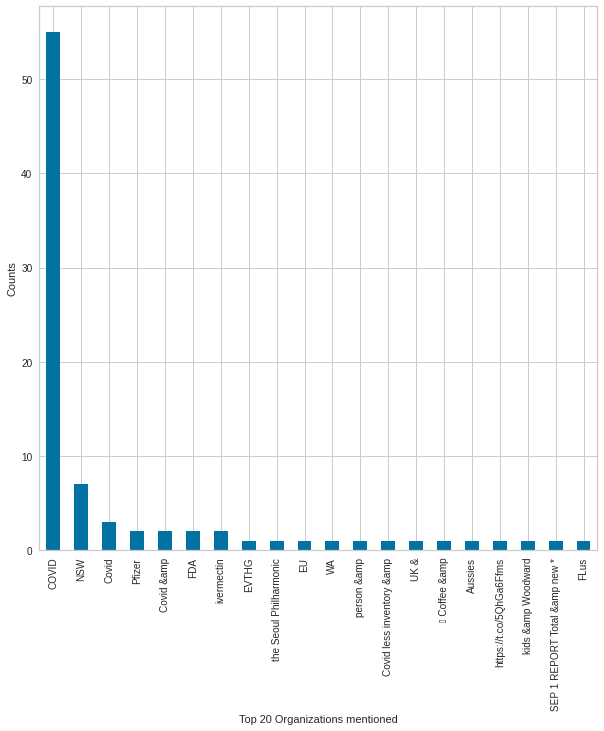

In [188]:
orgs_negativies = ner_negativies[ner_negativies.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs_negativies.Text.value_counts()[:20].plot(kind='bar')

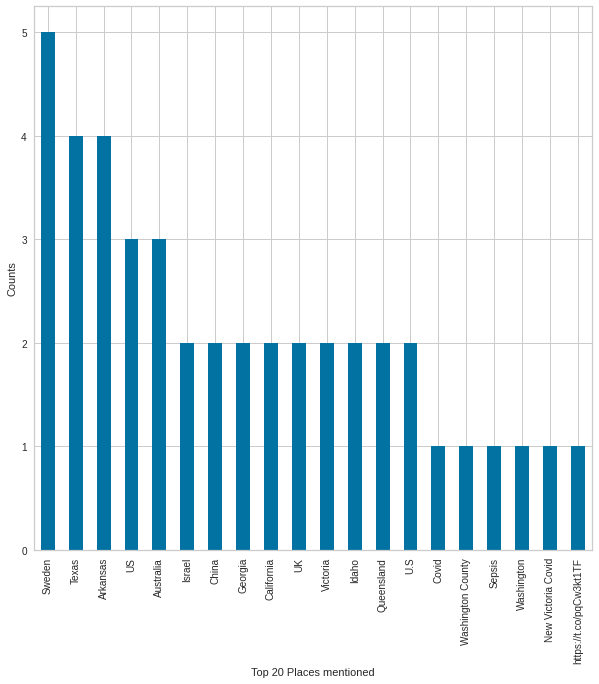

In [189]:
place_positives = ner_positives[ner_positives.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place_positives.Text.value_counts()[:20].plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9785 missing from current font.
  font.set_text(s, 0, flags=flags)


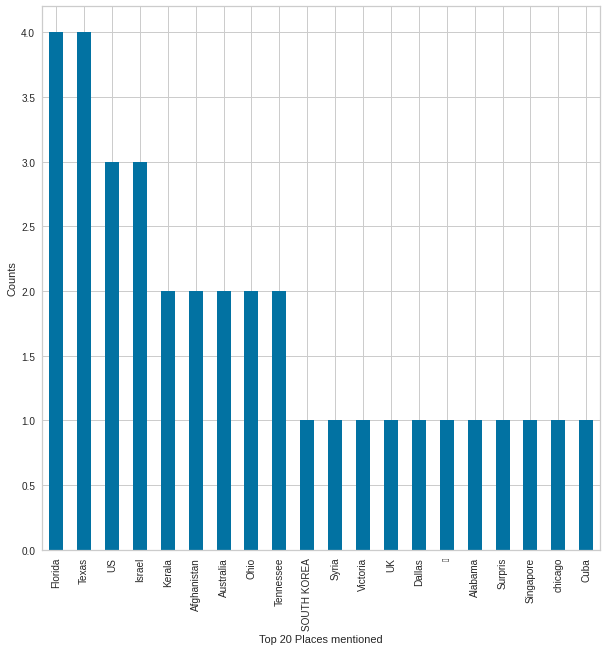

In [190]:
place_negativies = ner_negativies[ner_negativies.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place_negativies.Text.value_counts()[:20].plot(kind='bar')